In [15]:
%%capture
from scipy.io import loadmat
from scipy.signal import convolve2d
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import base64
import io
import numpy as np

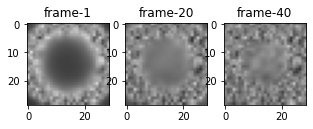

In [16]:
stack_str = b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFR1ZSBKdWwgMjEgMTQ6MDQ6MzEgMjAyMCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAAAAAAAAAAAAABSU0PAAAARM8AAHicrJhnk+Nokt97dSfFnV7cN9B3mPZd0767vGUVy9AXvffeexC0MAToQO9tsXxXd1fbajNud3Z2V6eLON2dvoheHFjdg9tQhN5ohAgEnqpk8pcA8p+ZD//hypUrv0h+d+W/kNe/I8//dOXL8Z+//v27vzonn5EaBRqJaWL/2yv/9ev///ffXLmitWi+mi4v33xz9cqvq2vU6jq1ukGtblKrW9TqNrW6Q62mfl1d/YZaUYyrFOMqxbhKMa5SjKsU4yrFuEoxrlKMaxTjGsW4RjGuUYxrFOMaxbhGMa5RjGsU4xrFuE4xrlOM6xTjOsW4TjGuU4zrFOM6xbhOMa5TjBsU4wbFuEExblCMGxTjBsW4QTFuUIwbFOMGxbhJMW5SjJsU4ybFuEkxblKMmxTjJsW4STFuUoxbFOMWxbhFMW5RjFsU4xbFuEUxblGMWxTjFsW4TTFuU4zbFOM2xbhNMW5TjNsU4zbFuE0xblOMOxTjDsW4QzHuUIw7FOMOxbhDMe5QjDsU4w7FmKIYUxRjimJMUYwpijFFMaYoxhTFmKIYU78yrn5DMkxX/vr4B/L85muN+Luv1/9bHblyWWd+d0X81c//N//h9/f/h99/+3r+h9+VKwvk5799TFOEAlEiOQQ+9eIe9MB09tmzhGMG9vSd609Wha76XrUFwP9r/HMz1s/koxJPZxD0ulgPbtN2gyH0ot0CioUo8fr9oIPFdAFv3VHq2Jbu8aP7+yVvDt87LJRKn9+1PnxslyFX9Odq1MpdcD1rAuWFzuHFfjICNxqF1sn46Fk5UXN0BwFu7p+aOV+4e/yyEnT7ATACIjhUxGGfzA8QegQvYd0fRi0CsOq0arVaa3b541C1m4xlYIYma7a3/kKATo2Yx2EymOxdmSmUPXrRKicdq9IMVjzqRqyK3Z2NtZXllTU6U2QI4P1y7lUW/DGaPz6ArAre1uri3MzM7PwSbUegA8ovT8OuVivUfdlKGPlbq/MzTx49evxkZmF1R+LEzj9FDvb0hYMP46iGRVuYefLwwf0HD59ML6xzNcFOsTCMSvpgA3NKt1fmnjx6cO/evfsPn8ytMqT2wvEAhcpYIx4xC7eWZ588vH/37t17Dx7NLG+LrXAzwBLXQ7Uc7hRtrfxqvH9pNMPNDlBt9dvnjaCCuTb/9PJrLz0ZMheC5iqiaOfj8zao26UvzZLW+5OI5tbYmjBxnJXmGIcfLrpJq4RJW5x9+vjRo0dPphfpfBPcPTgfGUOa0t4A82oEO7Sl+Znpp9OzCzSmzFMa1/su0JfIH35qJO1KPoO+urSwsLBEYwh1YaKASuhEE/Z3vrtoxp1aEWeHTltb32KJ9e4k4dSrD+ZDcDZ+/KeTOhowKoQcJpMtUFoCcKuBj/wptaLarJUK2f44F3YZlFKpwuiNJrC970MRdL8KHZePLnjS4n47i0aDPqczAFfrh43neLb9y8A4yOiVzv1m98eDzmDcIQBPuj/6p7qt9tpZDjCAYc30YxXr7B0S3//+OeEwIntjwJFUVbJW7rwYbXbLDGYqiZnf/I+XHrYDcsB5eD8bBTnz305vGhGv3q08GKKGbD4aacD46VG+UPVyZu9fn1qQgcLYyZnH8UZlOi71y5aTLOHA4uzZe3f+Sr//LzqcekxThn1APtYPfGxHXfBYd/rJOZ9OGzmXOhS568NSPZj8t8FP1XAXzQJCV6vj87hZD26t74aC0NtmI5DPhrMv33SaMKD2uipWomNfvsuPjvcIVwYdjHME8d3b+sVFoxC3Ab8vARbunPNZLVicaY3f7iciSKtdbJ+OD0+IaMXa7vo5mX+s4e5A8+i8GvaGovFYPJ2FiHTCLfEEC/oUSiCt7watUtRuMuh0OoPVG0xC5VYUxJJbSsxorv2ZiLoNMuEuh83hiZTWSOH4eY2IWZdFaSR/0AXtaiF7e4NGo9G3OVJzCO8R2Es89B2Q2d+H7WoBY+NLkq3SWWIjWHlx5LfX6v7WWQsyixjrywuz09Nkeq5ssGTuzPmH4LivzY4uDhJ6Ln1lYfbpk8dPns4srGzy9eFOPtMDBJ1QHXMrWLSluWlSwY8eP51dXGcrnIXjLpwg4Eo0YpUw1i4l8fAhqYmFNabUjtQ924Kqr5zNeqRf9UIaH0/PrzFlNrJqBSuNdv1VC1Bz6ctkYfiipgUaW+lFIKzEjzTen3XjJtHO2uLc9JeIFjd4OpA4TAuzW+N37/uQQ8HdJOvN7Mz09Mz8yrbImu7unfW1fkV+OMgEDRL25try4vzc3MIKnaP0Vcbltj3siuLjj03IpRVztsk6tkLWMbbEABSzkJBWqCU9jY8fWimPQcZn72zSNxk8mcmbJKwa+f60P4mDB7+ctvCwVSPhczm7Yo09jLSqaN8TU0hLtXI+gw8OiYjXrFHI1RZ/PJkefvaFoVEZOiwcvGMJC/vtPB4PB9zuEFqrjSvP0njj576hn1bLraNq84eDzvCgVwI8aK//jxVz5dxWDuxEhmXd9yWk0d/Pfv7pWcGmTQ0GQVtMVsrauPMSrNEitrbjUUR3/pczx7YlYU1mk0MsGufMTz0ldehSO6TjHqTBcCBUS6JH+5lczUfq8BqpwygfPDp1Ws/lhqN8mzAe43krFmf9f9Dhk3UVmfBZsOe5aEQcyaHq+IN9Bk2bLnVIE7vrvULFF/vXzvclfxPCgruORsvt9rIf3F7nA/7461rNm0n708/OG9V4UO52lEy5nmP5riC2N8g50qnOEM/nP7+tXryrZkBz8AciaOLOOp6VvYXH9cHrvTiAtLulztn44CgXLpqbbT8b/+/ltMNTO3hVB/xAIpVMZQpQHoraRS5fTpdI5VP1j71WJe6ymo0Go9nhD6egYg0A0DhdjuoM5T8TMa9JKRHyebsCicYRLZ48K+cipkUBDOHjTtSlk/CY22SqbLP4Clsk08nCz9P+j6H0aB92asXs7fXLZrmxw5WZo9WzfY+lVPHUTlqITcrZoq0sLszPL67QtrhKX+78vXfYVqd7F4eQib+zvkJm9uzs3MIybUdoAjoZpB3kNb1VzKsis35p/jLr5xZXN3kqd+GomYjlEsUIaJex6auL8xN5T8/OL9M5Cidas29wS+5CJu9TcC49J8aZ+eUNjsIO16veUq1RPu+CWv42bXlhbuarJ0/jRxNwgQdUXp/2UlYpm762NP8lopUtgTFW2od5mY3hqzd9xKMRTJra5F7ItsaU2LHe4Lij9Ejx7iAHWOS7DDptdXlpibzPXXWgNi40LEE7gA4+NBGvQbbL2qav09bJJyQ3gyU8sbtSqMQdlYsPHdhvUYl32YwdBpuvsPhSBaNCuvfYE0+HRz+fdnJRh14h5u8KZXonmG6WoJ4LlIkKlSKOov2TUixo06tVWnsomUz3P7gDiX4xNc6O32xzs/sdIpeMhLyeSLpeHRWPYbTyh76+Dysk5kGx9v1+Z3Q4KANupNP+S9FYem4idRgdEervCqlqe5T+9MNpzqyKd7teMyguZO2cBSneaOTodDCcVJ798di8YYwaY1i8j0aT3EsdwjalTTTqJBQwEvCXY9DBXjpTC3DnHlybWpTHecDBkdV0JtEe4PWs/gjLWbAEqcOp36rDpxtqwBPAga7zXTVkiw1khxfWJ0jazJ2ZuvF0Xeqtt3MlT+Rfmp/z7loc9XOttbrT5eM8vEMXgj7wvFJxpyF36visUgS8EqeV0ON918o9QWKvm7Ei8WYvncl+flN8/7aUDhn83+X9Jt6s44xw5R9WOuejaBjt9kvdZ+PxPh4oGOpNPwv7M4FYnaXx60YkGIUQCM4SqVwybOE73BltLJ5JVC66rWrSY7dZzGarKxSBUoVyMARH1yWwWlv4UyHht2jkEqFAIJbrXYnKySmRCRsWeKkEOmxHPUa5gMPc2d5hckVqB5hpY8lniPe9H+7tQS6DjMfcmjTLjS1SpdZ47XToMBWKzvJhE3V8Tc/llVUanUHmZ/7lW2e/roTb745Ri4i1ub66vLi4SCbvJktiiXTSyaafXXeWMb+GT07Cy0uXWb+yviPQeIiDWjSCR/Mh0KngTYwTScwvLtO2d9VutGxeYxfsGYwIqHYp48LSGikKJ1wruYqVauG8FzOQTNrKRE0LC8tr23xdAI0lspxQ8cVxH3GQ4zd9jbSSxwqNITInSnsJFk7rP3/VT/sNEg75xasry5PxnCN3Zrrdg5bUKUJbvXyUnBg4O5sbtLU18j6FulB9L1M1+S0hqPu+ifnNKhGPtbO1ubnN5Cut0VIa5CwWyqCt+PZDBw3ZtXJyEmGxeSK1LZDKa6Wi0QMXiAR6vz/tEgm3WSMTCyVKoyeWbhQSHUdYzM+V8mgK6j+rJgCnUacxOAEohXTf232xTgHaw4avN5jYfpsoQNGwzwdi9XI/d5iCi78ndZiUigzdfPHzuDM6HlbCLqjV+FNeRzzTVwI78WFO8TkXLzb68Ifvj7MGWaTVchkBfi5n5y7Kso1ahrYOBGLSk5/29as6QAeiYAeKw7vkXLplgi0yC3/YjEqTSa+nCCbHQxirBXfnH1z/dkmR4oTG+ybDiVA9RiqY9gjNGic6vP9bdfjtNF0bcfuwUNv2phSwRHrig/fmR3Daypv99uY0XeGrNzOEK/wvtQ8ZRwWEPSxzpWpzBnmPpzbFMW/4RbHkgOOO2P4JkQ+4RDZTQZMeeNbuCVN77bQJAmstGMM+vcq/e5WH/Frvp6zXuDvjOMs5svdKzecDIIj2BuXu2d5oL+3N6aoNPyv9pxxktuVHr+uRcBxJo0i+lMzE/EaezYFryfkzVnzbatVTPpfDZrXZPUAUTmQJnz8VoYlSSlXml3wiYNMrZRKxWKoyeVLVk6McFtTPcRIxqN+K+cxKMZkpTBaHL9W6Y3gLjp7ArrfeZHuYcpsUAg5ja9IsmVyhypaoHfdt+mzBVtgjt3lKAXuSnjTaOn2bLdCGCi9e27plRbL+9gSzSbgM0rZKHjQ62UptYBuK1r2MirVIsslJmNw0kbPcyur6Jkuk9xb2yxEABXB/xKUWsLYmxuVLTTCFWg9a1C8zspY0Ugxpv3iuXho3GEKtC67k7US5lHnZT5ilX5grl/2bITKEUCCKs4K5ZweDtGsyftPX19YuI2JJranSMLqDrXROX/bxoFnOJ5vaxvqk4mzzlO5st7nXENn5qVqXiLt00l3W5CnQ6eQ2zxBujtJlg9cUSDTfNvCQTSsV8NhMBoPBEaptsRIcZs0XioA59+qimwacBpVUuMvjCaRaRzCZU4j4w7sOAPK2fzzplVK+yXuRyjVmXwKrZ6Ita0jEyxCZVDzRe15PgR6LQW/ygHASar2xeMBWHhoi/fO1TWTcKpbgGBDwx/B6sYPtJ6DCT6QOY2KBrp3JfRy1RyejasiRbFb+mNXkTjSVICM1ykg/kpWu3Em8/3yIaUWhet2uC/HwvJO7pMg3ytjqWsgbER5+P1IvqkMaAAbayTgmWLg7s22GjRITr18HRLGY25UHYqN+Em2E+QuPrt9dVsGc4Ghk0B0JFKNkEVEfoRkDnmTNPbj7G3V4d2ZLB7o9aLBlfk14jeGOYPzO9ABK23fn7t6a2VIFGnU87wj8z/L7tKUIpFw7xlLZ4gzxn3y7LU14Amd5wp4CrcDoMIt77HyrIatGRr71ByJ41EQMiXC5nkKQj+eZNy/xhEft/oC7jIJZx/OMFf+2UD3thfxIf1TuPhsNhrA7q6nUSB3+kkkYTZn+q3okkkrjWLpQjmOAR88x2zEdCKBg/lWj2YD8HrfT7nD6IjE4juXc3gSwKkzKFegfc8mQw6ghX7hUrrX44PrxAY74tXPsGJjoNGIBq4bMFC6HsytSGLxxvJGIHCftr9zxRj/pMX8Zq8hmydklZ9pE7aBt1pKDR65PbvPU4stGQJ+olCfWAcTZualdlMUrb04ydnJfRKbuBnnQt5m7CjvYSgBV71bJWEBDRgnpuDlJ+/WNzR2u1OjL7xFAEAqinohbI+JOxuSJJtY3tthivQ8tqBe2MCMElcK6iefWV8FMjG6olLEWCAJ9PkhZJ0Vje3Njff3SU2IC0GA4zfBljvaGuPeLKxnR+sbGFkduh0q9yCa61Do86+GATSXisna2N8mb2WLw1d5spzao863ceKlDpHxGhZBU2s7O9jaDDDbSGkJFrcfgi9Ve17MRp0EhFvA4bDabJ9Y6YsVkkDFTJEJG/MX7Lg56zFqFRCQQiOQ6VyiRlfJ3B1P2cMJd/+64X0GCTrNWKVfqrP4UVksDTXNAwMFyWCIS7bxswHG/zWQ0+2JIMtV4ZXIBzRzchzsvlmmpUbNYQWJgwB/P1PNNeI9s+z+SOgQFPHUTxS4GpA73qkF7vE78AVdmjlTVEAMZYZKLdCRLNMA3H/dRJd9XqVo1fna64OYtq4uNIrq8GnAHeXuf+vJZhV8ZTIaa8UROtHh3dseC6MVGTrcS4oOg05ENgoNuHGlGhEuPb9xb0aAs/2Cg0+7zZP1oDlIdI7guk2IvPLr3G3V4b3bHEHO5kUDL+Crv1gdb/L13xntQ2ilYuH97dkcbbFSxnNX3z8V3iKkQSjq29MWSyRkRTd9jKCCX7zSbtybCxmBvP406LTyLDldAe0H6QwkybED6WLBYiaegixfo6zMUdCqd79MOo3DG8Rwzp+/kS0dtvxcejMqd02Gvl3TiqlI1wEL/iMX0BrT7qg6CMJ7N4EQ1Sr5CLctoxbSRMAxkX1TrDTjoI4XodPujCTiKYE53PLzCT0hlqZ8zyZDLrFMp5HKVzhZAGkdjFPap51ggEG3VokFydBILdsnNo1Rl9CWxGhg6ilvPHdFqN+6ZaJTHnjRLnlCmcyZr46ZRnc6Y8E4Nd5ONgEuKdGeHweTwJYZI8dlzQ7MgjRVfnWadStEkdbe3tiYaFqicYBMMlj10QptDQiYZn8si1U0Oc1s7rF25yZcb5UKBZAByAm6dlDJubjF5MqMfycnnNlF9IlkGDDISyfxqnCjYnSLS5lw+nzobQHayaHCYDMpoiaDeALLtxfaHw4zfIBd+jWhri8FTOOBiJ0SHFxr7p90M6NRK+ZOmRkpthyXU+nKdcq/KM7OjhVYRDljUkonSWEwme5fcArb78YLarfOA5Ze1HOg2qcnZkk/2PL5U74wXY77tpyUioE8/e9/JxHxWg1ouFYslSoM7HMcFPG7/ti0Yc1Y+HQ2qaNhjNWhUaoM9CGEVOFg3+vmsdCYdDYVb500kGXBYTNZAAk3Gqy8MjmA9A/eSzbPF5fiwXqyicTAYSGTr2VpyBMbwHwaGPsDnqOoQ/K7XHJI6DFjBSu6ntBw7kNfCTGwPFb2Hw1iuGnr1fgTLOO5i2azyMpGCZ3dFW2kQ8OKy3xFgDy46kqcynzwQD9TBBCFZvjfHsCJaoZ7ZLgd4AGC34f5wvxODmjHxytNb99d0OMvf62nUY46kC2aSyhMkrcvA7MXH93+jDu/PM01xpwsOtAznOZfO39zde2e4C6XdosUHd+aYhnCjks5avP9ceAsZ8oGEna4vFo2OqGT2PkuNOD3HmZw5FtR72yMYspo4Fi0mT+6Hth5J04NaUg8GCsVoIv7+eer8NAXYFY53iM0gmnW8QA3IrVxhv+lxw4O9Uud00O7E7WklUQmw0Z/RqFYHtc5rkSiSzeUyxWqEHGnUTIM5rSPbSAh/Vqo1kJDf53G5PIF4AgYg1O6KhZZ342JJ/A94Iuy26DUqpVJtdATTzaMhlPKoZpmRUKRejYYcepVUdLl51JgDSbQcDhzELef2SKkV9dh0k2JPNkueQKzQkzoc1vQqcvBIN6sZj04u5nM5LBaLzdkVyoxg8eRM1yiIwfz5ad6l+jV1yeQlN0cusB72Fd0bBRUOhy3keHZpJIc5UqQKsz87wMni7kvaQh69/FfjzuTnDbk5gOCS2Q1EG41VAONlOF+MEwWbPYk8YiSfSfx0AJNiEk4C+mpU2CKIywtvutFRb5gLmsmIdrlfoCy+yoUUm4F1eL4+OupkY+6vTW0SL0ek8+daRLvCNbOATKOIhL9WKvIxcAUKC9jugTmlW+uOEM+ruZjXqlPKxCIhny+UG9xxIuLZfFIu+HXI0dtOJh5wmMgKKJPKyB1BOJYmEb1blkDUQVwcDmpYxEeaNVqTIwRjpYS/bvDxmCiORPyB5qsWCoVcNost9O8AAAD//6TZZ5MbZ7Yf8LVddtlv/A38Hezrvd6VNogSxUyJHIbh5ICcG40GGuicG40GOiNnYDCYQHICySElrrjirb3adMt+f/1pfBoz2vLet3qqUKyZwwdsAOfX//OAhlPVBu+QkjCu2wfVvbe3bqtHo+7E0TWRrzXH3qDyXCl7fz5Gj6SttfioWv0wnx6/eTniMKXv/dWJuqfhibrWfGHtfjREp97n3n9/bIRWiHYvF2eemV12+2t0PG0bd+6xJW7l8Pu93WthJspVuLFSG0a/+u2d1ZKd2kVWZj1+QxJx3OOkw/2yMatGH3z5i98u5Zqr3MFBKvlyPThX6tX4W8dNN+2N+9c/+9nl+q/w4P/Dz372n+DP/wyP/3L1+/949fN/u3r8u6vf/3t43IG//9u763iVJExhP/u+SSH83tbLf8r9ynTZ0P1rn9zZwJRpz27kmX9tfzCQJq8XH2V7XYTQY7c/20A8gnxVb2JlLkNPj2o1LLeeT3tR/Ux99nm0cTysIirXaqua9v1F5dvXuohHSx8tPBu6QXxrZe1/bDRfTCjCOD7p778+2tvTim680xfW7f9jldPp6uT9SNWcdrvd7I3lKp1PrGQxB5EFQ3LfdIZTWxZ5jqFZsVozpaqJk5p0f6sSDJX/xa3KDJ5D0qlkBqNkb+8MroxJ3FpVRXnYL8tkLhULB4OhSALBRcPuCdypnv+uqHamKl1Ck5Hg7vb29m4wkkCp6uhwiCScetYe9etsNhEJ7mxtwtreDcVzWv/VRXrSDqnNb9926LS/b2tzA9bWTjhDq2OB7tJL7ahrKIVE+Kq4vr6xFUzifOPI5Tmd1TGRQf3ijl9dW1vbDCQKouUGbjyy0kp5qOSTkVDgx+LGTrzA6E0DbTYb6utjm0LiV8+7KCZKZbtEm09o63j/eVvCMzF/6+bGOhR3U7TTnXBL5u3x8emsWWXzKbjena0t/3JDWaG115wNNrFV2R13XZVEk9FQAC5qezuQKGr7c7kZp9OU3L4YtHW+hKbi0XAI3sF4jtE7EvX42qjDpc2z388aNYkqoJlkPB5P51mlbK+trx39vMCXi+3vT48nDU2k4IPJFijZdnsaO0LZrRXLsxSGGX+379oKTeAl2XR1tXuRLgojz9nXp29v3BAPBt29K4cju6ceyWX3z8e5Q2FjNTaslH83Gx+9eTlkULFr/8UKuyfBSXmt88LY+WjwttOl3n13oO8+xZvdbIx5Wu3yOw+x6bRZu32XxZnl+YfJ9m9DdIStcEOpNo1//dnddcJO7GSezbrcuigUCi4rHuyr1X0jvnTzl9ce5zsr3P6PDj09/s5zUi1n86sb136iw2v3NosGWTLFOTgkMxw4/EPuU9PlI19//undLVyddq1Lh9VMk6sUHyHdToaoJe5e20IbxdJ5vYmWmVRpfKDrKLqGpdyIdq6tXo83Dwc6orCNpqwqv3+jfHNW5vKR4kcTy0bAoYHYP6/Xj0ZFvHZ80pu9OhxP1IITa/XA4f82ysmkNvx2qFS8Tqfb7E1EjcjFn2VzNiJxNdE+b/antiKJPMNwUs0wBK1WIDXh3mYlGFD+aukyW8TQTDqdLTBKfXZ6oFeZxO1VRRD7XVWhsEwiGg5HYmm0KBlmm2VPK/nvcLk1lmliYTSwGwiG46kcOJz3Mwm3gVi9XoNF/druDqzdYDiBVfrnr1PgUKm/e9tlMrGI37p+7+4EogijDhnKdxiyq0oRNoYCgYU2QJrGee/A4bkKrWV5JpeEncHAQtvmdiiJi6a9c/2RlZTkkVpIL1o+sAueNrYCSZzVGtVso1mXz48cGr3c+mOR0KwCaT6hzMPp845Syiaj/kvxnW4F04zbGTIPrVujw5fTRo3HM3HY6l8RXFBObE3rU3C4IlqDrqfRWDoe8a94ZyeYLGnzmdAAh6TUeNVrV0USyyQTMXgHw4k8U2nzxKNr4w6bqr38sFc3ZLqEZdOpRDKT5xTFera2evTzPFfGGx9eHk+bFZktYSiK07LjdhRmmGU2n5meKZHk8MO+65ZZskgollOR2q+TuDD03Jk2ffvlF9y825mBQ/jsmwOjLR1KZfuPz3OH3NpqdFCWvp0OD8AhjXBt489myHm5M61s9F9Utz7WONNslS7e72tbj7B6B4kyT7WeuLuE70/qtVt3mQL9ePZ+tPHrABVmNK4v1OapB9fub5B2bOGQXeP5fMFhxIOZos+t5ONbn37+BO+tcDPf4Vpg4fBt3Um13a0Ht774iQ4//2qbNIli7cohv3D4ielIsYfXf3V/h9AmbbOep/+19Z2ebrAaDg7bqaKZuv/FTr5VwM/qjaxKJ4rD/XIZya6Cw7B6rq9/mWgfdCuIzNTroiR+dy68PZFZLFz8aGSRKDjUM9Y/uO58kM9Xj0+6e2fz4VjJ27FmR9iw/6VWTiaU/jcDRa93u91Wb8IpeDa6jGStrMTWROu03gWHsiSyLCcbpsEqlTxRFu5tVAIB8S+G/3Hn0WwmgxZZtT472a/oTPz2miII3bas0nkkGY9GookMBjffWpNiwOEHXGoMBIpYGA0FQ+FYIo1R1eFeNwN5iBidToNB04samAmGo0lM75+eJyetoOy+vegySCIGreur2A2EYllW6VNEh1pqBYyKWsz4Raj6UAPRTIlz9y0OHKppls6loakjfttDDu+G0yXJMLauL1lJQQSHkC1QDS9CcTuUKjKqpyPgUDw9chgAEf9bMZgiNAMlzMeUOR8ed1TCf+K/7cywbrtPPzBvDQ+Oxw1TLGUh1CILarsRcDh2Jv0N7JlQ63UbOltArp44EE4RlfmUBYcpUvTOOm0/8Xxo/juYLLCVFlNcujbuskn9+HeTuqGwZCGXzaRSSIFXJOPJ6urR/wSHee/986Npq6ryZAHDirTsOi2RHmSZjWVwKJaKvQ/7nqdxVIlQbUfjm68SOD9wvb3y9OL6Z/Ss3d63K5oIDvt6UzgQVfuH57kDBhz2Ff7dqD9//WJAppim/icj6LzYmlY3Ry+0zY811qg18q+/marrD1CvnYnSj9WeFHhcOhi7uu+QejT9drD2aYAMMRrbY42jzMPPv96irOh2ehkcrnJcPg8O5zOpMnfTT+/86vpyafiMmx6mElcOY28bTqrjbS/duf4THX7xYJeyiEIVHP6uAXk4BYcYOFTij278+qsgXRm3zDpG/19wmGowGr6U6TYTuIU8uB4odvKFM893GM/3Z4qaRlZyKTeknNc2b6S6804FkWjPFQTu/Slz8UKkciH8o5FJx8Ch5jt0Zl0UrRyfdqYn+/2hDA4bLWHD+mtVTcblzru+rDd63R44pEUMiSwjiJkV6ZpgvnTaE0sFiBzLg8MqLWkYOLy7Xgns8n+qaRJLFDAUQTCCUxuzF3tlcHh3TeH5dlMuM9BHyVgsnkLz4FD3CPoEHBYkr8dRxKXRcCQaT8FQqw8mnXTcrWeMZqvO5BZtD6AgTOO+w5dnCd+hc/G2x2ZTwGnhKRiMxFFW7pZKXXC4Uy0rJSSZiMdikCHQ2YC0xNkzk+UqlJxgaCyTSiTioA2ydjcQyRBSrbrxxZKZ4LiRikPLw964X9zZDadKjOxoSKPhcSeHDptfgFjs3NkJpchKDSkajylj1j/ulimoAuLI5U6E9VpdChwO5ofDhiX7obbYGQgEopjUGlljcLjMVzqdZo0voumkLy0UiqSJyv6YrsfAoeCetDqQeDBaZlKwO5bCOa1B4Q+vjXtssnL4fuwZKlDKA8RMFucVsba0unL4Dxg4dL85Ptxr1coiXSzk4VW4doOnBll6Y9nwDAHPt8FhXedogiw7Tpmtn8cLfM+pT9XpxRe/IfYarbmllUW21uhpdQ4cWj+8wObU6mqkJzMXg+7s1Yt+KUHWtT/Vgs7z9amxOX1e3vgeHFY99PxiLK/eR9x2Oko/krty8Al1NLIrN+/SeWpp+q638sku4Tvs0rWX6KMvHmzTVnjryiGLYQ4jgENtXkee3f31jRVq9IybHF06lH2HTTvZre88vvflT3T45cMgY5fyuvRvHJaTj2/+5uswWxk3TQ8cNr/Tkw2mUgCHjVjBQZduhMheDvMdKlQc6+3JSmrhMCidGzu30r1ZSwOHrs1xzLcn5JtjjkSD+MdaOh0Hh2ra+h+ONe1kMuWj0/bkxV6nL2FWrNnkN62/gMOY2HrXlfRmv9tv9yYkj6YjT5GMkRUocPjCao59hzIPDk1TJ/hyjijzd9e0wA73R70scSSO5bLZPCmUG7PnU1VnYvfWZI5reWKZxVFo/Xgik8MJxdScIrVwKLpdmiTBaALExOLJdDZPVQajtu8wXfMadRqOnJecotFYIpXXe89P4+BQsl5fgEO/c2H5wRdNopzUxovgsLldUWBETCf9lfDHyHACJThrz/AdSlGKwqCpYfnFoI+UlGuVdd8hy4wUHEVgvE6BceAUiKRLjGiXfYfsC3CIQ8P7TheEw2mqUk3htcdUba9z1NXoyyNyfGEtkuW8ZnvhcDbv122Vvgo1/7YRy0vNQe3SYbnVbkI++VvhtUYi0TRZ2R9Rlw6d542OobLFvH9VcAhMF7lynSg8/GzcZ5La/Juha5Z5hsABIgIOZV5/sHDIqnn77eHhXhsmFYYoFkhW9qw6Q4LD9aeGawgFtAkOm1UePgHNdRTKPbt0OFGmF5//qjhxm3OzXBaZWr2juAw4NP/wAtsnwGFfol732nuvnvfwWNFT/6gHnOerU3Nr/1hZB4e1ipM5fTMUl+9mnFYqQj8Su0rwKXM8tHyHGPlw8rb37Je7RJAGh2T1DHt8fWmHsUKbKXDIrLAMhtmMsD8T1Xkjt3r/NzfX6MkzbnTpcP/SoZPoNXaffHXzJzq88SjMOSXs7xzmP7FsLfX09mcPo4I+qhuXDivJ+sJhpx7Ju9iTmxG6j+ROvQYik7FcdyrJycwzcBgQzq3A7Ux/2gSHlGuxDPXuOf7qkCWy4LCaTCVuEN8oKXBojlvJpHp40hofT1s9KWfFGnV+0/yzriajfONtR9Rbg16/3Z0UGSQVfoqka1keHBrPjfrYVBXlymGlyCqo73AVHDI/aKrEUcU8ls0WaBEcHo3VCh27v6ZwbMPly2wRugxUIPkiqZiqWbhyaLdJggSjSYinRDKdAcVaf3DpsOp44BDmLSj66QVMMb13fOnQfH3RZ+E4eskJYiSWyvFSK4/7DjfLkkL4Z1VYKTjPAdIcwRrTGjgkxRBBYlkEQTIZaGw4RIbjWUrWy2vgME5TI6WYQ7NQXxSDwWiGYHhLzTSaHn08d7giBmVgnIj6IZyhK3q84DucNg97GrMYzdMLiMEIynuNJvm173DW9ezypeHL6TMODvv6yHfIKY1Wy5IIkOYbhltOBhwOiEuH1pHbNstcaTFrwH0nU+TLbtF3OGAS2uxd3zU1gaVKBfiXUVyQ2cpXVw4x6/X8YK9jVlWOLOG+Q9OlyX6WWntSA4f5jPdh5rZqAkORFdeWCecsVuC7dmMkTy+ufVoYWfUDQy3DPbjeFm3fofFPL7G94spKpCeVXnWak/PnXSxccOQffIfPptb24ZG0cKjZqZev+vyT2ym7lYzQS3xHDS3zLwbmpcMH44vu8i92SuCQ6ZSqrwtPbjwKsEbAd9hhVpgrh3uCMm9hG199dnuD21v+e4ctN9Fr7i4/uPUTHd58HBWcYq7ydw4/tSw98+zutUcJWR96PzpMXDn0wjkPX74d4wbp7MIhEUM7E1HyHSadAHduh+5kB+OG79AxWbr09hg7P6BL2QA4jCcSXxLvpIXDYSMWkw9PmqPDScN3GIWJa9P8k++Q8y5agt4a9gbtziRPpX2HqWqWJ2tC7bjqjkwVIPoOLUsr0DI45O6taIFt+gdVEblFM6AFRi43Z4cjVWOiX/sO6zancSXMP8CkswWCUkzZyJO+Q1ywm6USWVyESNJniObJcr/bSi0cWo5H5fzmvMSWgKlV7x2exBYOz32HYCl9ySkWT2O8WM8VwGFjQ+UVIgfUEADln9hiqTzJ1CaXDndxAkOBGorCc0OuRRIoLVfUFXAYo4iRXMQwLJdbFGFIBBQ0Yyrg0KWO5jZXwgsLiam4P0GCw0o0Dw6rk/phr8KSkEtwVUm/GEUFr97wHfZney3XgTfBD61LiPG83OhWFg4BSLMNeVTwdy5mT3A46xVd3yFvHdhtU+Mh8DDUvydlSoLiFPKXDst7bzu2qYm8n3gYmisKEq3d+5vDV/vzvY5VK/M0UaQ42TNsgvAdPgaHPJZyPsy8tiGwNFnxLKlonUULfMduDCVw+EluWPMOa7IikDWvyVsUOKx9fJmf5BcO8bNWfXR23MkFMVv8Z9/h04mzc3worMH5sFq24s/Puuyjmym76Tvk2uXQinjSq2ngMEc8GL3pPP1fVw5x/V3p6c0nIc7Y3Uj+G4fSfgffenDtzqYwe8qPjv+/ubTlJfvN4MrSnZ/o8PbTuOgWUU1afE+TXjgsfGqZVWTl/uePU2p14F451OI/OgyidWLlTkIcJhFwmJGJaLY9FsREGvLQCbBnTuRudjio+w5tgyHxN4fZs32yiPgOYeb7snQhpKz/7hj9eiQiHpw0hvNxvSui4NDltsw/VtRkhHXeNHm9PeqCw3GOSCZDC4cc5GH1qOKMDBWWsHCoYpSc/dEh9c+KLPK+wxyKs0q5uX8wUMDhQ3DIeCbrt2DWN4MWSXAo6rmFw4JgNQpFyv+2z1/AMJcn1F6nlVw4NCyPzEHnZvwFUtMIVu0dvASHIck4fwMO/VjLor41GHnzguBlFw7XFRYc+tLAE4iJxjMFktbHVd+hsFMogbNczueGpGIRCEtGrsiXDovgML9Yi2I4FEMoijIWDsmDmc0RRbwARYhwKEYRuqKF81XfoQsOeRreAvCy+LYmlhM8zyN8h3vThutWhMXg7l9sNBovyPVO+dKh6DQ6rkpfEgaIcd9hF/cWDs19s2XC1qJfhrkWKQmynbtyqE4uWpZZkfxALBZyvkNCvfujQ+Ns5juE3QxVWjg0SwuHj6quwWEJ88Oe2zFFcKh7plgwrxz2weFnv0QHFeewKil8qeo2WMN3WP39S2yE+Q7F/GnDHZwetbM7WUv4oRJwjh9P3N0Xc37hUDWjxydt5uGNpNUAhw+ZVjm0qpx2q+WFw69HrztPwGHAd5jX3pPLt5bDfG0bHO51mGc/Opzy4n63tPPw83vb4v5TcXz8tzyMv23XE/1WaO3x3Z/o8M5yUnLx7JXDzJVD2zCya1998TRT0XvO3zl8lOm4AaROrd9LyaN4ZuGwFEVaY16Mp5bRpBugT934vdyo62oZiQSHROH1QfpsRlw6jMTA4Rtu4bDnhYLC/MQbzEZuZ+HQYbeMhUPGflPn9M4YHLbHCB5PBsGhnmV9h4eaNayVVRVOI75DCEMJHLILh+QfJEmAJsThnl7kVcjD+UDW6OjSmsLSnsFUOKKA+pNgrkSBQ6GCEuDwu4Jg1jGcgmEOoCEZBNgUSkqv1Vw41GuGR2DQ1ZBqfq6l0khO7+2/jE7a4PDszYCB0AK6EE8w18LIK/A2kvcdrkm0Qi6sgSdfTALBKaoy0sEhwW9iOBCESgHiO5OIRlMYo2jiM98hWRhJxQLuLyj6/5PgOyRq4LDhEvM9cEiUilDEshCIYXColYMYOKxN7IM+NLzvBVvYj8RyYt11Lx2OPdutihSElj9owykwAQ7b6nDhULDrHa/MFAv5xdkzkciQ2qxTcGNUiuTMWa1l6YLvzHeaRghRstAfHY4vGnBEkEWOhtETw8BhSbnjO8yxas44ne7vdWxLl1iaoHjJqxm473BjSQeHaKz2Yep2LdhL6HVDyJmn4LBtNfsiOPwF0i/bRxVR5vGqW6cNci6o1Q8n+SEKDrsiduLZvZOj9v8DAAD//6TZ6XLbaHro8UlOJZV8yR3kHrLNpCqpyvR097S7p73Ikm3tlkRJ3AmAALHvALGDG7jvixbbkiXbrZ7uWdqZmZ4lORdwTpK7yfOCsme+N8q0y3xFkabww/95TewpXtX+4CUaFw9nrcT1qbL1q1AJrEry+VVHevBxttbOJaUVoeMcbzmve57zyWcSyd+f3PQefX+fS0iu3KOcb6T1TzeSmv90J/fkZCCvSzJF1WX9bKHqZ0MhsfrhvYPys8fm4kU+e7WVOCs3/fRXvXZu3D3eefz595bH38BN+z/f+95fwp9/Bbe/vr3/L27//re3tz+7vf/P4fYZfP3n63krYgnXPCd+0eEL6mL36rf0v9TCKrnz4OP1YuAP6pWIkv6n842backe/bDQbxxgLfnpXcyZJvOvmm28zCbx7lQzMvn1Yq6REK6bubvUtBu5mCnUQ5mj3pxlX51wDJ6gfx0cJ3MfszdKvvZ3jeqgcbCvnl81h4tJo28U66l2XXla+b1n547l2k1T8fvzwaTbnRXodPbwMZb3cEUMdf+5U5kEjm27mqSatZqJcybB2crnG25ij/+truuaxLEMWWR1x+mcno3KrpRa3bIUKQpFTxXoIkHgOMXLklVTnCJ/7ZW+ofVqRNACR5M4ThBEkSQpmjOH7XYuE7UKvh82OZIii2ihSGAFDCf94enL1Lx3aFZefTmRSXSU6BJFFHJ5gtbVGkYNxIftLUOwhBJFUSWGYSgin8kSnCg4U09RPF7fLtJUqUQzDMvCYjadLpQUy9HXP3xYTQulqckyLAcHLOLZVDKDiwIblLFWO+LPFjVVEASe45gSicFiGpdd+6AUrgrBvPps6OmqxLMMTRFYNp3KkEar0eDuV+6MTqaNWjMsyxyskXghn81kaSvqWpPRLvVE1qrNQdtV0CL6Z+ZzmOCedukoLeQFrbrwOjXfkHiOhccSGMEbRpUorfxwNpaz1vTLZlj1yqYmw6ssUaxhMNanmxvP/4FUbDK8np+e9OuNsKzJgqQarSCkuTEh7q4EUUUppvy3i8awbqgy77dDrVh5laS1brUzNOY//bcfYMNy9YWrmSodNJpCKDwz7OCX19SI2NhIDgzyCs6j6+edwk6+osYOH0w7idcLCTn0rcrR85dt4d5HsUNxhW+5x9v+645763B801t757Bo/0rZ+GwzpXu7O9nHJ315XUYOJeRQPR1JR2sf3z+0nz22TpYOT61mAA47+Un3+On6ve/o8N4m5kQM7iGHbeTw6ctvwWFQo3Yf/niDqniDWuyw+42bbklu7HA/39L27xH+9Cj3KmrFDjsTVU/n14l8I8FfNQv3SrN2wy0YYj2QWfL1aer6hGWwQ+bXwdFx7iPmtZyvgsN+Y29XObtqDOaTWt8gwGFNRg4tcFi9iWR/sBhMep1Zlkpllg5lMdCCZ1Yw8d85rNf0AmsQnCXfXY8danCgc5AkOcO126en4FBMrW6XVTEKhNhhESSWBFkqV2WL4K9dCjlsYCWBZ0hAWCySIIdmzUHr1qHnN1myBBDJEvyOYzhR9AcnL1OzwdKhRC4fwdAkli8UGV2uFKiB8LC9aXDIIVhj4ewlC9lckZd4e+Iqssdrm3iJLAFCjuc5msiDQ1q1bC12yJNTI16Bgy0ROXBIiALtl7GoFfEn86oqSpIIEkFwbunQ2qeCVT6ch89GnqHLIo+Q4vlMOkuZrXqdvx/eGS2m1WqzYikCskbghVwmy1hRpzwePQWHaiUadjwVCSaLOKyCw5NOqZkWwWFl7rZrgSGh5yxRRZzgTSPEqHcObxoBOCwbiiRyyKFeKt/Z3HiGHFLhy9nJot+IKpYOL1szWr5f4ka4uLfiI4fHzjfzxqhu3jrEwlfJktqpdgYmclgY6JUXjmIolF+PuJA/163gF9fUAI8dFl/Ww/7Vs3ZuOxsih/WL+5Pu4RczYevfQxkcHj67bPJ3P8zU2tmksMI23eRO+KZ56/DenzrEy7/RN36yndHdnZ3sk0VfWpck1EPtbKEoJ2Ml+ejHK8fO80fu6YtC7nrz4MRqBZmvet3CtJvc33zwHR3e3yLcpcPizzt8Xp3HDut+nd5bu7NF17xuNXbYgx42ZZdezYOebMs4fECG04PsNXLIHGPgUAOHeK6e4C6b+H162mw4uaXD4quTo+sFy+CHzG/8w8PcR/QrKV/5u0alV9/dlk6v6v3puLrsYVV+Gv4udhh+0ZC8wQn0sD1NF2OHBRcc+lrwvOyPPXDoaSJyqOWZ2OE91EPuW1VVUQ9ZqsiZntM+PRma4HBtq6xKkcd7qkgXUdhoUQGHYvmdw0ojT4FDiihSFAmVAjr6IGplM01w6HoRS0LtQE3cmNjh4jI1GybMMHaIusYiFHi+QLKGHOapAQ8OdQYcIoY8+uZYLk8KEmdNHHAoaBsYSdKQPF5AV4BCJoMxqm2pTz5cBYfFmc6ygggHmCnm08ghT/om1mhF3MmsqoiyIksiz9JoETks71HBQ3AYnI8801AlMUZagOSBw1qNvxeAw0ml0qzYaowUmpfP5mi70TaRw3VZCevDLlyqILMQRFhFDttLh2plZrfroQm941FMCUIwtaAQO5Sy1uSm5lU9y4KoSTxdYg2NNGOHFDgMLqfIYbNmG5okaXrTWzrcfwAOVeLI+mZeHzXAIed3fKUQXi8d9s0ZOMz31eCFJety0a/XmaXDn19RfXwdHOr4Zc3vXj1rZTczofIfPji8O+kd3Uz4rbeh4pmVxPmLiP/8R5kq9FBYYRpucrf6puE4P/40dvgFcsgegsNuwfituXl3N6s729vZx4v3PdROF4q8mGjpx588THovHvlnz2OHC6sVZr7u9fBpN3W4vfIdHa7skB449M2zW4d7l8ih12D2H322w0Zuu4Ic/nfsUEIOu42nmVb5eKVUm+69c1joTBUtdevwRbP4gJ426shhDRwSr+aJ6zlDYwlwmEhkPyxdi7HDbm1nUzi5qvUn40rssFWVnga/88rZIyn8og4OT/uTbmuaJJLZ2CEmS77mPzPdkQMOfU1ADpUsY+BceemQ/VZRFBXNTlSRtwLo4WLpcLusSA2X81URSkkWi4ykSuUab+L81dJhPUsKAjwKkgdwkB1t0GhmM612wXfciCZpGiWPY0vx7OoN5pep6ShhBq9upiLMpDTDCTDYEgWM4gzJz5OxQ422BBrVEERxJTyfp0SJKY+XDp/kiSIDCqFsAkdhWXCo2WUldsgR4JCDFVQ9lizAdElIHOGbeL0ZsfNpRRFVFSDGgmERHJq74JAL5/75yIUBUYmRklguk6PKrWqVv+ffGS7GMGPXHA1VDYZPSB44rLXM8XCPgv1QUBv1fE1ECYb3CC8ghy0qSosFXg2n5Va9Ysro9cA1qVjky6oPDj+YTqScNb6puhVwCM8rCwz0UCuan2xunP8jcuhfTsBh1K47ZR0cak3XpcChsH/fj0KFODTfzurjyFQVcOgpufA6BQ5ryOGX//b9XF/2X5RFTcb9Wo0OuHO9HPzsiupisUPssuK1X563MhvpUIEe1i7ujgdHXw45cCh7Znhw9qLB/eQDcJhN8it0zUk9rb+p2c4nn0oUcthdOnTkbl77vb11by+n21vbmSfz/nJ/WJO0k7kszSdG7smna2n/xaPK+Qss92pzf263wWG/X5x2Use7q9/R4epTym/EDsmfdbicOt+//A39Lw23wSae/GSXb9mt8E8cOvRqrtfYTTWd9EOmMdnNXEfNuIftqaKCQyxfS7DPInKFmVRvHUoMfj0/AIclcPitl9gHh1diPoS5tFvdesIvrmq90Sjs60TscC/4nYscBm+qojc86097rekRhhwWwKEkxg6dkR075BWjXpPTtI4c3l86lGUFeshxJMHbod0++xOHkcP4qgQOYcJkZA0ccgY4dEpvYS6tp4vgqFSkaBoM0nCog3ozm20jh3ZUIhnAyfACagxO4N5gdpGajg9ihwKJkicAJ6aI4SXOEN0cOFxtb2gUcggMJSADs2ehJEu0ObYVyRe0xzkMHAJDGRpSQg5ZzTaVx+Aww+EzjeEkJY4eIE2nsoTIYeCwGoHDSUWGrmgIIkthGUAqu8YOFayw4cwDhyhMioReLA4OS1arUuXvesihFzRrrh5XrQS7vHyOsWtNYzzcL8H136+O+gEghQsKBVcrDOPdRZNqxg6DidGMHcK3hfeIhOuc4ufB4QQ5HN2ENji0y7oqiyxyiBuxQ9jyUsHFZLHoRZ2GaxnwulVwSHIjQjhY9vBQfzutTZqwt2T9ritnw1dLhz1j+uUPf5DtCd6FwatSwatVS+8ddpYOC5eh03p53kw/SYbyH7yD2sXno+HxT/vc1jexw/2z53X2sw/iHvIrVNVJ7UWvK+DwTuzwdXcV5tLYYU75g7t1/yCnW5vgcNZb9nDpUJxNzMLGZ48ywcXj6vlzcLixP3PalfTX/QE17aZTe2vf0eGjPdj+MnhgnlJLhweXv6b/tWFH3OHG3T2xbTdjh//1R4fdxu5x5OXWuOZ4O3MVO0wW2hPkcAMcHjJnjdJDdhIih1LNlxjsarZ3PaeXDg/2Mh+SLwVwWK92qhuPuMXLancwCns66mFFfBr8funwi6rgDc970140SRSSGeTQue2hYY8sx7IDjUMOpRRyaIJDBzmUJEUTlw6ditU+nd86NMGhTfuKzMAQSZKsoktmjdFw/qVDvy3plVqSQA7Rho2BX3CmKYNaK5vtgEPbiigSRlIaAgXnPQEjmzeYXqSnk4Oyfw0OizTDcKKiiCyJ4TRvCE6W7HOrrQ2VLAtQSh6GSEVkigWMVqSScevwUaZAMDwwVBRwiGezOKs7prx0iM3Boayi6EFJgVqWkNgCctiI2NkolCTDQBBRZrOoh46xQwYPwKFzPoKrlIlAoK0ljJ7gMKwKd907g8XY8Zt1D6ZHVLU4iLRdjYzx4AA59CrjfqCjfScDG14Swzj3JHrncKxF9WpZluEp0Xhe5G3ZQw7H4LA8uoHNmAc/FgNCjBwqmPHjjY2zfyrJFuVfjBfzXrMbeZB7SVebjrN0eN9vhCqR0N5OqtMW9BAcOnL61mEbHN4gh5x7oXOKlPOqFSpgwaH/s2uqVQCHQyN/GdjNy7Mo9fh46fDFTwaj5FcdbuuXoeSZwf7Zee2PDsnATu03XwcWOBTfOTxY9jAj/oe//eAwr5vgcH2G9ofvHQrTqUVsfv4kF148rj97judeb+5PYVRMf9Uf0NNOOrP/+Ds6fLzPhrcOv+6wS4fMv0ZWkz+Ci4PcLUdB2KDk/+r/culwLd+Ndo4afmGNbw03Y4fW0qGWRD2sHtIndWaVnQR1O6eLdV9mClez3etZqYQdgMP93cyPipdiPvj7erVdXV9j5i9hIzAKYofNinDbQzF4UxHc0bPY4X7+eOmwgBwG50Z5VEYOVVbW6zUhWdLeO2R+I4oyOOSRQ69qtc5mA8MVk2s7cCFv2CVfUZBDimRV5JBWMXDI/DtyeIzDHg4cwujJcsihPKiCwy5yWI5IEuHkJXTew9ap4A4mF+nJ9MAEhzO+SLMsL6mwwSFxghEM3n7nkCgLaCqVFFWVWIglo8qkfutwLZ0jYAsoK2ANYpnL4pzhGNKjeC4tzFWGVzRNg67xNJ5JgkMm5xt4pdFgZqNAlAzTiK3RRBaQyra+DQ6ZcGojh0sQUK5iIZun0VQj3HWQQ8trNnxzGUsIInIYRvp4kIgdhuNBoKNtJ1OCdwkHh4vYIYYcqo3YIbwehoHH8o7oZcmVH42Qw+ENbMbAYeyfQw4LS4e0bJHgcA4Oe03fsVRJV1q2vXR4L3Z4oLwdI4eawvg9W0pVkMN2/b1Dxr7QGFnMgkMyYM806OE1GcUO9fxFUI4uzxrJtaNQAofVF5/1x6mvW+ytw72z8yrz6QeZCppLHxZ9O3XQfuW9d/jqnUOpkxb+M9x5eFzQjM3t9Pqs997hYibzk6lDbt1dz1cuHzeWDvembqea/ulgyEzbmWziyXd0uJ7gKvXYYenrLjicJZDDVjkSjrdXDpWe0Ygd/v/eO4e5TrRzWK8Qj8XOYP29w9YE7Q83sAI4XNS4NW7s1947fDndAYcUdsCCw530j4hLoRD8fa3Srjx5SM9eVjq9kd/TwGEUckuHx6L/JuTd0fPutNeYPF06xOyCJHrgUDeHJjgM4YcDDvnj2KH0YOlQEKSlQ1zwa+XW2XSIHD6KHcKEFDuEoYvVDMmolVRMuLx1eAgOBdgGwmM55JCSBhVw2AOHlhkRJAN38rIq8+iDj7zbn1ykJrP92CEH4yUnyLqu8BBLVjR5CzlcA4d4WUT/SSOrugZIMZzVpKI+dmTkcBUyxkIOVbAmMsghb7iG+CjuYexQRZ/CABmGiB3SGXAY1hvsdAgOy1bZWC7GDh1ti/Qf0EuHjmuXUfTQ7jEHDtsBOLTvDE4mptuMgrIGa+jzhyKWo52goY/7yKHkBZNhqKPRk0WbZKLAuovGrcNwJNfBIZqUlw45V3CRwyGaS4c3rl5xLRcNpvAuMKac1z9e3zj9Pi2XoYej+bzb6rcC19YkTWradvG2h1GoEQfy21Fl1gaHtN+3pOStQzSXfgEOu7R1oZQkMe1VwmLInkEPv74mG+AwBQ4vfbNxeVZPrh2iHibAYW+a+jpit35RkXwzePreIfTwIeFaqUT3lVu2P/lUpATk8OFtDzsp7v9Wt1dTmKZvgMPprcMqcihx44lb2r63gVUvn0TPXxC5N5v7E69bSX/ZH7HTViZ/tPEdHW4e8pU6SwTmCf1Vl82qs8OLXyGHTTG5u3qkD/Slw//X+wVyaEMPO9H2QbVKPpG7vSeZl80/dbheQA7nVX6NG7mxwxpyeDnZvp6Dw33kcCv1AXLog8NW9dGD0vRlpd0Z+f2lQxYcOqiH/puAc2KH9clObtnD9w6NoeFYVkWlJa1e446o2OHKhnO4x3wrQJfAIU9iQlD/o8Pd2CEZKCoDW0A4iXRTMuqUAg5t9lfIYQLjRREcQhU5dKKR4hAc5vrgsGxEOAmdZARVU+IPIHNufwwO5/umd30zZ2OHimGofIkocpLJlTMUOGxuqJglorFU0QxdQbHkdBnXxrYsIofJFM5BDtFGD2KZzxK86erio4/WKhkuvwCHmmGg5r13mAaHAXI4CHjJsi1TB4dsMRf3UN2iYocWOHShPMvP8igsV2Cctl8R7ll3+oux4YDDOJY8iz7XyJWcoA4OD2OHHjg0FBg9Wdgl07HDOhmlBYxXwpFUq9fKqN485J8uci4fO+wjh4MbW0MOocOqihxKWf2j9Y2TH9BKmfRfgMNOa9AOPUcXdallWQQ3RA495DAhvh1WZh3k0BuUxaOlwwb0cPLFD/8506PKFzIlCkkvDIiQix2+IuuF9c3UADk06uDweDUBPXQT1eefdWfpr+vs5s//2MM7P0wvHeJ2OXXYu3ZNcCjEPfxfAAAA//+k2WlzG/d9wPG0nXbaJ30HfRNNYqdNJtYkTiy3sU6KB0gRPADixmLv+74v3CAA4uAlyiIpUZZkO0nbSImdpM2zHun76e+/AEnFfSjM7HCIJUAsuJ/9/v5g/+57m+y25Eq9HPOH5tr9QlXTllO5pf2BtCTJBFmXtKMDiRtNA2bt1grWOF9sn53WSi9W0hO/X8+9Go65/W6xmk19a3b7W9i0v/jWt/4Kvv41bH8zv/8v59//3Xz7s/n9fw7bx/Dzqxmh3uBroXlMf9lni+pB5uwN8/2e2ZFy6YUdY6Q2w7BFyv87+Be30JYc+n55t726ETfpJXW4u1B42mlXbWan2p0qWq68XKnUt6mDSFjgRm7dKeliw5fp8vk0dXFAkdUN9jfeRmrnBnYmVoK/b0S9+P4n5PQ86vbGwVDDG7l2yKbDr12rmBGDFwHnjk/7+4PGZLWYLWw/qFTsqiT5avBYN0a6Z9t1lZK0Zp3dJlSMM6W7y872OvMVz4mayPE8URHiltk9mY4MV8wtPDRlqWXjoawyOMVQBGeYktEklKpw5nBvaD1qbFZ4UaQJRhAFXmAZhhBGcbdYGvYqgaW3qzjLs6yoGarIEFit4O5NznLTw7TpX7w6ZGssx4uqaWkCheO8bHJmgRxy9zvLatkWGU4QFd3QFZ7EarwhVbSJK4uBoN3N7lQ5SVF1XVMkFi8Xa4Lp6cLCj+7XC1z5SGEE3TRMXZVFFi/sFGsitRPoWNBosvvDgJMd17YM2MkRpVwRkxw1Rfi3qGjfejx2/MBzLF2RRI6sliuM1/Uj4RPro8HRVHPancgxdFUSOJYmsTLl+U1tMsxQy5Lk+fvjyFBkeFKaZhi8zHhHTaKdFzFeicZivdmwZEVTeZrlGIKDv1CBuPOjwVQq2cNXthJ7tuc5hqYJJGNKBf3D5eXj9xjFIoLT8eFhrzfqxYFniJrQte0aN6oJm5/47UirbQq/GsUHu3AslL9nipn68xyl9lrdgT598cH7hT5unom4wGf8KMQi7kSzgp8/xxvlpZXcnl4+9/XG+Ukje3czlH7vbdWf3Owd5H9eZ1K/jCTfDNdPTmLmow8Kca+0w9/FLCOf2XvmWs5Pbwok/8nkef/ud+cOd6g/tNcWSlVVXUrllsHhsigTBDg83Je4vUnIPbydqjXOFjvnZzhyOA4G9fzLwYjb7xTx3Oo7OnyYlRoNAQ/NI+bKIfuDXaMt5TcW89ZYbiCHyh/nDqmFcq+1mg5b7LK217uPHGKJwwk4LC0lDvdDcYHbSxwKDV9hyufj5YsDkqwkDleyN6pnAjisR936/Z8R4LDTHfvgsJlvB+DwK3CYFfwXPudOznYPBvXpSgE5rCKHInKoaSM1cUiK4JCeORTvzR0CFmHmsN5GDvcMV5o5bFrgUKPnDi1Jb+JyBRzybyg9qm+UOVECh6IkCOCQxvlR1CuW9nbBodau4Cyct5Ju6onDvDucnuUnx2nTu3h5xNRYnpd0yzZEGscF1WT1AjHkFtrLagkc8oKkGqap8mQNF0yppCKHoaDeyWSqHJzXhgEOOQI5tHxNWPgxclg6BofwqBk1vJBFDjPg0EcOBz4ru55jw06Jv3S4Qni3SORw4vihDyIUSeIprFxh/R5yaH40PJqodrsTO5ahSQLP0lStTHoeOBxk6GVJ9Lz9CThU4OXQNMsSZdo7bBCtAnIYj4W42TBlRdfAIc8SbMgihz/uTxKHllz3LN9zTU0XCcYS8uBw5ej9xOGT0QE4nOzWQ98UNb5rWeAQ5zdveYlD/ld70WHfUBXSGxniVjxz2Lt0WDPOhBrPb/thUAWHuhV8+RyPZw5L576WOLy9EUq/Sxx2jgpfxuAwBofBlcMuOLyHGXo+O3rmmM5HyOGtK4ee3MsSf+iuLVYwRV4Eh9OBuJQ4FLUjcDgcR0L6zirRBIdPkcPl9CgcNHIv+mNu0i6RhYfv6DC9IzXqYuLwiwFTUA+yp6/ZH/S1tlzYWinaEwk5pJQ/Dn+JHNp04nA96PAr+qh7L39+2cO5w2qcIfd96QE/sOv23GHpfLz0bJ9EPfy1l17avlEBh/63kcO7/4xPzsNO55sOM+DQY93J+e7BMJ4szx1aWOLwBBwqvmU1FEJUGw1qi0wc3l8Bh/RXPDN3WBYaHbOT9DBxKIlNsxZJOl0DhzhnIoeYNHeoRfV1cCjTBCvJkihCD3EucTiCHppau4xzIsfKwEJiIWs5Zzi5dkgnDg3HNSGohKhdO1SKtoQcaqZlQixruGhJRXXioR6qd7a3Khzk0LxyKIJD8S2HpmUhh7ATHOIiuQ0OvXqTnfZ9RvZ81zFVWRbImUNlmbx0aAdR4LvJThorV9mg50XCLRN6OFEscOjapiaLAgdvBDh0G+p4kKVWwKF7MHMo8ww0j4RYJg6BgRyP+LjZtGTV0IXEIRMxbh4c9pDDwStTBIeB7yUO6cTh0srR9xgZHH4KDru7k34jCi1R48Ahxu3hQuJQrW1yr/fCwwFy6I4NcXPmsI0cfoYcVvUzvsrxm8GlQ/+Lz/AIORzq5TNfq5+f1DPgUPytt13/9GYbHIZM6hczh48excxPP8iDwxx/D4bOfHb8FDn8GDkcXyQOM5Ird7PYf/TWljBMlh6kcivTvpj0MJb0w32RG4zq0sa9NbKFHJ4TqIeJw+e7Y27cLNGl9Xd0uJlTmnWRiMzDa4cccqgUt1fL7lSoB8jh/4DD4txhM7XudcWUOW7fLYBDzGJ2Kt2JDA6XZw5d+QHXt2K7DA495HCy+GyfICqJw8WtG+Uz/tLhP9XG4LA9DvZgLs23AiYd/eYth0/BYTRZmjmsgkOYS/0TTR3J4LCp4OCwTm6iHhrCzOHXHCOAQwEiITQ7Rudksnft0MIiyaBrNAuxs2xRb1YTh8IbGhw+LHGiQuOsDNOcyDHQOOSwnDhUOyWCE3lWthxLBodY1oEe5iaP1mEufXlM1QC+bLqeJdEkAdFktDwxSBwWEocytNLSYWglRFvKI4cCOLy9vVnmIYdAFE58Ejm0A3XmkC09UmjRsm3bTJKXOCS2Ag1z6w12uutRsg/xseCRyGEJE21lGXpIRPsm9DCMw8CzwKHI1CoYBw5D4ZaBHEpmq1tHQ6sswgHRRJn0nYY27u/QK5Lg2QdT5FAFhwwHL4n0Duv4zGE04sJm05w7FHiciWkHOeyCQ2vwyhDqrhUEvqkZEjjkd1APD7+HeuiDw4PO7rTfiCNb0NiumTjkt+YO2ddDcAgDOOFOdHEzmUu77W4fHN74XqFf0c64MsdtwJNXIu4RcviiFpaWU/mhUTrzlBg5vJW+dNg6Ln4RIIciOHz46FEEDgtzh4pS2Bmf24lDikscfmeTycjgMFP99/7aSg2ThbnDWQ8Th+xg2FA3769T7dPFzjNw+HI5vRcOG7mL3TE7bpTZ8sY7OtzOg0OZiIxD9osBCw53Tn/F/mCgtpRS9mHFm3KJQ/W/kcNW4rDbTK05PWXVnrTuoh7O51J51sMoQ05tZZHvm7FT1vmGp6IeLj6bJg7fgMPND8Bh1f92DA7v3MRG52G7NQn21JnD9UuHLz3GmTzrIYeLyOEicignDlV1JCUOMUH5psPfcrSg8chhUWh3jc7jK4cyOKzGkkElDjnbFrVWRarwpzOHjbUSO3MI570EDrGZw/Fu4rBIcBLPKrZnK8hhxk7mUnAIPTwma/ALZdPzbXBIyqbJqHno4QNwmJ85NC4dSo6YUye+JMBcensrXeZVzbCvHTqhOptL2eIjhRGBIUqeJJCFDHK4GWqYAw4nPY+Q4bT0wKEiUqUd5FCeOzSgh2E9Cn1LhQGTrZUxLkwc6h/15w5919Yh+wJySPg29HDm0LUOpzFyqCQOqdKlQxw5ZIPEoWkIFAMO6Trl5PE7H7YTh5/rXAM5hDfLlHHG5naMD5dTh//AXjmEtX6zETuCxiQOhzi/PXO4wSCHQ3CIO1MNHF6Aw04brQ+f33g/3y+rp0yJ5dYD36/E4ND0v3hVCxKH+txhnDj82t2uP77ZelR85TOpn8eil/Qwon8yd3i/IsuF3OTMMsAh/02Hld8P11JE4nBnZTJ3OOsh2x809a2Fdbp9utS9eAoOV9b3InD4rDdhJ/UyV9l8R4fZgtqKZBI5/Bx6qO3vPEEOtZZa3kljwZSJ/ZnDX8wcPkAOU/autuZMGncKZ6iHNOqhkvQQi7LE1AKHuwY4NISZw8mDZxPkkEMONz4oIYffAYeN2zero7Ow1RzPHfrsevzruUOXcaYXvYO9cPKgkMmDQ+zKoTISfctsKVXkkNgk1So4XEg5GeSQ4mcOC3ynp7fnPbw/c1iJRZPCkh5eO7TFxOFqkRVVAAonIXLIYswoTBxWA1PpFHBOBoeO7ygsVcW2bTSXjk/A4fOXxwQ4FBTLDxyZpkjZMhkFesg+aC2rOUdiBFExQZQuUgQpu2JWHXtzhw9LvKabjnXpUHJC5W2HDtxMeDngcLuAi/gG9NCOE4e4FIJDW1NUCTmsCba8RLqf4DOHEZQntFUIGws95MOeGwq3NeRQNFrdBiwewaEEgykJDi3kMEenkMOj/ZlDWCFzIl0i3nbIBC3k0DIFihVFnGqSTg4ctiZSGTlkG64ZhKEFDmu0zWYNmEsPrh22BweDVqPuCiqNHLJDXMjectH6ME2/HgSHQw0c2vuquNm4yCcO+8bk+Qfv53dLyildZLg1ON5yzB2Dw89f1XzkcKAXz/2Zw0/SkQQOY3B4UnzlzR2G64+OQ+pD5LCc4+5XRAkcnl47fPaWw/Lv9tZWKUy6dLj8tsN+09x+sMF0Tpc6F0/J8suVNDhs5s57U24alQVs+x0d7hS1VqRQsXHAgcO8tp978m+oh02tnN/Cw30q8gNw+F8zh9bcodk3HrqTeO7wan04d2ioi1zPgLkURhVPZZHDi/FVD9MfFE/5qvedCHp4+6Pq3lnQbFw55NbjN96lQ3v6vHe4F0wW8tm5Q0WeOxQC5LCCHOIbiUP+LYcczJBEnu/uIocj3ZWRQzSXVuqiRWI0R9c4xwGHZXD4xBZfzx0KGjhUAcXM4RgcVsa9qm/InTzBwbmpugEcEFWtbl05dJ+/fERgvMArdhC64JBSHJOWC3OHOzOHluOgD3EIUnGFjDJ3eGtztQgOLRfCJQtUuVCT3UjhFz5cAIeFE3DoOrDmVCRZRA4JsZaGHoIxdtJ1MSkMfT9xSCOHvC0tEeAw3jc+ndpxsw4jYOIQr9SEaObwZv9wwhtN5NDVZQgix1JlPDAb2mg3ceiZVw4ZlgeHuHdQJxKHEjj0Wy1waFsCmThs4YnD5syhRiOHUWQpllKjHSaDenjwj5xizhy2BoeDdrPh8yrVmznkd24jh1iaet0PDvc0VarZB4q4UX+Wp7ROpwNz6cWN93O9onJK5Wl2NfRmDq3g1eeYV1xOFQYa9FAGh9HMoQcOP249LsEwtfrlZQ8Th1GnnOMXKoJQzE2fmIZzM3E4erZ76bCzXfrtaO0hUxV5cJhKHCrXDndbdubBJgcOu589JVEPh6iHZ70pexBUpFrmHR3mS3orlOm6fsC9GqIeJg77CjgsZmHRT4Z+0KS0K4eL5U4ztaIPzHV/GoLDbmvmcAxzaXHuUFOXuI4eXTscL8wccq+99QfrPwSHmPdd5PDWTytDcFi/nEs9dr3+xrVKGcF76YDDz8ChP750aNYU2UMO5REPDtvIYT2uXTm0E4ckN3OY43uwzH08c3gPHAotq3zlkHcdQW2VxIpw6TBVYAUdgKpwXZY5mq3S42DmMACHOYJTwaEf+onDDWs4OZ07fHGCJw5hUeYrNE2rLjgsgsPF1go4lJFDG8IGDklK9YQt1EM+FMFhqsjruuVdO/TA4YMrh5LruF7ikMpvIYfroVazUA87XkWKwiAAh5pMl7LfcGjVoTyxoyqawoFDMUYO76g3dw/HvN7oNmHCQ/+dgEmbLNcCo6EmDkXBM44PEoeqyLK8xJRq/kF85ZD2oIeSYtvgUJJwsl1DDn/SQA6Hn2tUExzGsaXYKkY7NDhcSu0nDr3H4LA5PBp0Wk1wSPaMtx3W0uTrvn80UlUJsw4VMX3l0Jhc3Hgv1y3Kp2SOZlPIYcSiHr78ouqVEodFcBghhz8Dh19dO6SRQ3g968fHwdxhnluo8HwxP/3UeNvhdy8dFr8er61zVeH/OZzC+rDbcrOLW3z3yTJyWH6xsj6IoYdn3QP20KsqRPYdHRbLejtQ6IZ+wIND1MNP/xUcyg29UspR8T4ReNBD7T/fcthIpdSBnQ4mwe3CKTi0v+lQBYctbe5Qu3a4mTh8+MPiEw5zwWHn2qGPHBaaHptuvE566L1waHDYRQ7v/6nDR+CQCy2jo5R5uR5jG6SCXfXwa47g9MThDr+bONzTXDl/b33uULAJ5BDjLh1CD6VkLl0pMLwBDjUdgsjRXJUa+91iZZL0sLtDcJrIakEcaCxdqaStwfhJfvz4oelcvDypYYLAq05UB4cMrflvOcwih4LquK5jSsihz2/OHSq3NpcLvKHbPvpARaAqyGEsJz0ssoXHKiN5LnIoylLiUKg9hLPWRD1suyUpjoLA0YEacohxM4e1WQ/BYaPuaHBN4YhqTaz3nMRh/3DM6Y1eMwjh2gI3nqXLWKAjh3nUQ18/Poz1mUOOl9kihhw2CzwBc+ke7UIPJcVxBPSpMo53MWenducn9ZlDlWg6ZhjX5w6pbdTD/e8nDk/AYWN4POi2WyGvEInDAc7nZj1cJ17vgkMoe9U6ksV0jBy2E4fPbryX7xTkU2KHYldC1y9F7BE4fPFl2UUO+3rx1JPC80dh5mfrceLw5OPm49KrxKGUOHw0c9iu5MAhx5UK+4/1xCHN3dqb9TCbOCx8NVlN81U+cTj+E4cMXEH8naVtATl88ZQqvfg/AAAA//+k2GeT23Z+wPFLMskkT/IO8jLOSWbufDm3O8tnNUvaXrSNJAB2ovdCohOFZbmsu9J2FZ8k+4qL7EseXtpLyu8PkNyVfQ8yI8xgOMTgAUHgM9/fH0vrPe8gzFy0D+lHZkGuZn6Sbv8Iu/I3P/nJ38Hn38P+D9Pjfzv9/k/T/a+mx/8a9o/hfCKvxbZEBeqEfXVAZZVJ9uxr+mf7oq/mCYxqTkqO5YQ15X/7vzfxSDTIB0QrWF6SDsxNd2Tdyl20o6JB7RVaQ1HOYEtE0durjER5gQllr05oXNOUafxy+NnzYaWSf8h8a63fX30XO2eL5juu2wpufkj0Lp3QH9l9qRzkQoveCF5bOr7DWy8apDF+0T4aWMO72d3M9oNCSStJoiXbx4o4oF1Da4k4Kzb94mZFKjIae2+lvrNO/gdToVWa5bnKHtvrKdHpsK+YYvbOmi5woYEHXKNSINlakbFMTo4wPs+e14XXpOIFS1mK1ckio6iqLLIkU6iN7DZWGHUKtia09yqMytOK23RViswTa0ZveJ4dnq7pjc9fnhSLHMfKph84MkmRiqPVRLzSox9ES/JuQ6Q4TjZNs6ELZI1UbHZDHloC6/LSzc2FLKtpDceQRJEn89mSZDdF9t4H95oYnTuVacE2TVuXeFEksw9zFa646skl3QvoUWxifNNznIYqKTKF7eIlps4vVMxPS/5YPRvXgzgMA1OWVZmtFEpCs9NwuDvSr7tHQ1pptkPXczVRkkSOIYmiqwTyoJslVwTOUo6PfFWSZIWnGVaksYJz6FdCjK2wgtuvNaJQFyTT5Mq0IJXKnUJjr3TnQ38oEPrBF3I5auhOs2mIDaVAmdVt7YPFlfHPGEmvWCf9w8Ogf9xrt2KPlcodrV6kexU2c9uMPaW4XnndtY6GosQXtMcCv+4/y9WUuNXqaqNnv3wn28oKF+XdGr3oNmzCpx+puv3iD0QDX1rO7SvYhSW4lyfuzm/WPeFP1o5/8nF4hr+yyNUvfcHUnbXHj+3aB7/IeXE+y9zLMxSeG58oWv3XN+AW3+w/69756UNqVzTF1nb2+/HKQz7PMPeX91YG+/wSL1UqvqAejjmq14rdzOI21z5fbL94WsNfLK3v++DwvHXInDSKKpl9S4eFvB5bMnLIvTogs8o4e/YVOBQ8rZAnmGBcTB3+T+JQQA7jcHlJPLAeeqNG4rBUp3aRQyWDLSKH5ZEgL15zSOFPrjncuL/ybu6cLTVShx8Q+5dO4I+s1KFJb4TfIodc6vBl+9HAHN5BDhfAYVmWEofCgHINtS1irOj7xY2pw9X6LnJYThyylV324AAcDg6Qw9tXDssFiiULjD11yJ0ZYuJwMUMxBjhUNVWRWJLNzxwWkcPdCqPxlOoFnoYcruq94Vl2cLpmNJ6/PC0UeZaVrWboyjUaTtJIARxSD8IleachUXzi0Ewcqg6zrgxNgXV46dbm/Syra6ZrSMIPHVJZ5NABh4bIIYeb2SpXWPXlkuY2kcMsH3iOa6qyqlDYDl6i68JCpTFzGLaiKEIOFXBYFgNwyCKHh6PUoe+BQ1lCDguuHCiDTo5c4TlbOTlqKsihwDCsxGB5+7rDehTpgmjZXIkW5VJpPw8Ob38EDvN6/wupFDU0JwgMwVTylFVJHf586vBo0hwc9zrtls+KxY5mFOn91KGvFNfKrzvWI+Qwrx2nDkmlhRwOn/7yp5k4Aw53qvSC17Dx1OFv/0g0sKVlbF/JIYcX4PCTNX/qMDgjXlm11KENDh0SHLrI4X0Crjc3fqyo9Y9vMMjh87nDeDv73WRlS/hLDnlqP4697NIO375YbIFDInUYZM5ah/RpHVKUe0uHpYIemwodqOOZw1Nw2OVdrVAsssG48GOHwdKScOBs+SPjVu585nAwdehmyiNOXqQD6crh5fDu82G5QoBDe+Pe8s+z50yp8c+pQ3z/wgm8K4eb8cxhndTB4dHU4c7coXMsCwPSQw5zrOD7hY2KeOXw35kylTis7rD9AyV80yEWsObUoWOycpzj8uxZPXEYIod1cKhpWuqwCg7xwjhx2NmpMLpAqc2wqZEUga/8yCGjWEHoyVWGUn1wSEAPF5BDM3FomZZpCCRJqi69ihwyicN7GdbQLD91WACHTgAOP5w5FF3TdAyRFSUyAw7ZwoqXOhxG5h4fIoearKngkChRqIeNT4vI4QQ5jGNwqClctVgWw0595pCS/XbkNpuJQ56liLwnTR0KnC2fPEIOJVVEDlmMcCZeJcDYKiO4BzUjcWg7XJEWlWKxR6AefuSBQwMcFuKG5oYhOFSRwy0VHI6mDgdHE3940ut02k1m7pBLHKqFVeTwaCRIHKGe8ODwKephu33NYXG7Qj245vAroo4vrWBJD3nkcPeTNU/4HhweI4cvweEXM4c2+f4vsjOHtTw2fiSr0MPE4eedaw5fHy7vSARDJw67/BIng0M+dRjFzdzyroAcvnxKXjmMJ/SZUarT+Fs6rBQN5DAEhy8Th7nUoaMVSmU+HOUTh+p/93+XOlwAh8tLfN/d9of61CE9c7hElMDhkAGHTXCYnzkcgMNKGRx+Aw6XwCH08J8dNw5uvn/lsJI43LpyWNPHr1qPho25Q7WszHpYA4cdMcsIvnfd4UbiUKOQw21mgBwOD2RTyt5aRw7ryGEJHNbyNHIYgUPUw29JxQWHJG0CUHCoShzJ5Ssja+aQ72xXGEOgtCAK9BpFYEtab3iaA4d6HRzmC5APxQ4jX6mytBZoJA8OKeRw25RJnlVsK3FIUZpLrSiDxKF4a/Nuhq1rNoxyvMhTyKEbCAxyiFO5U4URPeRQYEWZzGxka2weOVRRDyNzh4v81KGWOCSRw/qnxeZYOZs0ojbMddbMoRSiHt4VP+4ejsnEYRBooqzIyCHhicghVlvlkcPHM4dQeC6HO4deeeaQ1JFDwXGRQ7VYOMAbe8Xbv3IHyOGXUr6FHEYGb2kEZZe3FHA4fDd1ODyaeKPT/W63G7BiARwW0h42Yk8trpa/65hHY+RQOeWFNf8pdt1hK8OfF7cq1H2/Pnf4NV7HUofnJgcOHXDoi4nDG80z/MXc4frjY+QQelhADulqHhsdSvMepg73JOQw883h8q6cOlzt719zyJH7YRRiK+DwcuZwo+v3gsxpfEid6yWTfVuHNXDYUBlwyL/sg8NR4rDDO3qhXBPDMZ46/K/EoahPHXJ9d7eZOgxnDuW5Q1papHzJRT30G1OHg3IZ5tKv5w7ryGHz5vtYFxy6I7MvVpq5wKS2Wt9M14fI4RfgsD64ndndmzk0JfsxOKx6hjJ1mE8cqsxna0bisESmDrcYWBqGZ8ihOHVoYCFrFROHjGuyUpSFHp4aEnIYLOxRlEXmwaGu/QWHVaYukhrcDr1GE9jizKExd6iCw2biMFJnDpflLXAosIpjWVbiUPeoZaU/c3hnj0WznJ46zJTkHzm0XF1gkMN15HAZHMIalRmG1hYX+7Zr6bKuU9g2cigsVuo3UQ/PJ424A8+xJcm6ytWKZTlCPbwrfNwBh5IHDsNQE2RFERKHQqD0Oxi5KnCOdPq4KcPCUZOQQz6Hu5PEYS3poQZXzwuOxxZoSSsWBlhjt3jnV84AzaVfSgRyGEUGBzeQtktbyoeLq8NfJA6PwaE7PtuHLWKEPHJIoR7egfUh6uF3bfNowkssrpxxiUNSiTvI4ZP3wOEef154WKHuXXP4LThcTnsIDi/B4Y01T/zO3AWH/jmBHL7yeeTw+HjaQ3D4gKAr4HCSOqSYW/3nnTvvgEPoYbSV+fpwKaPiNJU47PLLfOpwMubJ/WYU46t7YuvJYvzqKUW8WE4cZk/iCXWhl22OeEuHVCl1qIxmDk/+CD0UbL1QoaUIObSRw8HvTCIEh4tEBA7Zvr8bDLRbWOpwrxhf7yEFDj1wiHoIy6OZQ+Ihixwu/ix7xpbr/4IcfgoOzxOHB+AQCxrUdutruI27nPWyXtPedFhWS6iHDnJY8ZHDzI8d/gk5JDmBrT1kRn0lAIfKvIdGDhwWwGGVoD0LHKIeXjkkKRsc6rBJPMnnK2OYS4tTh1tVuiGSehhHRpXGcwtXPXz28owoiDSjOlEcqBWO0eKZw2BZ2rLAIaO4lm3VBZKmDI9cUvoNgQaHtzdv77KoIfDbBJ5GDr1QYO5/eM/HSXDISn4DOaQFmcqsZWsMOJRSh4G1yc4cGonDmoF6eBN6iBy2Oq1Od+4QHmpw+BlyOCIlFxxGceqQgxnb58FhO3Uonh0HUuKQZVlFyGFTh9Urh7zrs3la0gv54TWHB1/KeBuuJY4N1tYx2iluI4eDmcNHE2d81t3v9WJWIBKHXeQw7WHp+3bjaMKJLCYnDp+kDjupw/Yed55/WCE/8w0L8+ijxCFh4Mih/KZDa8c7/sS/IF6YtbVXTcE0pg7fzbpR6rBcwEbjucODqUMJOdz76mgxq2EkdX9lbw055K4cdv2oRaxlpPjpYvTqCUn8Fjk8SBySl1rZFfJv6ZBGDjU2VEcCcigPE4cd5LDKKtEIsxOH/zlzuJA4ZPp+Jhwot7CzmcP+1KGTLQ9IaZFMHfI+cnjRn/aQ/drauD936IDD97DOudO85nC3PXdY1cZfth6NjOHcYVmBGRMc8oNy05C74h4jeB6ROmTnDms6CT2sbTLjQeIQzaU3kcNg5pBLHDLQQz5x+A04bC7sUqQzdSgjh+WZQwccPqzSplTT41ZcrzB49oHWG52kPQSHeEGiaRWewVAt84zeVqGm1R61mDhUkEPPsu26UAOHPrmIekg7Aji8tcOamhenDot7JdkHh/c+gh6mDpsNywOHooIckgyxBA5lxweH5jrbAoe2oRgGjRxWDR71sNAcqReTRrvb6u7boqSrfK1UVuN23UYO24nDVuTGLXCoqsghljrE0VyaOBQlUdRklgOH2Zx76F71UEUOOa/JEIxk5IlRDjn8td2HuRQcYshhCxw6eo5xCtvyGw7HzuS82zs4aDEC/oZDrbBS+r7VODpkRTYnnbPCqv8ERw474PAydXhGbJbJu75hYh6DHH7+OnXYBYcNzn1y6uzdWHPF19au9/gT70ni8CXMpYY172HqkCoV8eHoyuGzK4fbe398tJjTczXy/sru3KE3dehGbWI9I8fPkUMqdQg9PI4ntQul7ImFt3QIIqK6xkEPhReoh0Ps+A+JQ6NQE7RolEsd/vnNHtL9Zjbsy7ffcJidOaxJS6Qrzh1i4PBZ6vArcLiQODT+1Z479J0xOKwmDjOdNxzG4PCqh2V16nCYOtwFhy5xvYfU96lDgSU3mEnSw57yhkM7jxzitD9zeAIOqdRhzSUJxtANQxJqAlGeXPWwCw4tqWq02nG9zOCZe4nDPurhU+RQpmjVi1uRVhJYvaP80KHqmYlDhq57tQX1IHV4a/PTHdbS/JbGszOHEfTwo/uoh2cKJwV1cMhTgkrtrSYOXaksJQ6tVbbdBId1xWgkPaxcOTyfmO39VrcHDg2NJ8FhqwMO7/E3wGFNclqx22prgqKqIkcTOZ9LHa4JnC2enYTgUNAUlmNUMZsFh5UAZ1KHSuLQDxiclup5fJxNHFp9MXGY7YBD+H8Yx8gyTj5x2P83RtIq1mNwaCOH/X6b4bGOpqcO7yKHxZXi9+360RErMjnxAhx6c4eDy/feyXSgh/hGmbzTvHL4HQ4OV/Fu2kPk8OO5Q/cZ/lvksJk4RO9LwaETFbPMAkEVS6nDG5+kDtvIYSbt4R+OFnAjcbj3Q4cdJ+zmN7LgcCF8dQkOVzY64DB3HE2qF3K5Kb+tQ37mcPgjh6SkR8PUofbnwZc/cIiFvZlDBhweSEkPy8hhVVyqTR02f+hwM3HIzR3mOme2704dNutktvNV6vAVmkt/Bw71wZ2pQyV1+AgclqYOeRccllOH66nDIjjkEoeHA6UJDuWGlJs5jFibKIJDDBzC2J275vDBLlX1SJwGh3VwKOavO+xsVmlbrhrtdrtRYvG9z9Te+HjuEEsdtlqxVhJZfV9Bb1t75GKwghzWRFr1TccBhyzd8KsPpg6FxKGtNtuJQ6a4W5abVw5PFV4K67YHklKHFIPPHA6a1jLTblqO00AOc9v5UhnNpcbMYWe/1evbgmSoPFku6+DQunIYxy7MfLyiauAwn0UOB21i7lCQBF5PHEqJQ+hh4rCHHBo82wwZjJEaBD7JmqnDtIeZTl1zOnGddo0s6yKHS6v9X84dWocXnYP+ABzmOio47IDDz9IeIoeHR4zIZMVLRkQ9rE0dXrz/zh44PEscBjpyeAgOnyc9vHJ4ZoNDJ3X4G+c5/jk4fOHPHb535bBQwgfDmcPbqUMyk/bw90cLRD1bq0EP1w+uHI5H4NAO9wsbOTl6/iD44pLOI4dN6OHjaFI5lyqhWvx/Ovw/AAAA//+k2NeS3FZixnHZLrvsG7/BvoZXlnbt2qQVRVLiDDmZkzuiI9DIOaduAI3OeRInMUiiRJFU2l3fOL6UzwHQM0NKe8WpQk1NV/VFd+E3/+/gF++9994vwPU378U/fwuuW3/33ns8aoSGyjWVifB8ROTkCfLoNfWrLu9qZVI2wknOtp2AUP9v/I1VagoquVpsBuur5MgvhD3xHnLWaVYNOlNpDUU5h6wVUTeHjjFhDXcF1yipnG+KJHI5Xnw6RrHSHvOtvbO08mH2nEX1Dxy35d/9bb574Xj1mTUUaj7imwTS+87WimnW/tqoKdOXreOpOl7IpTOplTKqYIpkic6xzE0qvi72hRTN1evFbUyo0Ap9f0vPbJN/oSs1nWB5htykj8ayfz4egPfk726pPBvo+ZB2ChWKxRDKtykxzHEl9lQXfyDlur+cIjCfKFCGrpsijwvF6oHTKVZn3Yqjcr1tnHJlTO92O2aFQTKLymD2CBmdberG0+cXSFkmSNVrt1taRWT0oUwwxVqfWPM3xD1bwQVK8a26a/A4S5lebUkZWhzp8vxnO7f3GVcJegpLCyxdTVelIOTppY+W/CKRP1M4sWk4nsrhnEplNnIkVViri6joevTYt1eprm+7rqUYFpnfK1VRnVvB9M/K/lS5OLB7g85g7HCirnAkiumdjmEzD7hPOoeTmuC0WvVuX+VkRRNYqpjzmUAetYv4Js+6/MVpyIk8pykMS6tSNts4bKBBgSZovj7ApbCpc0zQovK0aBWRw6yVrizcskZ8WR9+I2V6hur22gZZN7JMvbgvfbS2OfwNLaqYfTI5mlmHl93heNKluVxXAXdXF2Oz981WQy1vlP/S1g+PKYHK8o9p/mHjSQGXW91uVx1f/u5fMt0Me17YQol7gWYhDfpQ0Zwv/lTSCusPC10JubTY+pMzJ3Nr0xV/tNKNkzvul4VnJr713OMt3d46OXHw3/57zg0reXqlSJRQZDgRFeOT2xRJ3Rs86yz8cpfMipbQ3Mu8OloumVkcX9pIbw273DorY1iDU2YzjujawaC8k5ebXyz7Lx5TpS82tjt+P8ifhDPsQsRaajVx9c/gkoGrfwC//xFc/5S8/vfJ37/4Kw5FzGgCh+Hc4Rh59Ir6dVcADinNvHL4v4lDYi1ySIyCUtgRF244FIDD9QLq5oFDfg13hDp06CUOn0xQdO7wA+AQ+3mHBl7of2trhcThLHa4GDvE5JoimZHDaRk6FPdpznWL22jiUJs7xFmepjapyOFkIFtS/u723KGLQId5KrApIcyxJfaRJn4fOyTRIHZoiWJNLKIHNnTYqcYOybqMGr1e1yoxSHoBOswDhxp0mC8reOSwrZUlVh/JJF1KHO7aSk0glcCq1w2+xlKWhz1QBxYPHX6688keXVeafeiQY6opVApaHL30xyWvSOTOFU4KdeiwxmlUeiNHUYVV4FCIHa5QPd9y6o5i2NBhpapzq284HE6AQ+OmQ/Z25NButdzeQGUVRRc5qpRNHBJbkcOzFivyrK6ywKH8lkMROqSDNpmjRbuQP8pY6fLCLXMIHb6MHfbbJtEwMixwKH609nAwd3g8NY8ed0aTaY9hs8BhhezWgEMjdvhn4PCE5Mks94QWoEMCOOx1tfFF7PAC2apGDvMN5lBRnc9/BA433nJYF3+0043jO+5XkcMvgUPjJw6LWGE4FuWfcbifeXm0XLYyVw435g6nwKEVjCq7wOHzZe/FZeSwCx0ehzP0Qqi19Xd1KGFGoCcOx0RWHhcihxJ0aNjhOBM7/J83HK7go6ActoWFQuKwGvUwDxw6wCHKrwOH8x4SNxy+Bg6XP8idM5j2gR077ACHjZkJHHpzhyrooRU5fBUez9TJQi6VSa3OHbrHEnAYGNcOsWuH1J+BQwM4ZKiH1HHksB/18NphHjrMkYFNCs2bDldSZLVJIJSp6zZwKP3EYUOpGv1ezy6ySOqeMpydIFcOS2qNVP1Op6OXZFafSHOHD4FDNXJoNoBDjKNtD72vDkyOcHj+7s4t4FAOBzJLCSxb3X/LoSC1NMdXWIzTyMx67FBABcdjgMMlshdEDk2XzAGHFQM41GKHh3Z/2BnNHDZyiGFGtwscLrG325HDsOX2h5FDCTjMxA5LeOTw8qzFiDyja9Chks00DuuonzisCdAh1ewQWVpykPzxTYffSOk+cDhom7hnpLlGATrcHPw2cngMHR5Dh7M+w2a6ql4hO8DhA+iwslH6c1uLHGbYp9Dh4yIR9RA6/GWml4YOYQ9VGzpUgcMfymri8CJyaCc9zNSP77ovkKeRQw46PE4cNoHDVeAQR4ZjQdavHC5eO/zmcKlixw63B9ChdNPhGDhUwudLVw494PAodtg10Hd0qECHCnA4FucOX4JdKgOHtO00RxkLOtT+e/zCKgWRw8BfX6mNgmrY5ucOs5HDPLIWORxVubWaLbh6SeU96PACOJxe9RA4PGMx7cPYYa5zYTeAwwHoYcEz8CLsIXT4lVGTf+JQla8dCn1x70YPqcQhU8GgQ5reoE4mcJf2wXsSh0Y+ZCKHaOww7qEufhc53CcrIZEHDg1blDC5iM6uHLK9LZz01Io56PedApvf/0wZTE+QIXCoP3l+kStpGKEGnU5XLyqsPpVIqlwbEOvA4Z6j1kRCaZqNhiFgHOX4iUM3crjLNOTWUGZJkWXRPVRqAofL0CEeOWyr0CHK6VR6be6QdxrQ4X2yH5h2o66Y9RsO70GHlwfOYNQZHTiMYCochaFmt2NYVw6tsO0ORiqrKkbskL52yF2etxmJo3Wd5ShVyaS92CEZ9VAIA4Ojwh6eoSU3nzuBDhdvGbFDOdXXoUOr5plXDvu/ix2Oj6fGyZP2eHowiBxqVw496PAvbe3gEcET0CF/w+Ho4vexw/wmSgKHFlJnDsAu/fx76HCzCByeW6z7NNmlP1iZxtGn7isE9vALjzcN68phWM1Tq0W8SMQOb9+mKGph8PSGw+yLwwdVO43XlucOb/bQn1T38krz66XGiwvg8GG8S4HD6gWP96x3dahBh3Lk8Msx3KWFk5fUrzvQIePWm8P0Tx0GGyvYKEDDNgcdBqjBxA6jXQodVrj1xCF35TDqIfva2Vle/lfgsKZ+aN10aACHHnRYincpFzmcXjtMxz2MHbLTUqALA+CQdZ3YoUwtRg7/FDsUoMNHsUPJlPJ3tlUOOmzRbg46zJJN2MMsW+JOtCuH5Xbs0BFl4LAKe4hChxrX38IJP3GIsPm9T284/PIyV9JRQm0Ch0ZBZY2ZSNJlvE+se9ChBhyqTcPzdB7jacerLsY9FIDDj3doT26PJAY45LA9TAJf6s0edlQnkNkqq5PptSxNInOHI89ZIAbQYUM1GwR0WI4dlvyJcnkIHY6PHFowZY6uYRboocUsQ4fjmmA2gcMxdGhKLFVKB9Bhq4Rvc7FDCujUDZYjVTUNHWKRQ64+IKBDlgz7tTQDHT5KQ4efGEMBOHwh70OHw7aF+WaK95B94Y+RQylxqJ88aU0ih+ne3OFS3MNi5BDn8DTz7KqHPXA+HJ3//pfpXgY6rBKfwR7OHZbUInQoIuc25yY9lH6wM3Xg8DXyzIocWjccNiOH4NyBDEdXDvtP24vv7xI54DDYz3x98AC1U7HDfpd7CB3WI4dk1/Cm1X1Eab54UH9xQZc+j8+HyFE4rV5wxMDG3tGhXgMOJS6UI4dZeVQ4hg4VRyuxjUYwSBz+1/hrqxwICrEOe7iKDf0auGUWC6fda4f5mw6dK4f4vIdl6HB3eSl2+Cvg0IscOtcOdbzSfw13aeLw9VsOYQ8d2MPY4S7NOnYhcXh/+w2HzHrscAQdInfmPaTdbJW+4bA8d+gBh6UOmaMsXXdFBVMKUQ/nDjcJItDK1nAwcHIcsndXHkyPrxxmS0aVUMNOp2ciOmscAIeV2KEAHGLAYaj7vg4MQYcLWt/kcIfn7u78cYf25fZEYgjocDd2uDx3KEpdxQ0ktsIawGGOiR1yscN7+LBpWJ6nWh6R3S1XSga7hqmgh5HD4bgzOXao2CFqxw6ZO625w9FEZYBDmaPKqYDygcMyvs1zLnt53iEljtRNjiM1DTg8qGNe7LBP8NAh0RpgKUaq5+YOddBDbfhC2h8AhyPgMDD3hUbkcKv/+7iHo5Op/uhpOJkdDRkm1YcO24lDDTpsqQen0CH9hkMtdpj0cO4Q7lLgEPawIxagw6eJw+8t6ND5FnkKHfq8ab7tEEdoZBA5vENS1OLcoQQdZoFDzIEOH77hcDrlgcPGtJrKq81vHrhfX9Dlz6Me+shhOKlccNTQqb2jQ6Nm+NChMpKiHgKH38wd+l7Q/6lD399YRQc+HrZZ4DDuIRo5BOdDzEHQUZldx23B0ctwlwrQ4f2kh69s4PD9n3XIxw6r/VdvOxwnDmtvODTedri4rWW3aeAQNWvAIbtOnU5k73x402EOOMxAhxkytAn+Zg+9lT2y2CVzJHBYB/eOChxakUN07lAvWaPB0AUOd+8oVw4fA4dFs0JorU6nb+YN1jgUqcThprALHeJqCzjUhKpAu15l7hD08KNt2pc6U5HBJYbHdiKH1PLHy16JyJ0pkgTOB4HElBmDSq9mGQKBz2kihw3nU+jQ9H3VChKHHHRYCibgfOhCh49skrckjgEOe7HD28AhJhjNtjOaQoeWzJHlfeBQSRw67OPzLiGxpG6BHmp6OuUfuG84NFmiPUL3GamRzZ2moMPb+oCPergHHY5bdjWw9gUvvy98vLbVix0eAYcacDidHY0YZr+vqtW5Q08rwx6qs9MaV0vRn1MicFgi5LDX62ijM7BLu2n2PLeJgh4qNhI7fPZ9WSnGDs+iXWqnP950gMNs/fAz5zvocPtzn5s7/E3icK2I55m/5jCV+ergfs2NHe684RD0UG/Mqum8GrwEDs/p8jPosBc7POfoUf1dHZo13dNih19EDovQITiX6EUu9P1+Knb4n4lDMnHY88iwAxw+6iYOB3EPocNhiYHPaa4dno/uP44dvoQ9fD/7hsNzt9GYGn0B9wqNyKETOXxuYNL029bxTBkvZG86jHdp0+AH4g50iLzh8Mcrh2vUGXB4MerJNx0y9chhmggt6JApc8ea+G3isNCDDg29IahVtTjvYeIQbxoFazwc1jNcfueOMpweF64dWmVgrd3pW3mTNY6Ea4egh6iEq201CCKHda9yL3YocHd3gcNA6s6AQ5kRatuY1AIOVz5eih3KUk9ymyJTYkwyBR3mYQ9Z6LDu3q2NQt0ImqrVxKHDYtzDxOFo0pmegv80NnCIow5waDIrUQ+Bw6DtjIFDTbGVyCEJHIZxD5nH5z1cZgnd5jhCN1IpfwYcFhOH4I4wWbw9ru4xkpfJnqWsFHCoDfhK5HCoa+6k5VQDcw865EEPu38ADmvXDg+OgcO93tzhctxDcD5UZmcYcEh9QQOHlyVCaUUOT//w/twh+VkTOmQP4PPSHyqgh1uxQ9hDK30LOPwucmj/UAC7dPuZBxya0GEtcogi1HqRyHP54fDnHWafHyzi7n60S3f6nbcc1g+qmbwGHDpfn9GVZ5s77bnDC54Ze/g7OrRrekMV+SuHw+LxC+rf2ppjFLhWM3JoQ4eTxOEGcLi+inYbVNhh7hcjh2ziMD93SM8dcnOHl5Nol0KHD97PnbI15deW044cnrkNb6r3+dghGvUww9nPjRpwGJ7AHmZTaehQqoEpJTjXDrdjh9jPOeRW6cThzR62GDeF0mwVOLTxK4evE4dIn8zCHnqCVtUih6UbDkOzYE+Go3oaOLwNHB7NHT7OFK0SobbbnYGVs1jjOHG40di6dtgEDisiU/fL97Reskt3P9qim2LvUGQwBTjcqkmtTtJDPHumylJfrDcFpkhHDlkcWXWhwzo7arh3gENND0LNDvEMcFiIHC5Ah+eH9fGkMzsHn9AWoUM3dkjfCQ/ALjX8jjOeaYwmO8BhZQ86HM4dXl70ajKL6w5wqJmp/dghFTkkI4e1zqSyx0o+cLhvpUuLd7SBUAG7VNkbapo7bbmVprUrerl9HvSw+9G8hzP19FlzdnAyZhOHrWuHxf+ADlEW26e+pISHdeAQ7NL+TYdbwGGoWPk6O4M9/LGqFB/CHhZPgcNnp1EP5cThj4VnNnTIRw4fxbs0iB3m+Hx0PrwTO3xy5dDfnzvEVh6md3tXDlW4Szu6e1DN5jX/1QPnqzMG9DB2eAAdCuzEJ97RoVPTgEPYQ/lNh2aB74Re//8BAAD//6zY15LjVmLGcdkuu+wbv4Hfw1qXV9pRGskTdqYndyDZbOYMgEQmMpHBAObMzmGyRtJIu1pb8vq9fA4Astkz8tWYVSgWUbwi+av/d7inanq9LP/P6LWad6pCeTPrOJuPih2LaLrkRvawXS8pVKLU6lf5dOpJGtHTpUGWeIJprC7nRcausVj6ZLhxNi6V8rvU91rk4b2PE0cUJvx7zWjZt66l2semZU/kHoPZGUvGkN4PupiN09orBeEmPzYPZuLoTmIvFnucRzlUEmqsvs9Rk2xDpvvVEEHpWjpUYosEj98NSYkw8TOZL9VQiiXpR/jJiLdPB12uxqVvhEWaqsvJFmHulQiquFduqRjTSJJ5el+qvq3wpvVwt5LqVxIVTZEdVi5KmdJEa+eQabukS3Rvq4w1a2ltMhxZe0wq9I0wmCwy/aMdST57eR7PallM7LjtvpbQKOWAxYki1itvWjvMri6VOFRsC82GWM1XScvJ35a6Cg0+IPpW5IsdolntLVgSEYgqto1ybpvCH16/b+ew5LEocP2q2WSIDK5W9h4mKCz9yGBLlG5SA8v4Bhk1JanhSqqLxSP5QqZGPUaEu7n6WDhZmKNJe3qqorTO0hRWMrsdpUY+JG625iOUlZ22Pp5JpMQbAl0p7DbKjjBoFrAwQxvk+UkP4SlMNmm6LNf2os7UROwsjhO02atQTUel0PY0F6G4eixxElVjubv/IfbYgjR4I0QGkmRMmka+qUaqdnKPvv54p/0lURVQbTE8nIpHzxrT2eGIIiNdUSxWWigVf6C0bKmwmf3FFabHJboUxV/g7JZ1livzrW6/LQ2OvvjXeCdGnSRDpcrtpqCmTGoqitqzn0tCdnMn51azRyptPD9SY9e3Nf5HNWHO/qj9JfNUQ0PPHKZWq4X2Dw302idJo15K40+y5SSX7A9YXr5xo0Lgd3sX7t2PI+UUp7JONPFidqds7KLow61YpNumtigeQUxamIyZSkfS58VkSnZ+uKe9PiYLz7bDrtN10rPmKH/KMZNG+SP/8c/g4v/uo4/+ATz/I7j+Kbj/98Hrfwmuvwnu/y24vgbvNzDJlDi6KQz5F6Nykh9k99/gv3dlQ80w3ZbV26utHBYcVqh4Dh8XOyblO+w4iEIllw4ziJYpDXL4yqEFHR4P7wGHCHD4nb4LHCahw9/XdNe6dS3pAofW2HOY9Rx+f+lw+mPz8IpDUVCq+gI6bCrA4Q5BGZ7DAsFV7obERIj4M3CoQofMI+JkLNinwysOXcKMvuNwARziHHSIJweVOHRYZ5SinCn6Dt2SLtO97TLaUlPaZDSyo0x65XDbd5jRM5jYhQ7jBlk7vHTI7hpSkUfFDt9sitUcdJj7I3SI+g63iSbb32fJkkhw2BZa9R0+WDlkzRZDpH2HtO+Q9ByaXyOjlig227LWhg7zvsM7wKF4ujDHE3d2riK0wXgOex1FIR8RN5uzoedQm/gORbpciDTKtjBoFFDgUCfPT/slgURli6YxWY0Ch8bSYRc4tFUK6cyyYeBwL3GyGzhkCtLwWyEyFCVj1jRzTTXMOcmo5/CrwOEBdFifzY5GFOE5LAOHicBh7peWMD0pUqXdiu8wXxaa3b4rDQ6XDsPFyu3G0qHuOdwCDlngkAIOtfcdPrXpmloLLQ71dYcJPtnvrxx2L1obaw6ndypmZOVwe+lwQuNtUZsXU0nZhg6PyMJT4NDuOpkpcHjGs5NW5QMdmsChXGWawoB/MQYO+7nFt/gnLRn8vpm+a/UDh38dQ4deD22vhwbdcMl70OGyh8LSYT+Lb5ZVVgt6iEKHp2MEyUep77T3HR6BHi4dSija+17zHcp+D+cCdBiPPS6g/NIheelQXzrEocPwmsOH+OlIuOyhAB2mXMKIlkiqGF06LFw6jOCJwGGDqRXecbgFHGpJfToa27tMaufrNYcvgEMjjYm9ljvQYyZZO2IJvIh1gcMQ6KHsOeRaLYHLcqRt525LnaXDz7eJFts/YMmihHPlTcx3+PUDOw8cSiI3YKwWTaRwrQwdoinPoQYc2uZXpbErCq2urHU9h+ka9cTr4Ug88R0+rZVogwaeStZVhzZwOAcOORM4LIaBQ9F3yECHg6JIIrINHWrRaB04tC57aGtkqTPPhGmuEQUOa8DhDdhDefha9B02rGxLDXFOYo/++nHIDRwODqbCMXA4Px77DkvlJkbHH8rAYX4z+2tLhA6LnsNN6zTv9RA6/PJj4JA8ToS9HtbSJj1Zd1jNHdaWPdT5t9DhHfUvmQsNDT+1vR6uHCK+QzHR6zMcdIjjG8Dhsod2NPEcOgyjCHTYadPblICUDFocjxm8LaiLYjqx7rDldKDDYf5MqE5d/AMdWphoKZ5DYd2hYmgpdtD2HGr1svLX8SvokK9sQYePCx2D9RweeA6TSOAw/a5D69JhCTh8o8NdmgIO+U88h58l20em6Tu0siZw2A8cvgQ9HHsOh3f9HmLcpcPMew4rG9AhCRwWVZRkSfYhsXLIL3uYckljFyGpQrTsquiqhz8EDuPDSrysKVKTUQtKpjgGDtGpiwQOXT2hz4DDSOBw7u/SU+jQBA77LXeoxyxCPWKAw3K3vHXpsMu6Lg8cUrad9Rwi0OHu51uEyw4OGbIgV3josH3V4ZC2XIpIVgKHXg8JzVg6FHi3J2s9NBYp5FPrDq3x1J0/qxUoMC/p8m84nM5l4NC64jACHV6cDAoiWZIcmkZlfXcXOER9h0a3Qjagw+5+OkTzzd34KXS4cUOADgevxfBQkIx5w866aoi3f8uhM/cchruCWKo0MSoBHFr+LpUmpwXo8DnsIXAotHrQ4cEXwGGcOvIcNoBDAzoEuxS5dAh6eKzuwR76DkEPL3Q0fOH4PTwCDj9N6tDhZrYclzyH0o2boIcbaz2095LAIW6GEehwN3CImJTgOeRri2ImoYBdqr46ogoXvsMsdHgucbMO8YEObUywA4fP1xzWTD3JjjrBLq0o/710uOk77OlsvbXusOc7RNcdFlYO7594PaTfaLuP7n2cPqSBQ8V36B56PewGDrH+d/rK4ejH1uG6Q0QSVw5rwOE22KVqxjsfAodhMRkm/0QWihoCHT4APRTfd2hGgMPiLgYcsl4P5yL7Aw7Oh4/CRGyEx6DDFq0Bh975EJ22gUOmu1VBXCOuz8YTJ8Sktq9fOjx7cRHPWElUHDShQ5tQjxmCKAUOo4Zc4BEw3dw2z2V4yrl0SN2OQIfM8Igl80pFqDwpv+eQslySSJQ9hwxwqK8cflmctAXO7Sta33eokE8QfgM6PF5Yk2lr8UIpUBbJMOWS3WsDh4/xWw3oULJ8hzJni1S5GPIdFtEIDR2eDvMiUZIaDI0qhudw2UPo0NLJYvcgteM5PIvCHt6EDqXhayE8EmRjUXcy0CHoIQUctq4TXOBQPH5mz+cnnkNegD2k4p7DvOdw7DksA4ebJnTY7A2gQ9DDNnQYKeGXDvWlwxbrOzzyHApv1aQxBQ6zsIfAobLcpWsO5Xi3BxzevOE5PF93+Gz+jkMe9JDye8jLi0Imrjhv76uvDsnixY7vcNIa5M5lbtalPtChg/FgO673cP4a/6RZs4xEddw1+1HYwzWHW1kLOMz39Wq9SXgOEYX2HWZSm0uHW+XalR5Ch6WVw8whXeY/9R2m2tDhSO7SS4dvdDHnO6yOfmodzPm1Hr7vUAcOkWUPkyHyT0Ted1gFDseXDiPBLqWMMOzhbtmtLR16PTQ8h2PfoUvr+Vq2NNbcoIeew7YRM+bjSX2HSW1dF4aTWdbv4fPzeNoGDofN9tDYq+PqCeih59AMM7vAoQAc0u02x6c9h7eAQ8p3+Nkm0WZGxwyZq5WFymPf4SPf4ZEkcSPSahN4AtOx6IN1h33b/AI45KvtoaIN0L33Hc5ai5dyjrSJ33Y4W4AeVh0RHB5DDQw4rBdhDzXgcJSTiKLYpN9xSK0c9o6SwGEr4jvcuCl0GbBLXy0d1tOuuiN4Dp+sOZwIJ8/she+ww4tIuQF6+Ag4lAuBwzxViECHW+ZJ4f906O1S7Sl0uB2CDg/WHP4AHd5V/zMLehi5cBjP4ZHhOXSQjOdQifkOb5YJ/F4HOPxdpJwGDq3AYQhBHkGHrt9Dw++hCx1m47X62/u1lwdU8XzpsDnMXSj8rE//PzhUWaYh9Jc9BA4/bdZsI85NeiuHvwKHRXvNocbVG8R9v4d0EgUO+QzsoZop9QKHktdDxnc48nr47coh9+l6D0fSymEP9DCXWDoEu5QfbACH8aVD9h2HtdUuhT2kYA913yFxBndpv8splw5b0CEFvnBszSH7PXBoPg4TexN8D9MUsU0Z0OFIa+fXHHbMmLEADreZ9NZXwmA8y/YOd0ToMJa245gwbrjAYQM4ZEnP4TZwGNUV6LBPdTpV4JAOerhySAKHJwyVVTGx8rBc7UCH3ywdVkeE3cbxOBo4TEGHuGbQfcf6vDDpcGxnpGgj6DCXqpGbvkPpeGFPZ63911KOdAiGLZec/prDKnCo+g7rEnC4A3vY9x2CHp6NsxJZFFsMjShmxNulZhYnwPKA/9N4Do/j28BhGDqMZzdu8l34f+krMTzmgUOnnmqr257Db4DDr6FDfTHYBw6fA4enwGHI6+HKoddDeXyaWzq0Vg77+4HD+KqHzBj08OnPKHSYhw5V2nj2rsNz4PDc62F45RD1HMaUWKe75rDpOeTVqh1NPp3fIQKH0Y5L7XjnQ7+HLifvF3IxtbFyGGk5bRs4HOQuasJswHygwzrGOyoDHYqew57vUHWAw2nf6EUVb5f+On6pFoMe2luP8z2Nd+rA4b7fQ3TVQ89hZQursSrYpazn8Gj44Hjk9RA4fLzxrkPDDHqYM0Tg8I0ugF2qv5SDHgpD32Fh6XAOHbagwy2C0oBDZM3hT2ShoKN+D89gD/udqsJn1noYQknosF1DgEMK7tIqcGhCh9EJ6KGuiB3KyKnQoXvpEC91rD1jfzKFDje/Eoa+Q0k6fX4RTztxVJjU3ZEZbeLaqd9DDDiko4aSBw4HZKdb5VM8Xfd6KF/2sEOPThkyo2ES/rBS7XTWHMrVMW63K5UYakCH7BWHnxWmHY7pjmvaGN3b9XoIHN7zeji3p/PW/hspSzq459Dr4ZNlD822NgcOZTZwiFnAYWnlMCMRBdENHDoz4DAHHZpd3HNY6J3EthneDSfOPYe3gMPiyuG+3UgCh2LgsBk47HsOLeBwAh0KgtfD+LKH/wV6eJYjgcMXOBM47EKHi69+BxzSyx4qvkPt6Z+xwGF+f+lwRxO+Bw4nG8Dh2dKh4jn8LHC4BRyq7zvEoEPQw6fzu4QVQlDfIb0T9HA0ZgiXUw4K+T2tFTg8gw47dnYMd6kqzobVD3TYKHOOBhyK0GElBR2+wv/Q1OrA4Wyod6P++fAX6BD0sLwNHMIeqoLjXHHIBQ6zK4fSVYfIVYd/kIHD2597Dp2xtO7Q7yFwOPyptT8LHD4pwPOhdNUhSekKdFhcc5gPHN4nzsaCfdKHuzSz1sMdFPQwjLUVhK3DHs5E9ju/h2R06vewQ1meQ93NY2sO7Sh02Nhi009WDkXp9Nl5PFWPocIUOtxtVYBDEkf8HnoOReCQ6PZYIRk4bMtUyXN4DTocnzJUWsdk/EGF7QYOC9ChUp3gdqdciSEGunTILB1eK0y7HN2b1rQJAhzmkjViE+GgQ+lo4UznzYPvxAxRLzPVctHpd2SZeFK5VfcddtT5QqFktiFRaGmn6fWwhO4yrOY5lIHDDnBYs8J+D1cOG5ZBFPqne9BhCDhU4rmNW9y6wwO7CRxuifXEHvnNk3DzG3+X9vfH0OH+/GxCEzsdHjisY/Q7Dqm853DbfNfhqodKJujhFYc6cBh9z+HZpcNr6w731h2eNTf+7dLh7B5hhf0etpc9pH2HVeUgX4jq7tv7yot94DAUhj3MjWEPNXE24j7YYRU6bPoOk3w3Dx02gMMYvxhqXdBDzVk55CrbWRP2sF8THZu4n/McMlcddrOVbex/AQAA//+s2dly41Z+x3EnqaSSm7xBXmQ8VRm7PV7GnpZ6WpK1UOIuiRRXgAtWkgABggBIcN93UlJr6dXL2GPPuDtvlv85AEhK6koubFWhVGLxgqXCp76/AxZ4JR8VuVKBI4IX/Z3LARGPeNlvit69p787O2eTmY8ktVHaeHTaONd0Y5Bvs4lSWBNJsvOdKoZPWPW1RGT6P9XnE6H39MTnP96PJrJEPi/z6jRLD89qBbabddBMsRB0EnyMyiafusRTF/M3OhJVSZqjM9vp66FYetZtZWUh+JVbYBkjH6iz2hHJMFFXoimTfOWUibITkf8+ndX1PRftGad9CVUW20wpVDyLD9RGJDFqEEWJbzvS8VbZo81Hk+oBH9z/TOgNJ6HO+ZGYf/bixh+o+EhhYjQGuqeRKl5zVJpItpOHmpv1anJEIMR+qtPlhZMcVymHHotNiYkXeWbT/fE+1WaH1xwT1EiZ2k7z7RaT3v3TTilKBs7zcmaUMlqJlC+uk96dE54M7qp8PFXU2K5R+jgyaWeYzkQpjgmvJxo+LVAHRG4rXOnnL6bGeFZb/CAEqWqSyyTjlW5Tluj91EZl0kvwot5SprMCk+eqEkPGj2qJUr5biZMejitSN9ejoERFhDbHxuWSy1MZa6QeTlMUo7XTTFXXqEj3xuvgcs2jk2uvfBx6+jjb5mP5/mvRNcxJ2qJcP2kpjrxx4qO/3HdV/0RnBLI4686HuauXpfn0esRSR62cQCQrCfZ4V6qVpIgj/K6RH9yEmYgr+SrNHeqX0ZRQ6/Qa+e7ss98dN4+ZixM3AZ9ekM80biiKxed/T+ZCh85IjY/MFVZ7cV7wfn5UFL5XAtroqfIufK0S7muDlYuya3ahkY/+cKqWybO0I5T0F72tNpfNP36cpNNbreva1ofuxFmukCn5As/H23TJRZC7Dr+32WCOGIEgVFYcDDmqkZEWkZhXa/24Lb+as/Frp7tmNMvhYb0bvlWlyUj4wPz5T7hy//LBB/8Gv/8drv+wXv9X6+//sq5/sl7/Z7i+gPfXkhlD5biq2BVfDlOnuU5k8ib1UbVY1fy5WV9peeVisZKS3w1fK7FyJps6DOnlg71It5CvltM74XmrTMhcgKx3skIocBBMKOF4O5Q8ShawQ74kY4dfXwwIYukwtLAc6hufrBwmLYffqgJy+Eoi+J7pcOvEjxwms+TSYWjpUA66bIfCmkMqu0Xd2A5zZ195kEMpUGO0Q8uhRHDgMMaBw+8oy+EEOxQ6dBkcEn21EU2MG2RR5lsH4NBwa4vxpLrPBfc/zfWGY3DoRA5vjwNVL5mblhuDkqeRLF6zyGHLdhgWCXGQ7HQ58VhYd0hvepBDZnTDsac6WaC2kEN65bCQGSeNNpnyxnUCOwzsFrl4StG4brn8UWTS4enuVClObIcOIgsOB6bD6uJHIUDVEqbDlmQ6HINDQWsqM3AocTXk8BA7NJBDvkiDw4AMDjvgsFB2eYz3OLx1Ozhh6XAj2wKHPdthqXHSKjjyFcvhl1QWO5yNwKE+n96MOOqobTvck+olKeoIv22I2KE78ZrijvRnsaRQa/caUgc7PAGHLiK9aTociILl0IUczsDh83MFHCoicjjcwg5Jy6F7dqFjh0ZizWHGdLgNDp9ihwqv+wK34x2qbDr0NRsschjXGNMhLy3CcY/WRg5npsOy5fBGK0zH4q92mK1oHFcTO3lwGMi1I5PX4FBFDucD06GRKrwbvrIchvWyYy/SKeRrZWrNYXvpMAYOnQ8dkvGIj31jO0xlPpbUJnLYXGgaOGyxSR05JCyHxddS3HSYWzrM/F8OU+sOKY7ObtsOM0uH+aVD58rheOXQbTns0saZih2iHloOY+2KWzsfT2p7fHDvUwE7XKw7nJfAobuVWHPoWTpMdHus6Bf4SgkcNsChkqHNHjLjG445LREF6ik4bCKHXyOHC+QwYbSJlDcGDrdxD7FDlesa5Y/C4JDqzRRltuZwO1QZSKbD859yp+kayWXBYQ/18CC1YdxxyCKHxGEtuXKIengqU+Fc13Y4uuOwpFOR3nMXcnh4cu3BPczYDkc5ST3Xm8ftwkHeOMUOK1/iHk7f49DADmtl5PBdQxjcROiwy3R4GcM9rOc708/vOVTBIfTwZ8shFwWH6nPcwzWHVyrpubrbQ+TwcN1hAhw2r6umwwJ2ONoFh3Fy99DvazRYJ+6h6bDOy+DQrXV+3JZegsMr02FkWIMelpTZWPqVDuvIIQs97ORfgEMBO/y4olZ1vzAfLh2+tR0ehbDDtuVw9tBhvBVKuFIFbt3h7vmAJO45zIPDTexQtx2qwtIh9BA5bEAPu0uHxLpD5o7DDOphwMX+uOph+oFD6CGNHUZWDlnToabvO2nXlPKR4LBH2Q6jyVF95dD1PoeXyGHNgxw2wWE7UbwBhyQ4PAKHPhU7HJK9PpsHh9XyGe5hTDF7SHeY8S3HnhiEQv2Fwg73voQeJrDDCWl0iJQnWsIOieAeOEwWVbZTLv8hPOnyVH9RVOaEBzlUwGFmG3apdD41JuDw5+xJuk6Aw1i1azrchB4mTYdT2KVs3XRo9dCLHd6MQXQ41+PYWMFwYodaOE2nwSGFHYZ7L5wHvNA6PLV6iBxK4NC95lCCXUohh1/R2Rzq4RQ7XExvRxyNdimZNJIrh2+xQwY7ZJHDJHYo2Q7PT5zYoXSm8qiHtz+nVg457PALcPgdcrhdAIea7dA9tXpYToTAYeoYHLa4jHjPoZLRfcGb4R52uAc9bNRXDgfgkJMXIcKldX/YWTlslCMDcHhTVhdT+TdzKL0YwS61HGo1zS8sRnccxkuZbPIopJkOpcZdh5mVw3DCDT0sLB2eg8M+GY/aDsMLLsV/nC9ihw1wWBmItsN455s7DhfgcPuBwwHuYe7+Ll1zSFu79LLTzMjCmkPdYfawdbeHmoYdppHDXI+qnKlB0+EYO2w6qFi76tIvJtParuVwFMa79PI5cugmc3ALDsEhqd6w9JrDAjjMD4len8n7hAw43EA9xA7dj/apDj0Bh8dGvEiDww52aPZQMh3Gk55IKQ4OM5ZD6GHHAIfTLpcenBeVBeHxWj20HVbA4cXfwWEjzmVTtsPkpmE7nM8U6CF8DuK+w+vJCTjM9pcOdXCYQg5baJfq6XDv5RFy6DAdbmGHcD4UwKGsnmstf7vgkJHDr0yHuIdLh2OOdrayyKG5S5HDCHYYxj1MLx12weHk8w9th6lNQ5BDyKEIDtO58JErUuWiU9iltwtw6DQdDraVd5FnGuF5hhxKrtkldlgsmz08VjzNOw63fm/v0uDN4IAqmQ79uIciEVcZob9yqPeQwykbf2Y7rHfCN4Z2MVV+A4f60iHs0ujkdfpRRa1pPvF8XGj6pKJqOzR7CA73Iy1ZaloOSZkPJNZ3aStMelJLh2wcOVyYDl8jhx+G5xzqYbGhb/7xtDFfOoyoIhl74DDX3T5dOZR4dYIdKqZDVTpzWw7dlsMIOORNh/nSJerhA4eRIxIcspWA6fBb2+GM8iKHfap6pgXXephpHlCxTtWp3XXYXqw5zF5oyGEHOaQoMgUOVQ+DHcbFUbw/YPJeIVNZOszQT9yP9pDD5zzrr4DDJ7ZDfD6cS0pmQhidWNL9XochcJganKu2Q4U6JDI7yOECHM6rF79kjlONGJeze+hImQ5FHRxOwSGzctgxCMJyOD0uUKHsABwqtsNIyu6hXgKHrw6XDk/Onm7wLT4u9V6Bw6ysXmgt35pDY+lwLIDDc+SQsRyiHsKqknEPc9ihM/GGYp36RTxl9RA5bCCHR0TqiSFIIbuH2GEUO+RU2+G3SkAFh2+j4ND7rMyBQ7uHxXIyZDp04x5ubIDDneZVdWu5S8GhI417eHjsb9QZy6FoOpTOz0hnqf/DTh4cEs+cnqXDa0O/nKu/0mEjma2uORRa0fGr1CMDeugTLsChV8I9/GX4EvcQOSyBw6Ykt0rU1+EpdhhcOSyEY03LobhyuLfoE0TUx4HDfewwzT/KqyuHfbGJHBahh+01h33T4Y75vDQF50NpzWEvd/DQ4Q+2w9zdHnrBYQU7PCBZyyGHHY6WDhnb4cB02Ftz6KBjnRrcIZNZ/Ws+uHvXoT9Qd5HZS+TQ1SXVW8526MW7NE+Io9hgSEvYYXDl0PNoj+4ih5yvGlPpTXDYMHsYMx1OwWE06Q6XHzr8b+QwObxQlXPkMAQ9tBzK4HA6r1y85f2pZhQ5rHWacp52WD0UNeyQzTNNGTvE50PL4fX11A8OM0PksGLvUrOHFFPBDl87DngRHF755OOzrU3ssP9K9JgO23cc/tlyOHngsAwO92GXyhHUw+wQHIbe7/CUWaw57KMe/oQcuu85zN91iHvonqIefoR6GIKbFznEPdx4bDuEHoZyhYzmD173j9JlJ3LoRw5dK4c0chhMOMsDcPhics9hpXQ1134Dh6V7DtPIoe4VLyYy6iFy+A/TYSZ1FMY9bEqFNjiMTO0ewr82DA6TsEubYcL70CHqIfeq6AOHEegh/0iEHj75Y6AJDqvgkDEdxtpvlg45cHiOHKIeHoBD4o7DbhY7DLqt86E7F3CzPzCRiIYdPqVuh3nddBjCDvHzUt2RYO47/AY5PACHc8theukwNaonLIftGiymhw4vnt8cB+pOIvtMbQ7L7h6h3Vo9dKpexnI4jgyGlOQRsthhHTukUA+Rwxc8563FVGaTNh1+hRwGZ8hhvNKNJN2hcgwcZk2HiaLKtbHDHpsYXarKBeHGuzR9SPB2D8Hh5Tven2xhh/Wu6fCJMe6mLIdFcNiS6TjhwD0s2w6vZn4FHI542KW2w2UPK3o5Heq9Odi3HErYYZOP53umQ+1CbXs7yOEpcuguPwaHCRUcjoSrF/rF9Plyl2KHZg/XHaZZWB3YIdql4y+wQ7OH5TsOQ9hhbGI69HzhLIDDoDrYKbyNXoLDS4OVTIcEdpi0HLqaVg+ZpUP0vYXmA4fONN6l4LB+12GNy4PDI2PwV+yQvHR6qshhv94OX9dKVwv9t3WYW3d4OZUb5i5V/jGyeuiEXXoIDvPKexw6gslCJN6MEL402qUxkdfB4Rk4nPdJYt1hmvsEHGpPPgWH+rrD6JpDvv831MPO16d+332HVdth/sxyuAU9dHN/tRwywhZ9M7Admj3Ez0v1gwT08BA55O87dJoOs8N0DRySaw4bqId1cDid1XfA4We53nAIDl2Ww4aTzF4VwaGrT2g30MOE5dC/dDiiZLeQrZaDm+CQthzugsOp6VCjN7BDav+BwzPb4b4CDpc97LHk6JmqXGKHJ0uH8mJSmYHD/+F8yXaEE2yHh/cd0i2ZiZMO3ENw6OMyCvRwbjrk2Cj00GsMTYcU9JBmKpoBDr852M+I7QPbIYcdvhTAYUG7VDtLh382HebWHM5ejHna2Vw5rGOHvzSyI2uXppc9NB3+/sTsYTy9dCgUb6weVrBD7cZy+E0hqPZ3lLcx7LDMSur/47Bh91DBDnuudMmJz4fH73EYSB4aw++RQ468dNkOO+ErcHhe/pUOm8lcDTnMrxy+TH9iaHXdm7+cWT1Mg8MXZg+dIbWEHIrYIezSkrlL1xw2sEOuIMaWPdx/r8Om6RD3sGE5/F8AAAD//6zYeW/jdn7H8bRFi/afPoM+kyS7i5yTnSRz22Nb1mHJukWJOkjx0EFKvHVSt3XLh3zNZCbJ7k42yQK9+6z6+/1ISpQ8sygwNUAYFvyXjRfeny+xziu5GPXT8otSghn8pC/Ghe5OwOs73scyOZwvlVh5ks+eROoS08vvU5TMh904Eydz6SfuYtDN/IHCYkqSZKnik+zVCa+ed1u5cjFy/6hIU1U+VKeU/RRNxRx4p4Sz1RAVZ0Yc85rMK/K+k3IuyKOkXM4PM82wEk725SaWGTVTkpDTD7LxbtOhXkxnzWdseOeLwmA4jHbmLo4/u7k6DuiHydxSbA0rrkFCvWJIMpVpp53SEeWTy1E+wU0iwxFZdhfz9UroAdcsUXExRz50f7Kb7ZHTW5bxNOMq9U2W7TazxN79HS2eDM1KQm4Wr/WiaVe4Ej966s8nQnsinUiJEtOpVX4Tmfbp5HgpC+e424tF/WXSgbM70dqgPJ/UpvPq+b/S3nQnyhTTiWZPL/NZR/phZdTLsJzSFudTiS5l22UqkTxopDW+W0niXiYnkpeXc69IhtkxQ2Ni3XlUHSlJOZbJkpTSzlI1pUpE+q/39liusx9Yekv+8JMHTItN8P0XnGeUE5RzqXvUFQ5K1YCX+HrPrX2TzRdS0rQ3GXLLW+VsdjtmKWcrX0ymtDR9vMc3K2XsIPZrMz+6imSjztQrknYqZ4kM1+j2mqXO6N6Hfj1ALfyHeOZhpViKyLkBV5SufyIK0UM3VmPiE5FRruaC555T4F+LIXnwTPxL/FzBj84rdEkuuSfnKv7p7wJSJR3JHEbSx6K71aJz3INvUxTxTF/Wn3zoTkUKYk7xhZZ9N1FxJVJ7Dt9xs0G7KA5PyBQ3OGGyDZo7DaYd1eGPO9zNhMHPXZ56Ra9gg2Ynumyql2eVD4yvfwZP4e8++OAfwPd/BM8/mZ//vfnzv5jP35if/y147oHfb6XzTY1i6ly3fDPKBIut+PgF8WlVaSre0sWspHtLklwlxJ9HtyKu5XMZZ1TWHHuxFid2NHInNm1XkmU2lG6288Vo4CCUFmIJPYb7CIERuDjHamU6EVr092b9JI55mReSd+/xh7EZQzCfcZKuPPw82Joran3Atai0GpOKSazzHXAYgA7jzOCN4dDv8/m3HYrQYfaOwx+p2NrhcMthKVSnlQPkMGk6TDDDIvMKOjwwHOLA4chw2JP1OHJYzgOHWM90+BQ57J+cxCyH/kDrEM9dIocnCQ05JIBDGTiUhCiPQ4djQnBZDvksBh16Ptml+uT0RY5x6xhwSLGdJmU5nEKHWK0fSbtCVcxyyODQYRc5HND4+FIRLoDDeNQvEIfIYb+8AA4X1fN/o4/S3TsOCZaT28J8KjM82Sln49ChChzihsPlcn4kkhF2wjDQoacyVFJrh1Wlmon0v3++xxaBwwubw8HKYc8DHJYrAd/KYVKadm0Os8hhGjrcLzW0MuaI/apbDr8jaZd6msgUVw6PVw61tcM3wKETORyLrLzhcAc4PAMOzwyH03MN/wQ41AyHfuCwTbOGwx39ov7kI+hQyMm+0GXfk4EOnzuOVw4l4HCAHC4CGUd1/ANwOGaSZ2uHsQtdvTyvvqfDdiavV2jgsLPlUPWWL+bAIQ8cZkyHuVzGZTosSsDhLnCoJcs5w2EsCB1iwGECOiwDhzm1TMfvOMRMhy3lEXSoavU+pyOHhWTMcMjIL8oJpv9GnwOHuwGbQwY4pE6isIeFA4qSoEPWcFgIQYfrHl4PecVwGL7vNXpYAw7TRg95m8MsckgfLrKGw7QeUkLAYfOuw7n+lDF7GGtDh6fXl/5A24HnrgTkMK6te+iljoHDEs5NwyPDYQM6bACHAnT4qemQdbUwjfqaYrsNm0PRcJhyBg2HOOwhnrR6OBtQ+AQ4XKIeBtYO55M6cHjx7xRwGGE40yHpSD8yeii3xcVEZkrIYeqgjhwaPcwuQQ8l0MMp7GHj8GjTIexhGDh8nuO6+8ELX8kfevKQ1tlEyerhhdT39CyH+27tW9hDedodj9Y9dK0c7vEN2EMMOrxcOVRO8Q2HQeDQmUg/0rhSVMr1gcOrN+Ta4bqHr4SQ3N8R/pKwHEqGw09/CxxmTIcu0MO1w5rN4XLgXTlsNGi36bA/YIHD4iJAHNagw2vTodbUUA+hw4vaezsstCqU3eHoNvNZRW2qPmG54GEPJdDDP1sOjR5irYLUUYnd2KStpVAPwZ82GjR62NxwSEGH+yuHvk2HXyCHjX5RpzIqJhbw2KqH5Th0uLA5ZN/lEPYwZTj8gcKiSopkzB4q5x195bACHDKKI82gHloOT1YOQQ+zHuhwnG4F7Q4F4JDEevqBupzOQQ8jz6BDs4enN8hhMncttIHDYVy7BA7TwKHL5jAEHTqLhYYWNhyCHj4yHM5eQoexDYcJHDpk58Bh2O5QYBKWwzBwmJhcqcIl7oIOy5ZDYT6uTU8rF/9BeVK9MAscNswePrJ6iBzyhNHDekYtdbUk7jMdHgGHDHAYszskoEPa2KU/7BoOz32whw/pFnR4yx0Bhyp02C/tlytBH/HNvkddOQQ9vFHOprfjHHRYSKVU2EPk0AEdDq+2HXYbpc7wq4/8zSA19zvxtUPOchivMYmRyCKHX7nK/CsROfwVP1VwL+oh70EOzR46Ixm/4NI3HD6FDouGw743oxm71N9oUCuHJ6ZD0lGfbDisYP1mO3rRkq8u39dhJ1NsA4c1riNYPbwloEPNJy5PedjDDYeuqKQ59mOtvNxRSdNhznCIelgGDrHE8bbDKXToY24l3/7jj6BD+vOi5VCBDptURokhhy/lYgw5TDA9o4fP1z0sg106hg5rEgsd0rZd6gEO2W2HZ8hh5L63gHpYRQ5pm0N27ZB2Gj3MQYcqcKjoccJw2LQczmbNJ8Dhl/mBsUuLZg8P8NxN2XQIe5gmWoZD0XAYHE0y4iF0GHq46ZCADp1t6JBm1g7DUx44jNUGoZQzgBzm8NC+QEOHLHD4W+gwPr02HMahQyfO7IL70HL4n1no0Oohlz1MbTikebIL/jtJx4bDC9PhzHDo1ZDDtOmwihz+uAMd7gXPj2EPH6EeDoDDIejhUhp4ejxymIEOHyCHk02H+rbDX5q50VUYOnxJ0m7okNtyeAh6qEKH+T5v9dCz5bD0SgzL/V3hF+Tw1HA4sRxmoMO0X3Ajhw8fJClit7lyyCKHPptD2MOk0UOGqgOHfuBw+j1wOGKSp3CXNrV4H+zS87Z0fV1/X4dEsQMd8iuHZg+hwzO+aTr8aXRj3IfQ4SF0KLVNh2CXhi2HQdjDBnLIAof8XYde6HC6dhiyOYQ9jFoOb0vA4Z/0+Qg59AKHBGs5zEKHqx56bD20OXwMdimHHJZMhxU+bDrEDlLIYdjo4XfAoeSAPaSQwwlymOqCHhLDZho5JGK91j5wONcNh/A+bEOHC+DQv3Y4MnsIHYq+rF8UImWcmwXHlsMwdEjFhBxhc3jYiVWo+8BhnSL2v0YOJ8DhIlZHDmsxo4f7Rg/ZTh04nJ+sHPrikZXDvjAb1ybA4X8Bh33UQ5vDrr2HXSGbeJtDwnAorRwaPaToqgp3KXTIA4dnx7w/9BQ6xHnUwzzcpQNPf+1QWTssWg6zLj1XSKVNhxpyqOfMHr4kKbethydffXTcDFHzgBM55LccVjcdfrdyqK4cmj0UTYeBMnJYfPCt5fBjdyqKehhe9o63emhzyJ36s4767PVu8WrEpoDDGnKot4FD8fr2fR12CQ44ZOt8GzgkgkUdOvy8ojS1Y+nywnIoIYfq2qGel1oq+dzsYTjzdoeoh1h40T/Y7iGJHMqPvgy1ZuqGw/ZLBThkbA47qIcHNofUIFaFPXRsOAQ99LA/0MBhetNhmYt87TMdsuA+hA6TlkN2w2HWdNgOqsFUV7EcFqDDPnQI7sPHbPjZPdDDwdoh7CF7W0IOMdBDIrvtMGA4LEKHRdBD6PAxdDj4qw6jyKEfOgzkjR7iwGG7riGHGHR4hTvvOJyeQYfuVD9k7VIu60w91kZd0nA4VoDDnpCFPSSQwwRyeH4198hkmJ7bHEqxDIUcMhXosPeHZ8BhZy9kOqSQwxvOixyKJ8DhQVkL2RxKk+5owyHqYcbWQz03ugyvHC5WPbQ7fGxz+CeyEFs5lC9tDnvPhZ/f0kPgMAp3aaDkQQ7NHp6bDsWc5Atf9PyE5oYOjwN3HBZP/dRBff56l0MO3Z6aZjo864jXL9/XYY/kuvA+tDm8AQ5BD/3y5RI5lE2HSTXPmg6xdzosY8Bh3G/bpVho3j+Y9FPAIXsDHX6MTVmS/qIAe/guh/SWQ+8dhyJ0SFMSF9lw+D1wKG85LNkcMm9z+PL/4hDrtY0e2h26Vw6ThkPn+I7DKHToH0/TyGEl9KhYNxw+8nxmOMyzjm6sSq8c7kKHY9Nh0O6wbDk0eojNbjThKgEcRrccgh7+N4kc8pbDQ8uhsnZIWQ5Vs4fnlwuPsnLovOswE+798dnzPN/ZD53CXWo4LEGHQ+DwHDiEuxQ6/BY4fHjHYZ50rxweGA7jv+j50RL08DD5Mrvp8Pcf+4HDWdByKOZ7mw6HoIfAoRs6fCkgh39OLtR3OEwHeI+ubzlMwh5Ch10/uekQXzlkgEMaOHwFejhkUwsXcpgwHAo3rxrv6bBvOKxBh+NMqKgnoENNaVT84Prk7jh0rxyCXfocG7/FYR2LBzbuw3nfMemtHf4mjhzCHj7+MtQGDps9u0Nzl5ZXDveM+/AtDinDIXxfmnqK7sO1wyemw6bZQ2pjlwKHSWOXDtYOXabD6cphYsvhpeUwhxzOoMMr0+ELHvYQOLzc6mEJL86RQ0exWK+EgUPO7KHlMOfoRav072nW1sO1w0N/LYruw/DBuoe/C8+GWeTwOuE8xkyHz20O/4d0JQdB5LC70UPLYaYH39M4aobDxDGTF5BDmQzRC4aJSXXLYZoiskoLOqxBh09Nh37+nQ7VkC+9cihDh+A+VC2HYJemFNOhABz+DB2Gs7HDlOEwaTpsA4ebPbQ7PIpXGHwogR7OTIfiymHCt9hySEQzLuCQWzmkocPqtkOP4bC+8b7UcMjs1xaWQ7OHPcPh7ffN/weHVeRQBA6DhsMvNLVZCSjX0CEnyRVCemNzqFoOib/qsGQ4zGKWw/imwwJ0eA/10HIoFPBI+4VcALtUQQ7/qM9GhfaerYe83SG6D40e/i8AAAD//6zYeXMi54HHcSdbu5X9Z9/BvpXEzmXPjOPEI8m2BpAEiPvs5uwL6G5ouhuQuG8kLml0z2Qr8UycfQO7eVP7XN10I42zVWOqnqKg+AvqU9/fQyG95ymFPcJ/cYmYlmEEVtxhbqeSftHvFCpS9A++Ess25EiD111pnos7U/1ySjiJcDQ/Frk3TFFXD47YoxXjpbVKYZ7uhfRQuq+3qfy0nVGVUsuZSwx7r2rXi1VnR4h886wwnowTvYVblJc314Fgz0ELb+TetHF0Hq9fc3kmm+tmj6p+JlhVYuWUtPSfzzOqS5SajfBLsSkxcaWQ2/H8/jt2nFu+LRacw9gJ94ITBqdszvHVtzWKjpzJirCKNcfB9IH/NObdCxTpsKPC0XS1KvSa9c8iiykTX9zXlVv60J+IBSu5Q5rfj52OlMXsdL5uXP1P7ig1DglyhmoNOhWJOUzv1GeDvCDpXXV1pvNydqgwyZTrNFcr92tpys8XFObyeuXW8hF2Bb4ktXl4XJ9qaTWeYXOM3mX5Ru00Gxm+39svyn1HeBWQA+G9l2xHoMujO+l4WlT0y+rEPZSdlXrEl/mjw6N9zRRLae18MJtKV3e1i/n9WTHn7hRK6bSe5fxOudWoJFzJ/+4UZ1fRfOwg/cCwHn2ZyoqtQb9V7k1e/DLQDrOL0CGV2dElOa4Wh7KkXr/Pl+JH3mSDo6dVQbteKO7nR5XyQzWiDveVv6eWNdq3bHBlTfaeX9bp3/46WK3nYtmjaCYkeTodThC//lOKy+23Lk/2fulOxUSloPoil4Ngvu6m0q9c/mCzyXpYiaZUVhqNBa7Jiaug4Giu3n5Xup4KmZXbc1pv15PDdi++HigPf+l8gh//AU7pXz755N/A8y/A+Xfy/r+S1/9Jzs/I+z8H5xn4/DgvDxssfyr3qndn2ZDYpqa32c/rtVYjWLu7kdo+WdUaOfVvs9tqqlYUsu5YtXbgSHSKaq+W20+c9erpSjGSbXeLYiLkCmcqCaqZTAbzCl+WklKhVmET4eXo4GyYppM+4U71O3c+Tc6FPPtFSe1qO8/CvUWt3h6KLSarJ5QSHe096KV4iNfvKhQ/fN9ZTEt9R/D4OOhM5ARKrsi8dlZkx4lGVRiWXCyrSVEPzSfzBeywABzGtUxe4MRd9m4CHbYLZbvDDLdxyNICdMgWNeLQAxwKNoct02HfARwukcPnyGHX7lDqTU+QQz6XzwCHbuSwEi3T4tJ3vsioTuDwJLLzlMNR7BQ67AOHzg86jDgrHEVhh7+GDmNL4PCOIg6PaA45nM9OoMP/zR6lJkHecJg/TO8Sh73qelYDDkfYYV4nDovQ4dqt5cLsmuexw4meVhPIYY8TthwG5WB4b4dBDm8lH3BYww4d5Rpx+BI6VM/7s5n0+r52CRwWsh7gMGM6VIjD11HG4lDCDsfQYcRwKGOHonr9Li8ShxNV0K5Mh1Ft8Er54SmHNegwlgmJXuTw5dcp1nQYhw79kct+kKl7qLQDOmxhh1XokGebnLQOFpFD8XoiZJZu72m9VaeGnW58PQQOux/pcIIcCthhLix2iMM2cHh/K7V8EnL43ubQCRxqFodR4LAEHDpD0OFpMmFzGFmYDm9VH3bIYIe7z8LdRa3RHpZaLHRYNB1qd2WKG76DDnuOoM+HHNKyUt5yqEpR7485XPewQz9yGLU6pA2H/AODHDIWh2HD4aSVqVaBw6yth9DhCDmUTIdvxT5y2LjicQ+RQwU4BD0EDtPIYSNsOMyaDksFx8Zh3vnVdzWajszkCnQ4CaQPfC3gMFh4yuFDo3KHe6hAh6+Awypx+I/sIXKYplp92MMj6LDPCDJwuIIOM4bDmumQvYAOs0851LrAoY4c7u4XJewwEAIO2+CHgQ4n2KEH9BA49AOHXuxQO+9PgcOH+sX8bmY41IBDl9yqbxzm44bDtNVhCzo8Qj2U4tXSUBKtPTQdusvQoQoc/g04pCwOKbOHMVAab5s45LL7rYuTb34FHVZRD4HDmofKAIcho4fA4XDMc02eOHyzL15NscMGcbgaKm/+2v9Ih9N8eYQcdqu30CHq4Re4h9ihpm47PHQm2gWtDx3ODIedInGY3HLImA4T0KG9h7tGD4HDnOlQjAc5HTjkh++6hsOAM4l6CBzOiuwIOhyQHgKHFHToLUY8hT9zyTjcpdDh7SOHkS2HUdzDB9bcpaZDLZTuYYdZVRENhzfIYfRph5LpMMdk88ChQhzS0up4vgIOJehwt3Rq9PBz5PDPpUc93HLYiR3vBcEudZaRw0KvZXUIexjHPXzsUEAO29hhbdpnCsShQBwe2Hp4cbX2/H8cyn1neBmUQA93DYd+w+FIdsqwh39yeFXT4RQ7hD30bjk8SP69Uzy7tDts9qHD0Ze/Qg7DwOEucYh7aDgcQ4dz6LBSuVeIwwXuoaxL3jPisJaLI4cl4JDFDnMbh2YP7Q5TpIfcKS+ug6KjtX6zX7qaCFng8MTi8O1fBx/pcJavjE6Iwxl2eJP9ooYcPpAenjzlUAcOX1kclqwOA8ghhRzGw8DhzOghdEidgx4+KyKHEeRwUGoxOT2JHN4DhyEO7lJusHEYdCbzZJcCh+PktkMB9NBwqGbzNoeVrR7yhsMGdDgCDuH98PCIddscZnpkl1arYsuVwT1c4h6+MB3Ky+vroL2HrznosAMcBvLQYSUlEoewh5FdkTjc9Xz+LXHoGMea0GHvxOKwbDg87sAegl3qIg67rfpvkMPVm0blljjMfsgh/aRDXto4rPR1o4dWhy3kMFPFu/QJh3Iw9A1yWB7dQIfV2mvosOyUalE/crhj6eE9dDjbcgh3KYUdMtihF+3S5sBw2DYcajJ0OLA5TBkOX7jLhsP3aehwAXpIHP6OOHRDh8fQYemRw6o/crHtUCa7VAAOpVVQdLZXDxuHZJcmkMPhT+ZQxQ5p6BD2MFx/uBWNXfpudmN3KOh93XBYiuZwD12hLHB4QhyKxGFkMTxEDv3I4S5xiHr4PNKbY4csdhgBDktbDp0bh4osoB4Ch4VB6YDlNg6/8X7IoWWX1nndaTosnBCH96CH1cMjxuIwhB3SqIdVsWlzGIUOx0Pg0CPKi+urYLC/cZhoXPLYoQc4DEGHNHS4Jj2MoB7GwC7dJT0Eu9QJHT4nDv8IHUYtDn1dY5daHEZNhzRx6CYOz2eN+bp+9Y8McBiADpvAoZgnDoUy6aHVYU83e7iyOvTVJ1oaOWQf93ABeggc5jcOlfql1aETO8xoZ/3JTL68r+FdetwuFK0ODyhrDxkv2aU9o4dRdm44TNgcUnXosKC9tjjsO5BD6gMOw0Wf6TD7atthgK15scNT5DCFdylwyGGHa+hwXMguLA6XwOFfRh/rkFHILrU6BD2shxvAYRM71KDDtA4cemKK3WEtYzhMGg6pRICxORwZDm8sDmEP95DDRmdQasIeVojDRIjXb6HD76HDrs0hv3FYtDpM4V36FjvkeexQww5jX20cOoDDhDM9KKeAQ87ucEkcZnph1XSYwQ6T2w5HyKG07TD+ow5bNodfPO0Q3g+j0yccgh7SlIIc/jbylENH7HQIHZ4/dgh6uIccynrf7pDBDgO4h6bDGHZo9FDr8tBhzuIwZDqUxzdSADp8XZ16RhXo0JcGDqtWh3f1td1hwOjhD23D4T1wqC3SOeSw0hviXYoc7qmkhxJ26PYmocPqI4fv0vMa5TcdNrDDPHHo77S5jcOG3SFjcejFDsXhyHB40F7fvyq93nY4Ut58vEN24/AsTxw+gw4jjYcb4jC/5dAFHQ70PHFY3HKY3HI4Hx5NB6bDnc+o84LNYR071CwOOf22THoodl34fxqbw/rTPSwaDjnTYQv28KtAicMONeIQ9rCx6aG25TCEHLZoZtrKVkkP+1s9THbnTzjEPcwhh0HoMLLlcA84zD/l8AWPHLp+1CGVJA5tPUwmQtAhazq82DjMGA5TyGGhrFkcUo8dek2HzSNffUx6CO+HhUbNcFi2OyyProlDFThUUA/TXzu81V3D4dR0mMEOVewQ3g+pHzql84tYPnGQuWdBD4nDZrk7/PJT3EO3xaGoXmGHsIcj3MMj6PBOidkcyhuHiukw0G6z/NMOe35WtzukcQ95i8Oi1eEAOaz8BA45xdyl0GGLOGxCh6CHfuzw+60etnAPk5seliTksJykGlTCTxwWdXg/nI+sDnc/o84EhnlerHbVvReWHhKHdxaHoIeTEnbosvWQ+oDDgsUhcwMcrkyH7LbDVKER41LCUOTuiEPPkt04DGOHaJdKp3aH3365cTiHDntOi8ML02HgaYcnhsNn37ETi0NbDyeyzK9tDlOoh8Th72w9TMY3DlXksGHp4SnapW7kkIUO1Y1DGjosE4cVdr1xGIcOa0YPWdjDun5iOnSF56bDFHI4hrtUnXpHFRd26DQd9sbA4T1weDsToMNSFjk8wLuUBg7PLmJM4jBzhxxmgMO+4bAZZc8jbjoNHSb+uUOn8j1wSBOHx2evG9Tvf/PI4c5LcD981QQOPzUdrvs+Vj8GDg/84U0PDYfLEHK4X7wEDufQYbNODzod6PDhJ3NYxg6lVuophypxyGe9MUUHPUQO847EdOPQ7OHGoYwcWnp4XQ24oEPQwx93iHdp//vu/J85FI1dCh16C2+4ZAI5LFkdxpDDuhStQYccv3H4fwAAAP//rNn5biLZYsfxSaJEyT95gzzH/XOWm7k3vedOe20DxmD2paiConaqqL2KxezYYAPG7m673dM9SW53T14hNw+Vc04tFG76KlIPUskCIQsJffT9naIsnNa5t6xoG9EoE7tk4oSlCQtymDEz5MDuEsy0WzUM+SRCYqejF43b5VX/eS2/+1g4m5yWBotYXV7c3mTSwxAh/FIfnbejc6z1kqcYiu5XY3qazupaTiPqV8eL64oZqsvdVm5bateZgl6rbsUe7LFTavmLVAtNCh3uEScM2iwVfrbXKBP5qaII14XONFWJJAaF+Ha6Vs6FFRYvGUZt0G3+mF+eM4Wr9y3tjjhMYsWMVj0i2IPCyak5P2/Nr1s3fyEPy9OUoJDEyain1Zmj8rY9HbKCao/Mq4uGIJNnOoMThyeMrQ7tCp7iRY25vlnGrWqWveb5otWJJhoTizQwkqUYa8ALrUabyp/+urUvqsNwdpGV05mdLbonlNWzWzk9FbXmK/M8fqaF6o1CsvKnUFzfYkSJtObDyYXy6m3zenF3USMTvZpYrZhVLhVRui0dixD/3ZfmLwsMdki+ZZlj65Kk5O5o2NEGp0++S3Xz7Dx3RFS2TUXGdGmk1M2bT7RUPDrGm1z5zKxZrxZ69NGRqr3VC+YopH+sLJpEctHiFFs+nr1u4X/4fVpv0MXqUaGaq6V7PZaXnv+pzFEHnevWzndHZayu14xk/nqYYO1jnAxFktmTDhtnlTJusPLpmcCfcPIyU490r9++EF+d1aqLWLzd7DSJ8aCPXZ5p7/589o3z+GdwSX/3zTf/AP7+I7j+yX39793n/+Jef+O+/rfgegDeP+P0SZsVTtSBdTejsnKXmN5WHzQanWa+9e6u3knKptWizY+zN0bFFvlqvKA3ouFSV7BHNnVQOh82SE3KU72+WC9lwpmqVsJbOJZgdF6t47LY0JhCbnEanY4rRCkp3Bqp8NYP+ExgmIeiMTC3H+WGi0arP5Y6DGWVVJHIDd/adSzD23cazo0+DhZTqR9OJxLpcIkWcEVXeOtcZE/xplEbSxGWs+RCnOBxWijvxMVcXHzPlzCzSvOctM28mcrW1aBbU+X805TIsk250OCtA5LjsHBlpJZrrQJXXjk82uCw7DkMk6Wgwye+Q2Vxc5Nec9hEDhnXoabmtPJnDumCVqtuxx7s33fYCjrk1xwKyCFR0pHDP+Qvv+Rwdt6afcnhiK1tcKgNbRI4lDR2zeGJ41DHSA45rDVt4PDMcRhxHW7TXdfhRPIchus2cnisbzOiSFqzkePwau44FEQSOkwCh03ksHfPYRU4HACHY+iw4Do01hxiwGEj4DCm6nfA4RA6nDfwoMMff4AOsWoMOsxsdqhDh8ec7/CEPQ44bAOH2fqh55DyHfahQ/U3cMgKgEqKxPhyR0uGi2RYasT/lSoxQrL57o3cTauWDb6oT/M7k2xIAnVc1JuxQ7wrGO2G77AAHEqOQ7WEN/FSuGTwiuOQLgKHR0GHv0vMa45DCzqcA4cj6YSpIof78s+2hGV5+43nsN6PpBPHKehwv2govIkcNgxxLB2yPHB4TPAlSqj8cUvKOw6NzxwWvt2XoMM8cBgieehwuHK4b/OOwzhwWEYOB1kjW0U9LNE06mHFcXgJHeaQw3GpX9kFPbx5nUkPVg5L0CHoR+9gCznU1hx2WvkdqS3Tz/PSlx3+Hq8QhQlweHXPYQT0cJ80a/2NDmME++So80WHsfCjBuhhTbNHhu+QwKNt1gIOd19kNjhMNiZ2xcD24wxj9V2Hk1+3HYdzx2GUEcuK41AHDqcBh3H9+6QEHQ7PzpHDxd15jUwCh9WKUeWfPlODPaRLrsMF7GGV7zkOOyuHdUyvQ4e3g4TsOjw1gMM5cqghh2FjnFl4DutOD4FDmy6SsQKZL8Uchz+5DndXDq+GUdZKlKlwJJVtn8AeEriOHAodQQU9DKu2/SjDl6Lh6sNnWDqXOeDoSkiiiMsPX++Q1+hCqgIcnqhBhzxweCt30gpy+HH+BjqsrRzqrfsOceQQhw5DnkMb/HPgMDYdkyuHx9DhI9TDx04PVw736hsdOj3cL5peD12HnFWHDnFKKDsO33k9FAMOlcJ3yKHiOOR4x6HoObR4Z5fGF47DOdkHDp0elijaMOV2BPRwfNB44zucrDsMBxxeCxRLrzmUPYeK47BOP885DpnJZw4jmxwerzvsNf647hCDDst/zSEdCz32HJrX6w5V3+HVzfLYooIO4S7djzFODxuOwxeiOoAO6xnXIexhxunhNH6qhSXo8CfQwx8SvsOXsIdvzgXfIffkWWCXXhcZ4PCOZRKOQ/K+wx3gsOQ67HsOK6em51DxHaYXTTw5dxxerDmsAof97prD74FDeeUw6TtEPQQOx55DOazY1qMM5zpMQYdUOSRS+Pw36CGvIoec79COAYc0cPj+5p7Deo0GDhuOwyZ0OAUOVeiwJwYcYgdY0OH8NDZxHZqp8LbrsGYOzJ3HqIcD6BDu0prrMOM6/DD0eogc7hU8h4TfQ8chHXQIeiisethZOUS7NOTs0qHmOhxL0KFlHB0xx47D2qIKHGbIPughW6Iow1DaqIfA4dLv4dmXHa71UPUdWgcy7OGu6Dt8uM/6Dk+QwyZL+z2U+avihh5WoMPmvwUdplYOV7v0f+/3EDnk/B4qwR5avsNL4DC35lAHDmnXYYvKT6FDBTic5eqZ9K7r8MZ1aE2PkcNisgwcat97Di+Aw9YSOKwFHD51e/hrz3VYvedw9OR76HCWdx1i/x+HozTcpfMmdJi4eOWdD9EuzWNxzyFPhe47PEQOQ75DYs2hElYs82GGw6Jh0nXIAoc1qjT7r8lv4TAPHRLrDrlk4/2N0sms9VCgEtBhFDjUfIegh3R35ZD4zCHo4WSEdumNmfZ7WDOgw/zovsO3vkN29GGwmHzZobjqIXIoeg6pVQ+X0KHsO7R5K7zusOY61AMO577DVQ8rpfHowHZ36d5TuEtx5HC+7nBWakCHTg8zAYdXoIeyHOghCR0yE3r5H67Dx1wNOIQ9LAGHZ57DcjjRdxzmI/Jmh8kill318OK8Obtq3/ylChymBZUk2qPufYcz6HDyJYdOD8320SaHk087+8DhIXSYBg4PabhL1xxGJMt16PTwYt1hFzmkQA8dh+Vf+5sd9kdPgcOi61Bf9bC3cgh26Uvg8HFM0d/oBWMQNobpeRNPeQ7d+zQ2g6EeFuM96HDrJ2KDwwjj9DB53+EJrwGHIdk0H6ZZx2ExlfUdnv/n9GsdMrwSdFgJi8BhFaPZlP3+le/ww8qhBhwSXUEFDkOuwyJwGNyl2AvoUAr2cEQ6Dt3zIUt7Dp0eip7DXd+hinPDD8M56OGht0uRQ3A+5MZOD6PrPYQOf+Zx6BD18BY5BB9V+ZLDIot6aK4cxu47xKBD1MPx0NmlW8jhZDLC+2Xk8FU203cdtoDDQA8zVE5T8+q6w12pVad/yonA4aMXsIfA4QHcpY9RD6nIv687BD3so11aCThsuA7ftXRnlwKHceRwbM2mQYeK6xDuUtt1aAKHvFpFPTxyHO68yPKS6jiks9w1LwQc7kGHfUFEu3T6aefFJofZM0lvvbImrsOU51Bydqn68s51mFo5VFyHTg/xKHBIJ6w5csh5DmEPY77DoVI3NjvUkMOIMUwhh62gQ23lEPZQdByerDlcrhzm2u11h4K2TCuhumk4DisBh0IVm/7ytT28YDjXYbkNHBYqYcmK/VjFKDYZcNiADqtglyKH8SjRqSkN32G9QPd6koxnIqiHDRzbRw6Jew5Ttdegh2iXsvRj5PBJ0CHuOwTnw1vQQ+gQ9PAwE3QIesidEvbKYSLgUPrZ6aEAe3g7QT2EDr/d2+zQ6aHp7tLE3OnhrNrL6o5D1neIQ4fwfil0+Azs0lHJcfj6VTbdjwCHMuzhBeihsOphToUO68vEYlmx4H2aNtilyKFE7gCHsIe/iLWDM9DDJ2yt7zokHYdL12Ev0MO9iiGCHj4ADtni8l3Tc6iCHjKwh9aF5zAacCgFHRpX84bgO+ScHmZhD5c3lwmLznF+D8+Aw9IePB8ih7CHH3de1JRBNHuRh7t0BzpUkcO61nppuw6xVPm57/ACOYQ9vPUd6shhBzg8LH8CPbzCoMM3vsMKu+rhRT6GA4cqcCi7PVSwWAI6HJurHt7qRehwgBzOWpt6WCi4PXzuOGzuAYcl6DAFHIZpK4XOh5scZuSQZOoP04zjsAAdMo7DybvTr3Q4BQ6pNYcicEhiFJM0f36p3nMo0L5DeYNDZ5c2CGyvuO4wfuY6NJDDmedw94m7S8U2Q5nIoRR0+GfosOf2kFk5HLsOufu7VHJ7CHbpjucQng+/3dDDCnRYAQ73DAH0MLbmMKev9/CwDByG0C5dOex5DjPQ4XvHId644u87lJeJ+aXTw3Z+7zOH0sphg6Vdh6dKnV9inWkaOOy692kOkUMz6LClvXV7SMaRw7Hn8H8ov4dD2MP4AXTIew55xXXYAg4H1u4+6uHy9SJhoh4ihyl7k8Ndx+E5Oh/uRNYdniVOtUPPofrDsePwFDm8vO8Q7VLgsLfusIocdrX+0HVYiBHlXcfhEP5u0T0GPUzgNke6Dg99h4dGHzgkUrPmph5Chx3PYfjkyneopQrLYch16PewpAV6KIVEAzoseg7TyCFPFs/ejr7S4YTmZOCwjLHrDqvA4d212sl6Dm8dh0nfoW07Dqta3dulTg9t4BD0UHYd5nPzsetQAA4j279LQIdPXIfDgEOlRuwEHHKuwyh0GAEOd1e71DYk6PCv9xDs0su+00PXocVbEeSQ3OCQBg7RLp1R0GG11+jAHjLAYSuCHDZ8h/8HAAD//43T2W4bVRjA8QREBTe8Ae/AHbcoFSBCQiuaxEljj/fxOjOeGc++75tnMt7tOLax3ZKYBMpFoc8AT9VJnToJoRJH+uvofPrujn78cNhDW3hMUafnv5SLLQATXqm9syA1Rr2FQLE00zreM0tURderOq7OwemMsBOqEvrQoeQr9E8ViTjI/PCcPaXnf0hifAidcLus2PZYCnj6uEZg0EBT+DkSjgp1IB9C2f2iUK8mVRY9rFtSu+VtV2cjFp7/7ptXWBKEkbJBZDFmNx32nfGoMV4EF/9QKXxUEjQCD7pNQ2ayxzvuqMuLptezF1NP0MmhyWBoOuAco+vEjsq8rLPzi59Bm65wC55H7CBdcIcOYdYOMwzjtAWp4flU9fSv2HNR66TKZ1WlVIwdAJRU14fnamWoGP5Ld5gfmEnJQQrYs3hO38rJEuGMO4Ox/uLSn02XZwJRbAoSVTcpbveJHvoWksTftJXpHGHQFPkrR4POlKTUZp1tGu3ej1uFEObGUAbDY4au1Ey1qyn2RTOnIZk86nJE35aclxMzuZPRzKUJW+2k1S5MG2hh0uA0V8mPz/3at4+LhssgRBYiISjbajK8tP8M46nEyaJxuJXGa6opGgVo3o1TTgGnEgBY8QMmx2pYzWDV/lAQTgRjXpQSomlsFxg4lcC3n0BgqXjMUNgxT8D9y87G6nweJX+8sfEouj+N+uxm/snN+4ubNm/mH0V9H+0PaE6hqiAOs3iggXGonpDszDcETNKgtVzoYVlz3BPGez1d2qSrCDQIG142hYWS4rp0ojbqeqShwEyzJStoCSiROop6GBKDLV6TMU1yDQqqTAfZYY/AagXh3CoC+1/lJiJL74pWx47tVntTz+90pYChbFQTsQP5ypWRMu8uDZTtvu5OT5VWqpjPF4EaI8SqtsY7I4nr464l9+UUyzsKlMd5lBbw7/akala+4lHEpGiBkw6Y5alqz9qhoGvQ10cyyzZUyOEdgOA4BCC6Bi75MFcX+/KhJUiOmUkz+QmdxR1DHFOtilkiW15YZ2GSsWzNT9bRfjfuLmeL9p5YOXrKrx1ObhyKr7S1Q5Jj2MihUX7oMHjvUI4c7jxnhyuHAyj4gMNiHQBDKPfAIRQ5ROa/NcxLLAUitTsOz1YO//4vh521Q14jByaDo2k/chh9xcrh7PyOQ3/l0Lh12Igcjv68dtj+/w7J9w6Da4fitUORXDs0EQB/05Kni2uH1PK+w+6tw/o7h8bKYbh22LMk58V9hy1wcuvw7DxYOWQjhzAJVbPt8IMOj9cOgxP2vkNzURQih/oDh3GOgHrL5h2HX27cOnz0L4ebd1o53Hy38xZUVSgF'
stack_bytes = base64.b64decode(stack_str)
stack_file = io.BytesIO(stack_bytes)
stack = loadmat(stack_file)
frames = np.dstack([stack['frames']['frame%.3d' % i][0][0] for i in range(1, 101)])

# View images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))

ax1.imshow(frames[:,:,1], cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('frame-1')

ax2.imshow(frames[:,:,20], cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('frame-20')

ax3.imshow(frames[:,:,40], cmap=plt.cm.gray, vmin=0, vmax=255)
ax3.set_title('frame-40')

plt.show()

# Lab 6
# Shape from Focus

Instructions:

1. Proceed cell by cell. Each cell already has some code, but it is incomplete. 
2. You are required to fill in the missing details. The places where you are expected to supply code begin and end with `# <---` and `# --->` respectively.
3. Please read the comments carefully to understand what is being asked of you.
4. All the images are inside `images/` and have already been imported. 

In [17]:
def sml(image, q):
    """
    Computes the sum-modified Laplacian operator on `image`.
    
    Args:
        image (np.array): Image to compute the SML focus measure on
        q (int): Radius of the SML neighborhood window
        
    Returns:
        np.array: Focus measure on `image`
    """
    # Compute the second order partial derivatives in x, y directions
    # <---
    fxx = convolve2d(image, np.array(([0.0, 0.0, 0.0], [1.0, -2.0, 1.0], [0.0, 0.0, 0.0])), mode = 'same')
    fyy = convolve2d(image, np.array(([0.0, 1.0, 0.0], [0.0, -2.0, 0.0], [0.0, 1.0, 0.0])), mode = 'same')
    
    # --->
    
    # Use the second order partial derivatives to compute the modified Laplacian
    # <---
    ml = abs(fxx) + abs(fyy)
    # --->
    
    # Create an averaging filter of size `2 * q + 1` and convolve it with
    # the modified laplacian to get `sml`
    # <---
    n = 2 * q + 1
    avg_filter = np.ones((n, n)) / (n ** 2)
    sml = convolve2d(ml, avg_filter, mode = 'same')
    # --->
    return sml

In [42]:
def sff(images, q):
    """
    Computes the shape of an object from a stack of images using the shape from focus algorithm
    
    Args:
        images (np.array): A stack of images
        q (int): Radius of the SML neighborhood window
    
    Returns:
        np.array: 3D shape of the object
    """
    num_rows, num_cols, num_images = images.shape
    # Compute the sml on each image in `images`
    # <---
    smls = np.dstack([sml(frames[:,:,i], q) for i in range(num_images)])
    # --->
    
    # Compute the indices (d_m) corresponding to maximum focus measure at each pixel.
    # Also compute the indices the corresponding to d_{m + 1} and d_{m - 1} (See
    # the lecture notes for notation). Ensure that all these indices are within 
    # appropriate bounds.
    # <---
    d_m = np.empty([29,29])
    for i in range(num_rows):
      for j in range(num_cols):
        c = smls[i,j,:].tolist()
        d_m[i,j] = c.index(max(c)) 
    d_m = d_m.astype(int)

    d_mp = np.ceil(d_m + 50)
    #d_mp = d_m + 50.5
    d_mp[d_mp > 99] = 99
    d_mp = d_mp.astype(int)

    d_mm = np.ceil(d_m - 50)
    #d_mm = d_m - 50.5
    d_mm[d_mm < 0] = 0
    d_mm = d_mm.astype(int)
    # <---
    
    # Use the indices computed above to obtain f_m, f_{m + 1}, f_{m - 1}
    # <---    
    f_m = np.empty([29,29])
    f_mp = np.empty([29,29])
    f_mm = np.empty([29,29])
    for i in range(num_rows):
      for j in range(num_cols):
        f_m[i,j] = smls[i,j,d_m[i,j]]
        f_mp[i,j] = smls[i,j,d_mp[i,j]]
        f_mm[i,j] = smls[i,j,d_mm[i,j]]    
    # --->
    
    # Using `f` values, perfrorm Gaussian interpolation to obtain the final depth map
    # <---
    # num = np.matmul(np.log(f_m) - np.log(f_mm), np.linalg.matrix_power(d_mp, 2) - np.linalg.matrix_power(d_m, 2)) - np.matmul(np.log(f_m) - np.log(f_mp) , np.linalg.matrix_power(d_mm, 2) - np.linalg.matrix_power(d_m, 2))
    den = np.abs(2*np.log(f_m) - np.log(f_mp) - np.log(f_mm))
    num = np.abs((np.abs(np.log(f_m) - np.log(f_mm))*np.abs(np.square(d_mp) - np.square(d_m))) - (np.abs(np.log(f_m) - np.log(f_mp)) * np.abs(np.square(d_mm) - np.square(d_m))))
    depth_map =  np.divide(num, den)/(2*50.5) #num / den
    # --->
    return depth_map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app


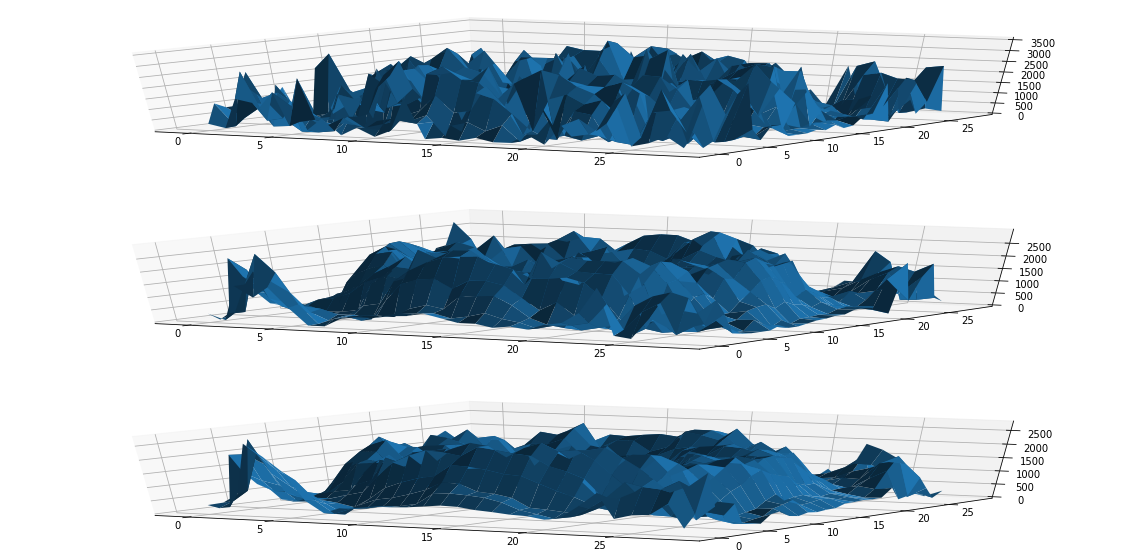

In [43]:
stack_file = io.BytesIO(base64.b64decode(stack_str))
stack = loadmat(stack_file)
frames = np.dstack([stack['frames']['frame%.3d' % i][0][0] for i in range(1, 101)])

num_rows, num_cols, num_images = frames.shape
xv, yv = np.meshgrid(np.arange(num_rows), np.arange(num_cols), indexing='ij')
delta = 50.5
fig = plt.figure(figsize=(20, 10))
for q in range(3):
    # Call `sff` with the right arguments to compute `depth_map` with different neighborhood sizes.
    # <---
    depth_map = sff(frames, q)
    # --->
    ax = fig.add_subplot(3, 1, q + 1, projection='3d')
    ax.plot_surface(xv, yv, delta * depth_map)
plt.show()

In [15]:
depth_map.shape
b.shape

(29, 29, 100)

In [14]:
a = [sml(frames[:,:,i], 1) for i in range(frames.shape[2])]
b = np.dstack([sml(frames[:,:,i], 1) for i in range(num_images)])

In [9]:
b.shape

(29, 29, 100)

In [10]:
print(type(a))
print(type(b))

<class 'list'>
<class 'numpy.ndarray'>


In [11]:
pix0 = b[0,0,:]


In [12]:
max(pix0)

89.77777777777777

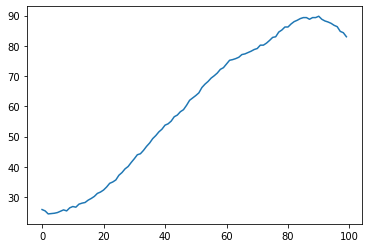

In [13]:
plt.plot(b[0,0,:])
plt.show()

In [23]:
b[0,0,:].shape

(100,)

In [37]:
d_m = np.empty([29,29])
for i in range(num_rows):
  for j in range(num_cols):
    c = b[i,j,:].tolist()
    d_m[i,j] = c.index(max(c)) 

In [58]:
f_m = np.empty([29,29])
for i in range(num_rows):
  for j in range(num_cols):
    f_m[i,j] = b[i,j,d_m[i,j]]

In [39]:
d_mp =  np.ceil(d_m + 50.5)

In [40]:
d_mp[d_mp > 99] = 99

In [42]:
print(d_mp.shape)

(29, 29)


In [46]:
d_mm = np.ceil(d_m - 50.5)
print(d_mm.shape)

(29, 29)


In [44]:
d_mm[d_mm < 0] = 0

In [56]:
d_m = d_m.astype(int)
print(d_m[0,0])

90


In [57]:
b[0,0,d_m[0,0]]

89.77777777777777

In [16]:
b[0,0,50.5]

IndexError: ignored

In [19]:
d_m = np.empty([29,29])
for i in range(num_rows):
  for j in range(num_cols):
    c = b[i,j,:].tolist()
    d_m[i,j] = c.index(max(c)) 
d_m = d_m.astype(int)

In [21]:
#d_mp = np.floor(d_m + 50.5)
d_mp = d_m + 50.5
d_mp[d_mp > 99] = 99
d_mp = d_mp.astype(int)


In [22]:
d_mp

array([[99, 99, 99, 92, 95, 62, 61, 61, 50, 50, 77, 80, 71, 51, 51, 65,
        63, 62, 62, 66, 72, 70, 88, 88, 91, 84, 99, 99, 99],
       [99, 99, 99, 91, 96, 64, 61, 61, 50, 50, 80, 80, 71, 68, 67, 67,
        67, 67, 67, 63, 63, 63, 80, 88, 89, 79, 99, 99, 99],
       [99, 99, 87, 78, 60, 62, 64, 64, 50, 78, 83, 80, 82, 82, 82, 82,
        88, 79, 74, 63, 63, 60, 54, 66, 66, 78, 99, 99, 99],
       [99, 89, 78, 72, 59, 66, 64, 71, 83, 83, 88, 88, 82, 96, 96, 95,
        88, 97, 97, 50, 50, 52, 67, 66, 59, 59, 59, 99, 99],
       [99, 80, 78, 71, 59, 59, 81, 83, 86, 88, 95, 97, 99, 99, 99, 99,
        99, 96, 89, 96, 83, 87, 59, 59, 59, 53, 59, 99, 99],
       [68, 68, 68, 68, 70, 67, 80, 83, 88, 99, 99, 99, 99, 99, 99, 99,
        99, 99, 99, 96, 83, 88, 67, 67, 65, 64, 65, 78, 99],
       [50, 73, 54, 67, 69, 69, 83, 95, 99, 99, 99, 99, 99, 99, 99, 99,
        99, 99, 99, 99, 99, 99, 99, 73, 65, 62, 69, 84, 84],
       [50, 59, 66, 66, 80, 95, 99, 99, 99, 99, 99, 99, 99, 99, 99, 9

In [23]:
n=1
np.ones((n, n)) / (n ** 2)

array([[1.]])

Answer


In [44]:
import base64
import io
import numpy as np
from scipy.io import loadmat
from scipy.signal import convolve2d

stack_str = b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFR1ZSBKdWwgMjEgMTQ6MDQ6MzEgMjAyMCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAAAAAAAAAAAAABSU0PAAAARM8AAHicrJhnk+Nokt97dSfFnV7cN9B3mPZd0767vGUVy9AXvffeexC0MAToQO9tsXxXd1fbajNud3Z2V6eLON2dvoheHFjdg9tQhN5ohAgEnqpk8pcA8p+ZD//hypUrv0h+d+W/kNe/I8//dOXL8Z+//v27vzonn5EaBRqJaWL/2yv/9ev///ffXLmitWi+mi4v33xz9cqvq2vU6jq1ukGtblKrW9TqNrW6Q62mfl1d/YZaUYyrFOMqxbhKMa5SjKsU4yrFuEoxrlKMaxTjGsW4RjGuUYxrFOMaxbhGMa5RjGsU4xrFuE4xrlOM6xTjOsW4TjGuU4zrFOM6xbhOMa5TjBsU4wbFuEExblCMGxTjBsW4QTFuUIwbFOMGxbhJMW5SjJsU4ybFuEkxblKMmxTjJsW4STFuUoxbFOMWxbhFMW5RjFsU4xbFuEUxblGMWxTjFsW4TTFuU4zbFOM2xbhNMW5TjNsU4zbFuE0xblOMOxTjDsW4QzHuUIw7FOMOxbhDMe5QjDsU4w7FmKIYUxRjimJMUYwpijFFMaYoxhTFmKIYU78yrn5DMkxX/vr4B/L85muN+Luv1/9bHblyWWd+d0X81c//N//h9/f/h99/+3r+h9+VKwvk5799TFOEAlEiOQQ+9eIe9MB09tmzhGMG9vSd609Wha76XrUFwP9r/HMz1s/koxJPZxD0ulgPbtN2gyH0ot0CioUo8fr9oIPFdAFv3VHq2Jbu8aP7+yVvDt87LJRKn9+1PnxslyFX9Odq1MpdcD1rAuWFzuHFfjICNxqF1sn46Fk5UXN0BwFu7p+aOV+4e/yyEnT7ATACIjhUxGGfzA8QegQvYd0fRi0CsOq0arVaa3b541C1m4xlYIYma7a3/kKATo2Yx2EymOxdmSmUPXrRKicdq9IMVjzqRqyK3Z2NtZXllTU6U2QI4P1y7lUW/DGaPz6ArAre1uri3MzM7PwSbUegA8ovT8OuVivUfdlKGPlbq/MzTx49evxkZmF1R+LEzj9FDvb0hYMP46iGRVuYefLwwf0HD59ML6xzNcFOsTCMSvpgA3NKt1fmnjx6cO/evfsPn8ytMqT2wvEAhcpYIx4xC7eWZ588vH/37t17Dx7NLG+LrXAzwBLXQ7Uc7hRtrfxqvH9pNMPNDlBt9dvnjaCCuTb/9PJrLz0ZMheC5iqiaOfj8zao26UvzZLW+5OI5tbYmjBxnJXmGIcfLrpJq4RJW5x9+vjRo0dPphfpfBPcPTgfGUOa0t4A82oEO7Sl+Znpp9OzCzSmzFMa1/su0JfIH35qJO1KPoO+urSwsLBEYwh1YaKASuhEE/Z3vrtoxp1aEWeHTltb32KJ9e4k4dSrD+ZDcDZ+/KeTOhowKoQcJpMtUFoCcKuBj/wptaLarJUK2f44F3YZlFKpwuiNJrC970MRdL8KHZePLnjS4n47i0aDPqczAFfrh43neLb9y8A4yOiVzv1m98eDzmDcIQBPuj/6p7qt9tpZDjCAYc30YxXr7B0S3//+OeEwIntjwJFUVbJW7rwYbXbLDGYqiZnf/I+XHrYDcsB5eD8bBTnz305vGhGv3q08GKKGbD4aacD46VG+UPVyZu9fn1qQgcLYyZnH8UZlOi71y5aTLOHA4uzZe3f+Sr//LzqcekxThn1APtYPfGxHXfBYd/rJOZ9OGzmXOhS568NSPZj8t8FP1XAXzQJCV6vj87hZD26t74aC0NtmI5DPhrMv33SaMKD2uipWomNfvsuPjvcIVwYdjHME8d3b+sVFoxC3Ab8vARbunPNZLVicaY3f7iciSKtdbJ+OD0+IaMXa7vo5mX+s4e5A8+i8GvaGovFYPJ2FiHTCLfEEC/oUSiCt7watUtRuMuh0OoPVG0xC5VYUxJJbSsxorv2ZiLoNMuEuh83hiZTWSOH4eY2IWZdFaSR/0AXtaiF7e4NGo9G3OVJzCO8R2Es89B2Q2d+H7WoBY+NLkq3SWWIjWHlx5LfX6v7WWQsyixjrywuz09Nkeq5ssGTuzPmH4LivzY4uDhJ6Ln1lYfbpk8dPns4srGzy9eFOPtMDBJ1QHXMrWLSluWlSwY8eP51dXGcrnIXjLpwg4Eo0YpUw1i4l8fAhqYmFNabUjtQ924Kqr5zNeqRf9UIaH0/PrzFlNrJqBSuNdv1VC1Bz6ctkYfiipgUaW+lFIKzEjzTen3XjJtHO2uLc9JeIFjd4OpA4TAuzW+N37/uQQ8HdJOvN7Mz09Mz8yrbImu7unfW1fkV+OMgEDRL25try4vzc3MIKnaP0Vcbltj3siuLjj03IpRVztsk6tkLWMbbEABSzkJBWqCU9jY8fWimPQcZn72zSNxk8mcmbJKwa+f60P4mDB7+ctvCwVSPhczm7Yo09jLSqaN8TU0hLtXI+gw8OiYjXrFHI1RZ/PJkefvaFoVEZOiwcvGMJC/vtPB4PB9zuEFqrjSvP0njj576hn1bLraNq84eDzvCgVwI8aK//jxVz5dxWDuxEhmXd9yWk0d/Pfv7pWcGmTQ0GQVtMVsrauPMSrNEitrbjUUR3/pczx7YlYU1mk0MsGufMTz0ldehSO6TjHqTBcCBUS6JH+5lczUfq8BqpwygfPDp1Ws/lhqN8mzAe43krFmf9f9Dhk3UVmfBZsOe5aEQcyaHq+IN9Bk2bLnVIE7vrvULFF/vXzvclfxPCgruORsvt9rIf3F7nA/7461rNm0n708/OG9V4UO52lEy5nmP5riC2N8g50qnOEM/nP7+tXryrZkBz8AciaOLOOp6VvYXH9cHrvTiAtLulztn44CgXLpqbbT8b/+/ltMNTO3hVB/xAIpVMZQpQHoraRS5fTpdI5VP1j71WJe6ymo0Go9nhD6egYg0A0DhdjuoM5T8TMa9JKRHyebsCicYRLZ48K+cipkUBDOHjTtSlk/CY22SqbLP4Clsk08nCz9P+j6H0aB92asXs7fXLZrmxw5WZo9WzfY+lVPHUTlqITcrZoq0sLszPL67QtrhKX+78vXfYVqd7F4eQib+zvkJm9uzs3MIybUdoAjoZpB3kNb1VzKsis35p/jLr5xZXN3kqd+GomYjlEsUIaJex6auL8xN5T8/OL9M5Cidas29wS+5CJu9TcC49J8aZ+eUNjsIO16veUq1RPu+CWv42bXlhbuarJ0/jRxNwgQdUXp/2UlYpm762NP8lopUtgTFW2od5mY3hqzd9xKMRTJra5F7ItsaU2LHe4Lij9Ejx7iAHWOS7DDptdXlpibzPXXWgNi40LEE7gA4+NBGvQbbL2qav09bJJyQ3gyU8sbtSqMQdlYsPHdhvUYl32YwdBpuvsPhSBaNCuvfYE0+HRz+fdnJRh14h5u8KZXonmG6WoJ4LlIkKlSKOov2TUixo06tVWnsomUz3P7gDiX4xNc6O32xzs/sdIpeMhLyeSLpeHRWPYbTyh76+Dysk5kGx9v1+Z3Q4KANupNP+S9FYem4idRgdEervCqlqe5T+9MNpzqyKd7teMyguZO2cBSneaOTodDCcVJ798di8YYwaY1i8j0aT3EsdwjalTTTqJBQwEvCXY9DBXjpTC3DnHlybWpTHecDBkdV0JtEe4PWs/gjLWbAEqcOp36rDpxtqwBPAga7zXTVkiw1khxfWJ0jazJ2ZuvF0Xeqtt3MlT+Rfmp/z7loc9XOttbrT5eM8vEMXgj7wvFJxpyF36visUgS8EqeV0ON918o9QWKvm7Ei8WYvncl+flN8/7aUDhn83+X9Jt6s44xw5R9WOuejaBjt9kvdZ+PxPh4oGOpNPwv7M4FYnaXx60YkGIUQCM4SqVwybOE73BltLJ5JVC66rWrSY7dZzGarKxSBUoVyMARH1yWwWlv4UyHht2jkEqFAIJbrXYnKySmRCRsWeKkEOmxHPUa5gMPc2d5hckVqB5hpY8lniPe9H+7tQS6DjMfcmjTLjS1SpdZ47XToMBWKzvJhE3V8Tc/llVUanUHmZ/7lW2e/roTb745Ri4i1ub66vLi4SCbvJktiiXTSyaafXXeWMb+GT07Cy0uXWb+yviPQeIiDWjSCR/Mh0KngTYwTScwvLtO2d9VutGxeYxfsGYwIqHYp48LSGikKJ1wruYqVauG8FzOQTNrKRE0LC8tr23xdAI0lspxQ8cVxH3GQ4zd9jbSSxwqNITInSnsJFk7rP3/VT/sNEg75xasry5PxnCN3Zrrdg5bUKUJbvXyUnBg4O5sbtLU18j6FulB9L1M1+S0hqPu+ifnNKhGPtbO1ubnN5Cut0VIa5CwWyqCt+PZDBw3ZtXJyEmGxeSK1LZDKa6Wi0QMXiAR6vz/tEgm3WSMTCyVKoyeWbhQSHUdYzM+V8mgK6j+rJgCnUacxOAEohXTf232xTgHaw4avN5jYfpsoQNGwzwdi9XI/d5iCi78ndZiUigzdfPHzuDM6HlbCLqjV+FNeRzzTVwI78WFO8TkXLzb68Ifvj7MGWaTVchkBfi5n5y7Kso1ahrYOBGLSk5/29as6QAeiYAeKw7vkXLplgi0yC3/YjEqTSa+nCCbHQxirBXfnH1z/dkmR4oTG+ybDiVA9RiqY9gjNGic6vP9bdfjtNF0bcfuwUNv2phSwRHrig/fmR3Daypv99uY0XeGrNzOEK/wvtQ8ZRwWEPSxzpWpzBnmPpzbFMW/4RbHkgOOO2P4JkQ+4RDZTQZMeeNbuCVN77bQJAmstGMM+vcq/e5WH/Frvp6zXuDvjOMs5svdKzecDIIj2BuXu2d5oL+3N6aoNPyv9pxxktuVHr+uRcBxJo0i+lMzE/EaezYFryfkzVnzbatVTPpfDZrXZPUAUTmQJnz8VoYlSSlXml3wiYNMrZRKxWKoyeVLVk6McFtTPcRIxqN+K+cxKMZkpTBaHL9W6Y3gLjp7ArrfeZHuYcpsUAg5ja9IsmVyhypaoHfdt+mzBVtgjt3lKAXuSnjTaOn2bLdCGCi9e27plRbL+9gSzSbgM0rZKHjQ62UptYBuK1r2MirVIsslJmNw0kbPcyur6Jkuk9xb2yxEABXB/xKUWsLYmxuVLTTCFWg9a1C8zspY0Ugxpv3iuXho3GEKtC67k7US5lHnZT5ilX5grl/2bITKEUCCKs4K5ZweDtGsyftPX19YuI2JJranSMLqDrXROX/bxoFnOJ5vaxvqk4mzzlO5st7nXENn5qVqXiLt00l3W5CnQ6eQ2zxBujtJlg9cUSDTfNvCQTSsV8NhMBoPBEaptsRIcZs0XioA59+qimwacBpVUuMvjCaRaRzCZU4j4w7sOAPK2fzzplVK+yXuRyjVmXwKrZ6Ita0jEyxCZVDzRe15PgR6LQW/ygHASar2xeMBWHhoi/fO1TWTcKpbgGBDwx/B6sYPtJ6DCT6QOY2KBrp3JfRy1RyejasiRbFb+mNXkTjSVICM1ykg/kpWu3Em8/3yIaUWhet2uC/HwvJO7pMg3ytjqWsgbER5+P1IvqkMaAAbayTgmWLg7s22GjRITr18HRLGY25UHYqN+Em2E+QuPrt9dVsGc4Ghk0B0JFKNkEVEfoRkDnmTNPbj7G3V4d2ZLB7o9aLBlfk14jeGOYPzO9ABK23fn7t6a2VIFGnU87wj8z/L7tKUIpFw7xlLZ4gzxn3y7LU14Amd5wp4CrcDoMIt77HyrIatGRr71ByJ41EQMiXC5nkKQj+eZNy/xhEft/oC7jIJZx/OMFf+2UD3thfxIf1TuPhsNhrA7q6nUSB3+kkkYTZn+q3okkkrjWLpQjmOAR88x2zEdCKBg/lWj2YD8HrfT7nD6IjE4juXc3gSwKkzKFegfc8mQw6ghX7hUrrX44PrxAY74tXPsGJjoNGIBq4bMFC6HsytSGLxxvJGIHCftr9zxRj/pMX8Zq8hmydklZ9pE7aBt1pKDR65PbvPU4stGQJ+olCfWAcTZualdlMUrb04ydnJfRKbuBnnQt5m7CjvYSgBV71bJWEBDRgnpuDlJ+/WNzR2u1OjL7xFAEAqinohbI+JOxuSJJtY3tthivQ8tqBe2MCMElcK6iefWV8FMjG6olLEWCAJ9PkhZJ0Vje3Njff3SU2IC0GA4zfBljvaGuPeLKxnR+sbGFkduh0q9yCa61Do86+GATSXisna2N8mb2WLw1d5spzao863ceKlDpHxGhZBU2s7O9jaDDDbSGkJFrcfgi9Ve17MRp0EhFvA4bDabJ9Y6YsVkkDFTJEJG/MX7Lg56zFqFRCQQiOQ6VyiRlfJ3B1P2cMJd/+64X0GCTrNWKVfqrP4UVksDTXNAwMFyWCIS7bxswHG/zWQ0+2JIMtV4ZXIBzRzchzsvlmmpUbNYQWJgwB/P1PNNeI9s+z+SOgQFPHUTxS4GpA73qkF7vE78AVdmjlTVEAMZYZKLdCRLNMA3H/dRJd9XqVo1fna64OYtq4uNIrq8GnAHeXuf+vJZhV8ZTIaa8UROtHh3dseC6MVGTrcS4oOg05ENgoNuHGlGhEuPb9xb0aAs/2Cg0+7zZP1oDlIdI7guk2IvPLr3G3V4b3bHEHO5kUDL+Crv1gdb/L13xntQ2ilYuH97dkcbbFSxnNX3z8V3iKkQSjq29MWSyRkRTd9jKCCX7zSbtybCxmBvP406LTyLDldAe0H6QwkybED6WLBYiaegixfo6zMUdCqd79MOo3DG8Rwzp+/kS0dtvxcejMqd02Gvl3TiqlI1wEL/iMX0BrT7qg6CMJ7N4EQ1Sr5CLctoxbSRMAxkX1TrDTjoI4XodPujCTiKYE53PLzCT0hlqZ8zyZDLrFMp5HKVzhZAGkdjFPap51ggEG3VokFydBILdsnNo1Rl9CWxGhg6ilvPHdFqN+6ZaJTHnjRLnlCmcyZr46ZRnc6Y8E4Nd5ONgEuKdGeHweTwJYZI8dlzQ7MgjRVfnWadStEkdbe3tiYaFqicYBMMlj10QptDQiYZn8si1U0Oc1s7rF25yZcb5UKBZAByAm6dlDJubjF5MqMfycnnNlF9IlkGDDISyfxqnCjYnSLS5lw+nzobQHayaHCYDMpoiaDeALLtxfaHw4zfIBd+jWhri8FTOOBiJ0SHFxr7p90M6NRK+ZOmRkpthyXU+nKdcq/KM7OjhVYRDljUkonSWEwme5fcArb78YLarfOA5Ze1HOg2qcnZkk/2PL5U74wXY77tpyUioE8/e9/JxHxWg1ouFYslSoM7HMcFPG7/ti0Yc1Y+HQ2qaNhjNWhUaoM9CGEVOFg3+vmsdCYdDYVb500kGXBYTNZAAk3Gqy8MjmA9A/eSzbPF5fiwXqyicTAYSGTr2VpyBMbwHwaGPsDnqOoQ/K7XHJI6DFjBSu6ntBw7kNfCTGwPFb2Hw1iuGnr1fgTLOO5i2azyMpGCZ3dFW2kQ8OKy3xFgDy46kqcynzwQD9TBBCFZvjfHsCJaoZ7ZLgd4AGC34f5wvxODmjHxytNb99d0OMvf62nUY46kC2aSyhMkrcvA7MXH93+jDu/PM01xpwsOtAznOZfO39zde2e4C6XdosUHd+aYhnCjks5avP9ceAsZ8oGEna4vFo2OqGT2PkuNOD3HmZw5FtR72yMYspo4Fi0mT+6Hth5J04NaUg8GCsVoIv7+eer8NAXYFY53iM0gmnW8QA3IrVxhv+lxw4O9Uud00O7E7WklUQmw0Z/RqFYHtc5rkSiSzeUyxWqEHGnUTIM5rSPbSAh/Vqo1kJDf53G5PIF4AgYg1O6KhZZ342JJ/A94Iuy26DUqpVJtdATTzaMhlPKoZpmRUKRejYYcepVUdLl51JgDSbQcDhzELef2SKkV9dh0k2JPNkueQKzQkzoc1vQqcvBIN6sZj04u5nM5LBaLzdkVyoxg8eRM1yiIwfz5ad6l+jV1yeQlN0cusB72Fd0bBRUOhy3keHZpJIc5UqQKsz87wMni7kvaQh69/FfjzuTnDbk5gOCS2Q1EG41VAONlOF+MEwWbPYk8YiSfSfx0AJNiEk4C+mpU2CKIywtvutFRb5gLmsmIdrlfoCy+yoUUm4F1eL4+OupkY+6vTW0SL0ek8+daRLvCNbOATKOIhL9WKvIxcAUKC9jugTmlW+uOEM+ruZjXqlPKxCIhny+UG9xxIuLZfFIu+HXI0dtOJh5wmMgKKJPKyB1BOJYmEb1blkDUQVwcDmpYxEeaNVqTIwRjpYS/bvDxmCiORPyB5qsWCoVcNost9O8AAAD//6TZZ5MbZ7Yf8LVddtlv/A38Hezrvd6VNogSxUyJHIbh5ICcG40GGuicG40GOiNnYDCYQHICySElrrjirb3adMt+f/1pfBoz2vLet3qqUKyZwwdsAOfX//OAhlPVBu+QkjCu2wfVvbe3bqtHo+7E0TWRrzXH3qDyXCl7fz5Gj6SttfioWv0wnx6/eTniMKXv/dWJuqfhibrWfGHtfjREp97n3n9/bIRWiHYvF2eemV12+2t0PG0bd+6xJW7l8Pu93WthJspVuLFSG0a/+u2d1ZKd2kVWZj1+QxJx3OOkw/2yMatGH3z5i98u5Zqr3MFBKvlyPThX6tX4W8dNN+2N+9c/+9nl+q/w4P/Dz372n+DP/wyP/3L1+/949fN/u3r8u6vf/3t43IG//9u763iVJExhP/u+SSH83tbLf8r9ynTZ0P1rn9zZwJRpz27kmX9tfzCQJq8XH2V7XYTQY7c/20A8gnxVb2JlLkNPj2o1LLeeT3tR/Ux99nm0cTysIirXaqua9v1F5dvXuohHSx8tPBu6QXxrZe1/bDRfTCjCOD7p778+2tvTim680xfW7f9jldPp6uT9SNWcdrvd7I3lKp1PrGQxB5EFQ3LfdIZTWxZ5jqFZsVozpaqJk5p0f6sSDJX/xa3KDJ5D0qlkBqNkb+8MroxJ3FpVRXnYL8tkLhULB4OhSALBRcPuCdypnv+uqHamKl1Ck5Hg7vb29m4wkkCp6uhwiCScetYe9etsNhEJ7mxtwtreDcVzWv/VRXrSDqnNb9926LS/b2tzA9bWTjhDq2OB7tJL7ahrKIVE+Kq4vr6xFUzifOPI5Tmd1TGRQf3ijl9dW1vbDCQKouUGbjyy0kp5qOSTkVDgx+LGTrzA6E0DbTYb6utjm0LiV8+7KCZKZbtEm09o63j/eVvCMzF/6+bGOhR3U7TTnXBL5u3x8emsWWXzKbjena0t/3JDWaG115wNNrFV2R13XZVEk9FQAC5qezuQKGr7c7kZp9OU3L4YtHW+hKbi0XAI3sF4jtE7EvX42qjDpc2z388aNYkqoJlkPB5P51mlbK+trx39vMCXi+3vT48nDU2k4IPJFijZdnsaO0LZrRXLsxSGGX+379oKTeAl2XR1tXuRLgojz9nXp29v3BAPBt29K4cju6ceyWX3z8e5Q2FjNTaslH83Gx+9eTlkULFr/8UKuyfBSXmt88LY+WjwttOl3n13oO8+xZvdbIx5Wu3yOw+x6bRZu32XxZnl+YfJ9m9DdIStcEOpNo1//dnddcJO7GSezbrcuigUCi4rHuyr1X0jvnTzl9ce5zsr3P6PDj09/s5zUi1n86sb136iw2v3NosGWTLFOTgkMxw4/EPuU9PlI19//undLVyddq1Lh9VMk6sUHyHdToaoJe5e20IbxdJ5vYmWmVRpfKDrKLqGpdyIdq6tXo83Dwc6orCNpqwqv3+jfHNW5vKR4kcTy0bAoYHYP6/Xj0ZFvHZ80pu9OhxP1IITa/XA4f82ysmkNvx2qFS8Tqfb7E1EjcjFn2VzNiJxNdE+b/antiKJPMNwUs0wBK1WIDXh3mYlGFD+aukyW8TQTDqdLTBKfXZ6oFeZxO1VRRD7XVWhsEwiGg5HYmm0KBlmm2VPK/nvcLk1lmliYTSwGwiG46kcOJz3Mwm3gVi9XoNF/druDqzdYDiBVfrnr1PgUKm/e9tlMrGI37p+7+4EogijDhnKdxiyq0oRNoYCgYU2QJrGee/A4bkKrWV5JpeEncHAQtvmdiiJi6a9c/2RlZTkkVpIL1o+sAueNrYCSZzVGtVso1mXz48cGr3c+mOR0KwCaT6hzMPp845Syiaj/kvxnW4F04zbGTIPrVujw5fTRo3HM3HY6l8RXFBObE3rU3C4IlqDrqfRWDoe8a94ZyeYLGnzmdAAh6TUeNVrV0USyyQTMXgHw4k8U2nzxKNr4w6bqr38sFc3ZLqEZdOpRDKT5xTFera2evTzPFfGGx9eHk+bFZktYSiK07LjdhRmmGU2n5meKZHk8MO+65ZZskgollOR2q+TuDD03Jk2ffvlF9y825mBQ/jsmwOjLR1KZfuPz3OH3NpqdFCWvp0OD8AhjXBt489myHm5M61s9F9Utz7WONNslS7e72tbj7B6B4kyT7WeuLuE70/qtVt3mQL9ePZ+tPHrABVmNK4v1OapB9fub5B2bOGQXeP5fMFhxIOZos+t5ONbn37+BO+tcDPf4Vpg4fBt3Um13a0Ht774iQ4//2qbNIli7cohv3D4ielIsYfXf3V/h9AmbbOep/+19Z2ebrAaDg7bqaKZuv/FTr5VwM/qjaxKJ4rD/XIZya6Cw7B6rq9/mWgfdCuIzNTroiR+dy68PZFZLFz8aGSRKDjUM9Y/uO58kM9Xj0+6e2fz4VjJ27FmR9iw/6VWTiaU/jcDRa93u91Wb8IpeDa6jGStrMTWROu03gWHsiSyLCcbpsEqlTxRFu5tVAIB8S+G/3Hn0WwmgxZZtT472a/oTPz2miII3bas0nkkGY9GookMBjffWpNiwOEHXGoMBIpYGA0FQ+FYIo1R1eFeNwN5iBidToNB04samAmGo0lM75+eJyetoOy+vegySCIGreur2A2EYllW6VNEh1pqBYyKWsz4Raj6UAPRTIlz9y0OHKppls6loakjfttDDu+G0yXJMLauL1lJQQSHkC1QDS9CcTuUKjKqpyPgUDw9chgAEf9bMZgiNAMlzMeUOR8ed1TCf+K/7cywbrtPPzBvDQ+Oxw1TLGUh1CILarsRcDh2Jv0N7JlQ63UbOltArp44EE4RlfmUBYcpUvTOOm0/8Xxo/juYLLCVFlNcujbuskn9+HeTuqGwZCGXzaRSSIFXJOPJ6urR/wSHee/986Npq6ryZAHDirTsOi2RHmSZjWVwKJaKvQ/7nqdxVIlQbUfjm68SOD9wvb3y9OL6Z/Ss3d63K5oIDvt6UzgQVfuH57kDBhz2Ff7dqD9//WJAppim/icj6LzYmlY3Ry+0zY811qg18q+/marrD1CvnYnSj9WeFHhcOhi7uu+QejT9drD2aYAMMRrbY42jzMPPv96irOh2ehkcrnJcPg8O5zOpMnfTT+/86vpyafiMmx6mElcOY28bTqrjbS/duf4THX7xYJeyiEIVHP6uAXk4BYcYOFTij278+qsgXRm3zDpG/19wmGowGr6U6TYTuIU8uB4odvKFM893GM/3Z4qaRlZyKTeknNc2b6S6804FkWjPFQTu/Slz8UKkciH8o5FJx8Ch5jt0Zl0UrRyfdqYn+/2hDA4bLWHD+mtVTcblzru+rDd63R44pEUMiSwjiJkV6ZpgvnTaE0sFiBzLg8MqLWkYOLy7Xgns8n+qaRJLFDAUQTCCUxuzF3tlcHh3TeH5dlMuM9BHyVgsnkLz4FD3CPoEHBYkr8dRxKXRcCQaT8FQqw8mnXTcrWeMZqvO5BZtD6AgTOO+w5dnCd+hc/G2x2ZTwGnhKRiMxFFW7pZKXXC4Uy0rJSSZiMdikCHQ2YC0xNkzk+UqlJxgaCyTSiTioA2ydjcQyRBSrbrxxZKZ4LiRikPLw964X9zZDadKjOxoSKPhcSeHDptfgFjs3NkJpchKDSkajylj1j/ulimoAuLI5U6E9VpdChwO5ofDhiX7obbYGQgEopjUGlljcLjMVzqdZo0voumkLy0UiqSJyv6YrsfAoeCetDqQeDBaZlKwO5bCOa1B4Q+vjXtssnL4fuwZKlDKA8RMFucVsba0unL4Dxg4dL85Ptxr1coiXSzk4VW4doOnBll6Y9nwDAHPt8FhXedogiw7Tpmtn8cLfM+pT9XpxRe/IfYarbmllUW21uhpdQ4cWj+8wObU6mqkJzMXg+7s1Yt+KUHWtT/Vgs7z9amxOX1e3vgeHFY99PxiLK/eR9x2Oko/krty8Al1NLIrN+/SeWpp+q638sku4Tvs0rWX6KMvHmzTVnjryiGLYQ4jgENtXkee3f31jRVq9IybHF06lH2HTTvZre88vvflT3T45cMgY5fyuvRvHJaTj2/+5uswWxk3TQ8cNr/Tkw2mUgCHjVjBQZduhMheDvMdKlQc6+3JSmrhMCidGzu30r1ZSwOHrs1xzLcn5JtjjkSD+MdaOh0Hh2ra+h+ONe1kMuWj0/bkxV6nL2FWrNnkN62/gMOY2HrXlfRmv9tv9yYkj6YjT5GMkRUocPjCao59hzIPDk1TJ/hyjijzd9e0wA73R70scSSO5bLZPCmUG7PnU1VnYvfWZI5reWKZxVFo/Xgik8MJxdScIrVwKLpdmiTBaALExOLJdDZPVQajtu8wXfMadRqOnJecotFYIpXXe89P4+BQsl5fgEO/c2H5wRdNopzUxovgsLldUWBETCf9lfDHyHACJThrz/AdSlGKwqCpYfnFoI+UlGuVdd8hy4wUHEVgvE6BceAUiKRLjGiXfYfsC3CIQ8P7TheEw2mqUk3htcdUba9z1NXoyyNyfGEtkuW8ZnvhcDbv122Vvgo1/7YRy0vNQe3SYbnVbkI++VvhtUYi0TRZ2R9Rlw6d542OobLFvH9VcAhMF7lynSg8/GzcZ5La/Juha5Z5hsABIgIOZV5/sHDIqnn77eHhXhsmFYYoFkhW9qw6Q4LD9aeGawgFtAkOm1UePgHNdRTKPbt0OFGmF5//qjhxm3OzXBaZWr2juAw4NP/wAtsnwGFfol732nuvnvfwWNFT/6gHnOerU3Nr/1hZB4e1ipM5fTMUl+9mnFYqQj8Su0rwKXM8tHyHGPlw8rb37Je7RJAGh2T1DHt8fWmHsUKbKXDIrLAMhtmMsD8T1Xkjt3r/NzfX6MkzbnTpcP/SoZPoNXaffHXzJzq88SjMOSXs7xzmP7FsLfX09mcPo4I+qhuXDivJ+sJhpx7Ju9iTmxG6j+ROvQYik7FcdyrJycwzcBgQzq3A7Ux/2gSHlGuxDPXuOf7qkCWy4LCaTCVuEN8oKXBojlvJpHp40hofT1s9KWfFGnV+0/yzriajfONtR9Rbg16/3Z0UGSQVfoqka1keHBrPjfrYVBXlymGlyCqo73AVHDI/aKrEUcU8ls0WaBEcHo3VCh27v6ZwbMPly2wRugxUIPkiqZiqWbhyaLdJggSjSYinRDKdAcVaf3DpsOp44BDmLSj66QVMMb13fOnQfH3RZ+E4eskJYiSWyvFSK4/7DjfLkkL4Z1VYKTjPAdIcwRrTGjgkxRBBYlkEQTIZaGw4RIbjWUrWy2vgME5TI6WYQ7NQXxSDwWiGYHhLzTSaHn08d7giBmVgnIj6IZyhK3q84DucNg97GrMYzdMLiMEIynuNJvm173DW9ezypeHL6TMODvv6yHfIKY1Wy5IIkOYbhltOBhwOiEuH1pHbNstcaTFrwH0nU+TLbtF3OGAS2uxd3zU1gaVKBfiXUVyQ2cpXVw4x6/X8YK9jVlWOLOG+Q9OlyX6WWntSA4f5jPdh5rZqAkORFdeWCecsVuC7dmMkTy+ufVoYWfUDQy3DPbjeFm3fofFPL7G94spKpCeVXnWak/PnXSxccOQffIfPptb24ZG0cKjZqZev+vyT2ym7lYzQS3xHDS3zLwbmpcMH44vu8i92SuCQ6ZSqrwtPbjwKsEbAd9hhVpgrh3uCMm9hG199dnuD21v+e4ctN9Fr7i4/uPUTHd58HBWcYq7ydw4/tSw98+zutUcJWR96PzpMXDn0wjkPX74d4wbp7MIhEUM7E1HyHSadAHduh+5kB+OG79AxWbr09hg7P6BL2QA4jCcSXxLvpIXDYSMWkw9PmqPDScN3GIWJa9P8k++Q8y5agt4a9gbtziRPpX2HqWqWJ2tC7bjqjkwVIPoOLUsr0DI45O6taIFt+gdVEblFM6AFRi43Z4cjVWOiX/sO6zancSXMP8CkswWCUkzZyJO+Q1ywm6USWVyESNJniObJcr/bSi0cWo5H5fzmvMSWgKlV7x2exBYOz32HYCl9ySkWT2O8WM8VwGFjQ+UVIgfUEADln9hiqTzJ1CaXDndxAkOBGorCc0OuRRIoLVfUFXAYo4iRXMQwLJdbFGFIBBQ0Yyrg0KWO5jZXwgsLiam4P0GCw0o0Dw6rk/phr8KSkEtwVUm/GEUFr97wHfZney3XgTfBD61LiPG83OhWFg4BSLMNeVTwdy5mT3A46xVd3yFvHdhtU+Mh8DDUvydlSoLiFPKXDst7bzu2qYm8n3gYmisKEq3d+5vDV/vzvY5VK/M0UaQ42TNsgvAdPgaHPJZyPsy8tiGwNFnxLKlonUULfMduDCVw+EluWPMOa7IikDWvyVsUOKx9fJmf5BcO8bNWfXR23MkFMVv8Z9/h04mzc3worMH5sFq24s/Puuyjmym76Tvk2uXQinjSq2ngMEc8GL3pPP1fVw5x/V3p6c0nIc7Y3Uj+G4fSfgffenDtzqYwe8qPjv+/ubTlJfvN4MrSnZ/o8PbTuOgWUU1afE+TXjgsfGqZVWTl/uePU2p14F451OI/OgyidWLlTkIcJhFwmJGJaLY9FsREGvLQCbBnTuRudjio+w5tgyHxN4fZs32yiPgOYeb7snQhpKz/7hj9eiQiHpw0hvNxvSui4NDltsw/VtRkhHXeNHm9PeqCw3GOSCZDC4cc5GH1qOKMDBWWsHCoYpSc/dEh9c+KLPK+wxyKs0q5uX8wUMDhQ3DIeCbrt2DWN4MWSXAo6rmFw4JgNQpFyv+2z1/AMJcn1F6nlVw4NCyPzEHnZvwFUtMIVu0dvASHIck4fwMO/VjLor41GHnzguBlFw7XFRYc+tLAE4iJxjMFktbHVd+hsFMogbNczueGpGIRCEtGrsiXDovgML9Yi2I4FEMoijIWDsmDmc0RRbwARYhwKEYRuqKF81XfoQsOeRreAvCy+LYmlhM8zyN8h3vThutWhMXg7l9sNBovyPVO+dKh6DQ6rkpfEgaIcd9hF/cWDs19s2XC1qJfhrkWKQmynbtyqE4uWpZZkfxALBZyvkNCvfujQ+Ns5juE3QxVWjg0SwuHj6quwWEJ88Oe2zFFcKh7plgwrxz2weFnv0QHFeewKil8qeo2WMN3WP39S2yE+Q7F/GnDHZwetbM7WUv4oRJwjh9P3N0Xc37hUDWjxydt5uGNpNUAhw+ZVjm0qpx2q+WFw69HrztPwGHAd5jX3pPLt5bDfG0bHO51mGc/Opzy4n63tPPw83vb4v5TcXz8tzyMv23XE/1WaO3x3Z/o8M5yUnLx7JXDzJVD2zCya1998TRT0XvO3zl8lOm4AaROrd9LyaN4ZuGwFEVaY16Mp5bRpBugT934vdyo62oZiQSHROH1QfpsRlw6jMTA4Rtu4bDnhYLC/MQbzEZuZ+HQYbeMhUPGflPn9M4YHLbHCB5PBsGhnmV9h4eaNayVVRVOI75DCEMJHLILh+QfJEmAJsThnl7kVcjD+UDW6OjSmsLSnsFUOKKA+pNgrkSBQ6GCEuDwu4Jg1jGcgmEOoCEZBNgUSkqv1Vw41GuGR2DQ1ZBqfq6l0khO7+2/jE7a4PDszYCB0AK6EE8w18LIK/A2kvcdrkm0Qi6sgSdfTALBKaoy0sEhwW9iOBCESgHiO5OIRlMYo2jiM98hWRhJxQLuLyj6/5PgOyRq4LDhEvM9cEiUilDEshCIYXColYMYOKxN7IM+NLzvBVvYj8RyYt11Lx2OPdutihSElj9owykwAQ7b6nDhULDrHa/MFAv5xdkzkciQ2qxTcGNUiuTMWa1l6YLvzHeaRghRstAfHY4vGnBEkEWOhtETw8BhSbnjO8yxas44ne7vdWxLl1iaoHjJqxm473BjSQeHaKz2Yep2LdhL6HVDyJmn4LBtNfsiOPwF0i/bRxVR5vGqW6cNci6o1Q8n+SEKDrsiduLZvZOj9v8DAAD//6TZ6XLbaHro8UlOJZV8yR3kHrLNpCqpyvR097S7p73Ikm3tlkRJ3AmAALHvALGDG7jvixbbkiXbrZ7uWdqZmZ4lORdwTpK7yfOCsme+N8q0y3xFkabww/95TewpXtX+4CUaFw9nrcT1qbL1q1AJrEry+VVHevBxttbOJaUVoeMcbzmve57zyWcSyd+f3PQefX+fS0iu3KOcb6T1TzeSmv90J/fkZCCvSzJF1WX9bKHqZ0MhsfrhvYPys8fm4kU+e7WVOCs3/fRXvXZu3D3eefz595bH38BN+z/f+95fwp9/Bbe/vr3/L27//re3tz+7vf/P4fYZfP3n63krYgnXPCd+0eEL6mL36rf0v9TCKrnz4OP1YuAP6pWIkv6n842backe/bDQbxxgLfnpXcyZJvOvmm28zCbx7lQzMvn1Yq6REK6bubvUtBu5mCnUQ5mj3pxlX51wDJ6gfx0cJ3MfszdKvvZ3jeqgcbCvnl81h4tJo28U66l2XXla+b1n547l2k1T8fvzwaTbnRXodPbwMZb3cEUMdf+5U5kEjm27mqSatZqJcybB2crnG25ij/+truuaxLEMWWR1x+mcno3KrpRa3bIUKQpFTxXoIkHgOMXLklVTnCJ/7ZW+ofVqRNACR5M4ThBEkSQpmjOH7XYuE7UKvh82OZIii2ihSGAFDCf94enL1Lx3aFZefTmRSXSU6BJFFHJ5gtbVGkYNxIftLUOwhBJFUSWGYSgin8kSnCg4U09RPF7fLtJUqUQzDMvCYjadLpQUy9HXP3xYTQulqckyLAcHLOLZVDKDiwIblLFWO+LPFjVVEASe45gSicFiGpdd+6AUrgrBvPps6OmqxLMMTRFYNp3KkEar0eDuV+6MTqaNWjMsyxyskXghn81kaSvqWpPRLvVE1qrNQdtV0CL6Z+ZzmOCedukoLeQFrbrwOjXfkHiOhccSGMEbRpUorfxwNpaz1vTLZlj1yqYmw6ssUaxhMNanmxvP/4FUbDK8np+e9OuNsKzJgqQarSCkuTEh7q4EUUUppvy3i8awbqgy77dDrVh5laS1brUzNOY//bcfYMNy9YWrmSodNJpCKDwz7OCX19SI2NhIDgzyCs6j6+edwk6+osYOH0w7idcLCTn0rcrR85dt4d5HsUNxhW+5x9v+645763B801t757Bo/0rZ+GwzpXu7O9nHJ315XUYOJeRQPR1JR2sf3z+0nz22TpYOT61mAA47+Un3+On6ve/o8N4m5kQM7iGHbeTw6ctvwWFQo3Yf/niDqniDWuyw+42bbklu7HA/39L27xH+9Cj3KmrFDjsTVU/n14l8I8FfNQv3SrN2wy0YYj2QWfL1aer6hGWwQ+bXwdFx7iPmtZyvgsN+Y29XObtqDOaTWt8gwGFNRg4tcFi9iWR/sBhMep1Zlkpllg5lMdCCZ1Yw8d85rNf0AmsQnCXfXY8danCgc5AkOcO126en4FBMrW6XVTEKhNhhESSWBFkqV2WL4K9dCjlsYCWBZ0hAWCySIIdmzUHr1qHnN1myBBDJEvyOYzhR9AcnL1OzwdKhRC4fwdAkli8UGV2uFKiB8LC9aXDIIVhj4ewlC9lckZd4e+Iqssdrm3iJLAFCjuc5msiDQ1q1bC12yJNTI16Bgy0ROXBIiALtl7GoFfEn86oqSpIIEkFwbunQ2qeCVT6ch89GnqHLIo+Q4vlMOkuZrXqdvx/eGS2m1WqzYikCskbghVwmy1hRpzwePQWHaiUadjwVCSaLOKyCw5NOqZkWwWFl7rZrgSGh5yxRRZzgTSPEqHcObxoBOCwbiiRyyKFeKt/Z3HiGHFLhy9nJot+IKpYOL1szWr5f4ka4uLfiI4fHzjfzxqhu3jrEwlfJktqpdgYmclgY6JUXjmIolF+PuJA/163gF9fUAI8dFl/Ww/7Vs3ZuOxsih/WL+5Pu4RczYevfQxkcHj67bPJ3P8zU2tmksMI23eRO+KZ56/DenzrEy7/RN36yndHdnZ3sk0VfWpck1EPtbKEoJ2Ml+ejHK8fO80fu6YtC7nrz4MRqBZmvet3CtJvc33zwHR3e3yLcpcPizzt8Xp3HDut+nd5bu7NF17xuNXbYgx42ZZdezYOebMs4fECG04PsNXLIHGPgUAOHeK6e4C6b+H162mw4uaXD4quTo+sFy+CHzG/8w8PcR/QrKV/5u0alV9/dlk6v6v3puLrsYVV+Gv4udhh+0ZC8wQn0sD1NF2OHBRcc+lrwvOyPPXDoaSJyqOWZ2OE91EPuW1VVUQ9ZqsiZntM+PRma4HBtq6xKkcd7qkgXUdhoUQGHYvmdw0ojT4FDiihSFAmVAjr6IGplM01w6HoRS0LtQE3cmNjh4jI1GybMMHaIusYiFHi+QLKGHOapAQ8OdQYcIoY8+uZYLk8KEmdNHHAoaBsYSdKQPF5AV4BCJoMxqm2pTz5cBYfFmc6ygggHmCnm08ghT/om1mhF3MmsqoiyIksiz9JoETks71HBQ3AYnI8801AlMUZagOSBw1qNvxeAw0ml0qzYaowUmpfP5mi70TaRw3VZCevDLlyqILMQRFhFDttLh2plZrfroQm941FMCUIwtaAQO5Sy1uSm5lU9y4KoSTxdYg2NNGOHFDgMLqfIYbNmG5okaXrTWzrcfwAOVeLI+mZeHzXAIed3fKUQXi8d9s0ZOMz31eCFJety0a/XmaXDn19RfXwdHOr4Zc3vXj1rZTczofIfPji8O+kd3Uz4rbeh4pmVxPmLiP/8R5kq9FBYYRpucrf6puE4P/40dvgFcsgegsNuwfituXl3N6s729vZx4v3PdROF4q8mGjpx588THovHvlnz2OHC6sVZr7u9fBpN3W4vfIdHa7skB449M2zW4d7l8ih12D2H322w0Zuu4Ic/nfsUEIOu42nmVb5eKVUm+69c1joTBUtdevwRbP4gJ426shhDRwSr+aJ6zlDYwlwmEhkPyxdi7HDbm1nUzi5qvUn40rssFWVnga/88rZIyn8og4OT/uTbmuaJJLZ2CEmS77mPzPdkQMOfU1ADpUsY+BceemQ/VZRFBXNTlSRtwLo4WLpcLusSA2X81URSkkWi4ykSuUab+L81dJhPUsKAjwKkgdwkB1t0GhmM612wXfciCZpGiWPY0vx7OoN5pep6ShhBq9upiLMpDTDCTDYEgWM4gzJz5OxQ422BBrVEERxJTyfp0SJKY+XDp/kiSIDCqFsAkdhWXCo2WUldsgR4JCDFVQ9lizAdElIHOGbeL0ZsfNpRRFVFSDGgmERHJq74JAL5/75yIUBUYmRklguk6PKrWqVv+ffGS7GMGPXHA1VDYZPSB44rLXM8XCPgv1QUBv1fE1ECYb3CC8ghy0qSosFXg2n5Va9Ysro9cA1qVjky6oPDj+YTqScNb6puhVwCM8rCwz0UCuan2xunP8jcuhfTsBh1K47ZR0cak3XpcChsH/fj0KFODTfzurjyFQVcOgpufA6BQ5ryOGX//b9XF/2X5RFTcb9Wo0OuHO9HPzsiupisUPssuK1X563MhvpUIEe1i7ujgdHXw45cCh7Znhw9qLB/eQDcJhN8it0zUk9rb+p2c4nn0oUcthdOnTkbl77vb11by+n21vbmSfz/nJ/WJO0k7kszSdG7smna2n/xaPK+Qss92pzf263wWG/X5x2Use7q9/R4epTym/EDsmfdbicOt+//A39Lw23wSae/GSXb9mt8E8cOvRqrtfYTTWd9EOmMdnNXEfNuIftqaKCQyxfS7DPInKFmVRvHUoMfj0/AIclcPitl9gHh1diPoS5tFvdesIvrmq90Sjs60TscC/4nYscBm+qojc86097rekRhhwWwKEkxg6dkR075BWjXpPTtI4c3l86lGUFeshxJMHbod0++xOHkcP4qgQOYcJkZA0ccgY4dEpvYS6tp4vgqFSkaBoM0nCog3ozm20jh3ZUIhnAyfACagxO4N5gdpGajg9ihwKJkicAJ6aI4SXOEN0cOFxtb2gUcggMJSADs2ehJEu0ObYVyRe0xzkMHAJDGRpSQg5ZzTaVx+Aww+EzjeEkJY4eIE2nsoTIYeCwGoHDSUWGrmgIIkthGUAqu8YOFayw4cwDhyhMioReLA4OS1arUuXvesihFzRrrh5XrQS7vHyOsWtNYzzcL8H136+O+gEghQsKBVcrDOPdRZNqxg6DidGMHcK3hfeIhOuc4ufB4QQ5HN2ENji0y7oqiyxyiBuxQ9jyUsHFZLHoRZ2GaxnwulVwSHIjQjhY9vBQfzutTZqwt2T9ritnw1dLhz1j+uUPf5DtCd6FwatSwatVS+8ddpYOC5eh03p53kw/SYbyH7yD2sXno+HxT/vc1jexw/2z53X2sw/iHvIrVNVJ7UWvK+DwTuzwdXcV5tLYYU75g7t1/yCnW5vgcNZb9nDpUJxNzMLGZ48ywcXj6vlzcLixP3PalfTX/QE17aZTe2vf0eGjPdj+MnhgnlJLhweXv6b/tWFH3OHG3T2xbTdjh//1R4fdxu5x5OXWuOZ4O3MVO0wW2hPkcAMcHjJnjdJDdhIih1LNlxjsarZ3PaeXDg/2Mh+SLwVwWK92qhuPuMXLancwCns66mFFfBr8funwi6rgDc970140SRSSGeTQue2hYY8sx7IDjUMOpRRyaIJDBzmUJEUTlw6ditU+nd86NMGhTfuKzMAQSZKsoktmjdFw/qVDvy3plVqSQA7Rho2BX3CmKYNaK5vtgEPbiigSRlIaAgXnPQEjmzeYXqSnk4Oyfw0OizTDcKKiiCyJ4TRvCE6W7HOrrQ2VLAtQSh6GSEVkigWMVqSScevwUaZAMDwwVBRwiGezOKs7prx0iM3Boayi6EFJgVqWkNgCctiI2NkolCTDQBBRZrOoh46xQwYPwKFzPoKrlIlAoK0ljJ7gMKwKd907g8XY8Zt1D6ZHVLU4iLRdjYzx4AA59CrjfqCjfScDG14Swzj3JHrncKxF9WpZluEp0Xhe5G3ZQw7H4LA8uoHNmAc/FgNCjBwqmPHjjY2zfyrJFuVfjBfzXrMbeZB7SVebjrN0eN9vhCqR0N5OqtMW9BAcOnL61mEbHN4gh5x7oXOKlPOqFSpgwaH/s2uqVQCHQyN/GdjNy7Mo9fh46fDFTwaj5FcdbuuXoeSZwf7Zee2PDsnATu03XwcWOBTfOTxY9jAj/oe//eAwr5vgcH2G9ofvHQrTqUVsfv4kF148rj97judeb+5PYVRMf9Uf0NNOOrP/+Ds6fLzPhrcOv+6wS4fMv0ZWkz+Ci4PcLUdB2KDk/+r/culwLd+Ndo4afmGNbw03Y4fW0qGWRD2sHtIndWaVnQR1O6eLdV9mClez3etZqYQdgMP93cyPipdiPvj7erVdXV9j5i9hIzAKYofNinDbQzF4UxHc0bPY4X7+eOmwgBwG50Z5VEYOVVbW6zUhWdLeO2R+I4oyOOSRQ69qtc5mA8MVk2s7cCFv2CVfUZBDimRV5JBWMXDI/DtyeIzDHg4cwujJcsihPKiCwy5yWI5IEuHkJXTew9ap4A4mF+nJ9MAEhzO+SLMsL6mwwSFxghEM3n7nkCgLaCqVFFWVWIglo8qkfutwLZ0jYAsoK2ANYpnL4pzhGNKjeC4tzFWGVzRNg67xNJ5JgkMm5xt4pdFgZqNAlAzTiK3RRBaQyra+DQ6ZcGojh0sQUK5iIZun0VQj3HWQQ8trNnxzGUsIInIYRvp4kIgdhuNBoKNtJ1OCdwkHh4vYIYYcqo3YIbwehoHH8o7oZcmVH42Qw+ENbMbAYeyfQw4LS4e0bJHgcA4Oe03fsVRJV1q2vXR4L3Z4oLwdI4eawvg9W0pVkMN2/b1Dxr7QGFnMgkMyYM806OE1GcUO9fxFUI4uzxrJtaNQAofVF5/1x6mvW+ytw72z8yrz6QeZCppLHxZ9O3XQfuW9d/jqnUOpkxb+M9x5eFzQjM3t9Pqs997hYibzk6lDbt1dz1cuHzeWDvembqea/ulgyEzbmWziyXd0uJ7gKvXYYenrLjicJZDDVjkSjrdXDpWe0Ygd/v/eO4e5TrRzWK8Qj8XOYP29w9YE7Q83sAI4XNS4NW7s1947fDndAYcUdsCCw530j4hLoRD8fa3Srjx5SM9eVjq9kd/TwGEUckuHx6L/JuTd0fPutNeYPF06xOyCJHrgUDeHJjgM4YcDDvnj2KH0YOlQEKSlQ1zwa+XW2XSIHD6KHcKEFDuEoYvVDMmolVRMuLx1eAgOBdgGwmM55JCSBhVw2AOHlhkRJAN38rIq8+iDj7zbn1ykJrP92CEH4yUnyLqu8BBLVjR5CzlcA4d4WUT/SSOrugZIMZzVpKI+dmTkcBUyxkIOVbAmMsghb7iG+CjuYexQRZ/CABmGiB3SGXAY1hvsdAgOy1bZWC7GDh1ti/Qf0EuHjmuXUfTQ7jEHDtsBOLTvDE4mptuMgrIGa+jzhyKWo52goY/7yKHkBZNhqKPRk0WbZKLAuovGrcNwJNfBIZqUlw45V3CRwyGaS4c3rl5xLRcNpvAuMKac1z9e3zj9Pi2XoYej+bzb6rcC19YkTWradvG2h1GoEQfy21Fl1gaHtN+3pOStQzSXfgEOu7R1oZQkMe1VwmLInkEPv74mG+AwBQ4vfbNxeVZPrh2iHibAYW+a+jpit35RkXwzePreIfTwIeFaqUT3lVu2P/lUpATk8OFtDzsp7v9Wt1dTmKZvgMPprcMqcihx44lb2r63gVUvn0TPXxC5N5v7E69bSX/ZH7HTViZ/tPEdHW4e8pU6SwTmCf1Vl82qs8OLXyGHTTG5u3qkD/Slw//X+wVyaEMPO9H2QbVKPpG7vSeZl80/dbheQA7nVX6NG7mxwxpyeDnZvp6Dw33kcCv1AXLog8NW9dGD0vRlpd0Z+f2lQxYcOqiH/puAc2KH9clObtnD9w6NoeFYVkWlJa1e446o2OHKhnO4x3wrQJfAIU9iQlD/o8Pd2CEZKCoDW0A4iXRTMuqUAg5t9lfIYQLjRREcQhU5dKKR4hAc5vrgsGxEOAmdZARVU+IPIHNufwwO5/umd30zZ2OHimGofIkocpLJlTMUOGxuqJglorFU0QxdQbHkdBnXxrYsIofJFM5BDtFGD2KZzxK86erio4/WKhkuvwCHmmGg5r13mAaHAXI4CHjJsi1TB4dsMRf3UN2iYocWOHShPMvP8igsV2Cctl8R7ll3+oux4YDDOJY8iz7XyJWcoA4OD2OHHjg0FBg9Wdgl07HDOhmlBYxXwpFUq9fKqN485J8uci4fO+wjh4MbW0MOocOqihxKWf2j9Y2TH9BKmfRfgMNOa9AOPUcXdallWQQ3RA495DAhvh1WZh3k0BuUxaOlwwb0cPLFD/8506PKFzIlCkkvDIiQix2+IuuF9c3UADk06uDweDUBPXQT1eefdWfpr+vs5s//2MM7P0wvHeJ2OXXYu3ZNcCjEPfxfAAAA//+k2WlzG/d9wPG0nXbaJ30HfRNNYqdNJtYkTiy3sU6KB0gRPADixmLv+74v3CAA4uAlyiIpUZZkO0nbSImdpM2zHun76e+/AEnFfSjM7HCIJUAsuJ/9/v5g/+57m+y25Eq9HPOH5tr9QlXTllO5pf2BtCTJBFmXtKMDiRtNA2bt1grWOF9sn53WSi9W0hO/X8+9Go65/W6xmk19a3b7W9i0v/jWt/4Kvv41bH8zv/8v59//3Xz7s/n9fw7bx/Dzqxmh3uBroXlMf9lni+pB5uwN8/2e2ZFy6YUdY6Q2w7BFyv87+Be30JYc+n55t726ETfpJXW4u1B42mlXbWan2p0qWq68XKnUt6mDSFjgRm7dKeliw5fp8vk0dXFAkdUN9jfeRmrnBnYmVoK/b0S9+P4n5PQ86vbGwVDDG7l2yKbDr12rmBGDFwHnjk/7+4PGZLWYLWw/qFTsqiT5avBYN0a6Z9t1lZK0Zp3dJlSMM6W7y872OvMVz4mayPE8URHiltk9mY4MV8wtPDRlqWXjoawyOMVQBGeYktEklKpw5nBvaD1qbFZ4UaQJRhAFXmAZhhBGcbdYGvYqgaW3qzjLs6yoGarIEFit4O5NznLTw7TpX7w6ZGssx4uqaWkCheO8bHJmgRxy9zvLatkWGU4QFd3QFZ7EarwhVbSJK4uBoN3N7lQ5SVF1XVMkFi8Xa4Lp6cLCj+7XC1z5SGEE3TRMXZVFFi/sFGsitRPoWNBosvvDgJMd17YM2MkRpVwRkxw1Rfi3qGjfejx2/MBzLF2RRI6sliuM1/Uj4RPro8HRVHPancgxdFUSOJYmsTLl+U1tMsxQy5Lk+fvjyFBkeFKaZhi8zHhHTaKdFzFeicZivdmwZEVTeZrlGIKDv1CBuPOjwVQq2cNXthJ7tuc5hqYJJGNKBf3D5eXj9xjFIoLT8eFhrzfqxYFniJrQte0aN6oJm5/47UirbQq/GsUHu3AslL9nipn68xyl9lrdgT598cH7hT5unom4wGf8KMQi7kSzgp8/xxvlpZXcnl4+9/XG+Ukje3czlH7vbdWf3Owd5H9eZ1K/jCTfDNdPTmLmow8Kca+0w9/FLCOf2XvmWs5Pbwok/8nkef/ud+cOd6g/tNcWSlVVXUrllsHhsigTBDg83Je4vUnIPbydqjXOFjvnZzhyOA4G9fzLwYjb7xTx3Oo7OnyYlRoNAQ/NI+bKIfuDXaMt5TcW89ZYbiCHyh/nDqmFcq+1mg5b7LK217uPHGKJwwk4LC0lDvdDcYHbSxwKDV9hyufj5YsDkqwkDleyN6pnAjisR936/Z8R4LDTHfvgsJlvB+DwK3CYFfwXPudOznYPBvXpSgE5rCKHInKoaSM1cUiK4JCeORTvzR0CFmHmsN5GDvcMV5o5bFrgUKPnDi1Jb+JyBRzybyg9qm+UOVECh6IkCOCQxvlR1CuW9nbBodau4Cyct5Ju6onDvDucnuUnx2nTu3h5xNRYnpd0yzZEGscF1WT1AjHkFtrLagkc8oKkGqap8mQNF0yppCKHoaDeyWSqHJzXhgEOOQI5tHxNWPgxclg6BofwqBk1vJBFDjPg0EcOBz4ru55jw06Jv3S4Qni3SORw4vihDyIUSeIprFxh/R5yaH40PJqodrsTO5ahSQLP0lStTHoeOBxk6GVJ9Lz9CThU4OXQNMsSZdo7bBCtAnIYj4W42TBlRdfAIc8SbMgihz/uTxKHllz3LN9zTU0XCcYS8uBw5ej9xOGT0QE4nOzWQ98UNb5rWeAQ5zdveYlD/ld70WHfUBXSGxniVjxz2Lt0WDPOhBrPb/thUAWHuhV8+RyPZw5L576WOLy9EUq/Sxx2jgpfxuAwBofBlcMuOLyHGXo+O3rmmM5HyOGtK4ee3MsSf+iuLVYwRV4Eh9OBuJQ4FLUjcDgcR0L6zirRBIdPkcPl9CgcNHIv+mNu0i6RhYfv6DC9IzXqYuLwiwFTUA+yp6/ZH/S1tlzYWinaEwk5pJQ/Dn+JHNp04nA96PAr+qh7L39+2cO5w2qcIfd96QE/sOv23GHpfLz0bJ9EPfy1l17avlEBh/63kcO7/4xPzsNO55sOM+DQY93J+e7BMJ4szx1aWOLwBBwqvmU1FEJUGw1qi0wc3l8Bh/RXPDN3WBYaHbOT9DBxKIlNsxZJOl0DhzhnIoeYNHeoRfV1cCjTBCvJkihCD3EucTiCHppau4xzIsfKwEJiIWs5Zzi5dkgnDg3HNSGohKhdO1SKtoQcaqZlQixruGhJRXXioR6qd7a3Khzk0LxyKIJD8S2HpmUhh7ATHOIiuQ0OvXqTnfZ9RvZ81zFVWRbImUNlmbx0aAdR4LvJThorV9mg50XCLRN6OFEscOjapiaLAgdvBDh0G+p4kKVWwKF7MHMo8ww0j4RYJg6BgRyP+LjZtGTV0IXEIRMxbh4c9pDDwStTBIeB7yUO6cTh0srR9xgZHH4KDru7k34jCi1R48Ahxu3hQuJQrW1yr/fCwwFy6I4NcXPmsI0cfoYcVvUzvsrxm8GlQ/+Lz/AIORzq5TNfq5+f1DPgUPytt13/9GYbHIZM6hczh48excxPP8iDwxx/D4bOfHb8FDn8GDkcXyQOM5Ird7PYf/TWljBMlh6kcivTvpj0MJb0w32RG4zq0sa9NbKFHJ4TqIeJw+e7Y27cLNGl9Xd0uJlTmnWRiMzDa4cccqgUt1fL7lSoB8jh/4DD4txhM7XudcWUOW7fLYBDzGJ2Kt2JDA6XZw5d+QHXt2K7DA495HCy+GyfICqJw8WtG+Uz/tLhP9XG4LA9DvZgLs23AiYd/eYth0/BYTRZmjmsgkOYS/0TTR3J4LCp4OCwTm6iHhrCzOHXHCOAQwEiITQ7Rudksnft0MIiyaBrNAuxs2xRb1YTh8IbGhw+LHGiQuOsDNOcyDHQOOSwnDhUOyWCE3lWthxLBodY1oEe5iaP1mEufXlM1QC+bLqeJdEkAdFktDwxSBwWEocytNLSYWglRFvKI4cCOLy9vVnmIYdAFE58Ejm0A3XmkC09UmjRsm3bTJKXOCS2Ag1z6w12uutRsg/xseCRyGEJE21lGXpIRPsm9DCMw8CzwKHI1CoYBw5D4ZaBHEpmq1tHQ6sswgHRRJn0nYY27u/QK5Lg2QdT5FAFhwwHL4n0Duv4zGE04sJm05w7FHiciWkHOeyCQ2vwyhDqrhUEvqkZEjjkd1APD7+HeuiDw4PO7rTfiCNb0NiumTjkt+YO2ddDcAgDOOFOdHEzmUu77W4fHN74XqFf0c64MsdtwJNXIu4RcviiFpaWU/mhUTrzlBg5vJW+dNg6Ln4RIIciOHz46FEEDgtzh4pS2Bmf24lDikscfmeTycjgMFP99/7aSg2ThbnDWQ8Th+xg2FA3769T7dPFzjNw+HI5vRcOG7mL3TE7bpTZ8sY7OtzOg0OZiIxD9osBCw53Tn/F/mCgtpRS9mHFm3KJQ/W/kcNW4rDbTK05PWXVnrTuoh7O51J51sMoQ05tZZHvm7FT1vmGp6IeLj6bJg7fgMPND8Bh1f92DA7v3MRG52G7NQn21JnD9UuHLz3GmTzrIYeLyOEicignDlV1JCUOMUH5psPfcrSg8chhUWh3jc7jK4cyOKzGkkElDjnbFrVWRarwpzOHjbUSO3MI570EDrGZw/Fu4rBIcBLPKrZnK8hhxk7mUnAIPTwma/ALZdPzbXBIyqbJqHno4QNwmJ85NC4dSo6YUye+JMBcensrXeZVzbCvHTqhOptL2eIjhRGBIUqeJJCFDHK4GWqYAw4nPY+Q4bT0wKEiUqUd5FCeOzSgh2E9Cn1LhQGTrZUxLkwc6h/15w5919Yh+wJySPg29HDm0LUOpzFyqCQOqdKlQxw5ZIPEoWkIFAMO6Trl5PE7H7YTh5/rXAM5hDfLlHHG5naMD5dTh//AXjmEtX6zETuCxiQOhzi/PXO4wSCHQ3CIO1MNHF6Aw04brQ+f33g/3y+rp0yJ5dYD36/E4ND0v3hVCxKH+txhnDj82t2uP77ZelR85TOpn8eil/Qwon8yd3i/IsuF3OTMMsAh/02Hld8P11JE4nBnZTJ3OOsh2x809a2Fdbp9utS9eAoOV9b3InD4rDdhJ/UyV9l8R4fZgtqKZBI5/Bx6qO3vPEEOtZZa3kljwZSJ/ZnDX8wcPkAOU/autuZMGncKZ6iHNOqhkvQQi7LE1AKHuwY4NISZw8mDZxPkkEMONz4oIYffAYeN2zero7Ow1RzPHfrsevzruUOXcaYXvYO9cPKgkMmDQ+zKoTISfctsKVXkkNgk1So4XEg5GeSQ4mcOC3ynp7fnPbw/c1iJRZPCkh5eO7TFxOFqkRVVAAonIXLIYswoTBxWA1PpFHBOBoeO7ygsVcW2bTSXjk/A4fOXxwQ4FBTLDxyZpkjZMhkFesg+aC2rOUdiBFExQZQuUgQpu2JWHXtzhw9LvKabjnXpUHJC5W2HDtxMeDngcLuAi/gG9NCOE4e4FIJDW1NUCTmsCba8RLqf4DOHEZQntFUIGws95MOeGwq3NeRQNFrdBiwewaEEgykJDi3kMEenkMOj/ZlDWCFzIl0i3nbIBC3k0DIFihVFnGqSTg4ctiZSGTlkG64ZhKEFDmu0zWYNmEsPrh22BweDVqPuCiqNHLJDXMjectH6ME2/HgSHQw0c2vuquNm4yCcO+8bk+Qfv53dLyildZLg1ON5yzB2Dw89f1XzkcKAXz/2Zw0/SkQQOY3B4UnzlzR2G64+OQ+pD5LCc4+5XRAkcnl47fPaWw/Lv9tZWKUy6dLj8tsN+09x+sMF0Tpc6F0/J8suVNDhs5s57U24alQVs+x0d7hS1VqRQsXHAgcO8tp978m+oh02tnN/Cw30q8gNw+F8zh9bcodk3HrqTeO7wan04d2ioi1zPgLkURhVPZZHDi/FVD9MfFE/5qvedCHp4+6Pq3lnQbFw55NbjN96lQ3v6vHe4F0wW8tm5Q0WeOxQC5LCCHOIbiUP+LYcczJBEnu/uIocj3ZWRQzSXVuqiRWI0R9c4xwGHZXD4xBZfzx0KGjhUAcXM4RgcVsa9qm/InTzBwbmpugEcEFWtbl05dJ+/fERgvMArdhC64JBSHJOWC3OHOzOHluOgD3EIUnGFjDJ3eGtztQgOLRfCJQtUuVCT3UjhFz5cAIeFE3DoOrDmVCRZRA4JsZaGHoIxdtJ1MSkMfT9xSCOHvC0tEeAw3jc+ndpxsw4jYOIQr9SEaObwZv9wwhtN5NDVZQgix1JlPDAb2mg3ceiZVw4ZlgeHuHdQJxKHEjj0Wy1waFsCmThs4YnD5syhRiOHUWQpllKjHSaDenjwj5xizhy2BoeDdrPh8yrVmznkd24jh1iaet0PDvc0VarZB4q4UX+Wp7ROpwNz6cWN93O9onJK5Wl2NfRmDq3g1eeYV1xOFQYa9FAGh9HMoQcOP249LsEwtfrlZQ8Th1GnnOMXKoJQzE2fmIZzM3E4erZ76bCzXfrtaO0hUxV5cJhKHCrXDndbdubBJgcOu589JVEPh6iHZ70pexBUpFrmHR3mS3orlOm6fsC9GqIeJg77CjgsZmHRT4Z+0KS0K4eL5U4ztaIPzHV/GoLDbmvmcAxzaXHuUFOXuI4eXTscL8wccq+99QfrPwSHmPdd5PDWTytDcFi/nEs9dr3+xrVKGcF76YDDz8ChP750aNYU2UMO5REPDtvIYT2uXTm0E4ckN3OY43uwzH08c3gPHAotq3zlkHcdQW2VxIpw6TBVYAUdgKpwXZY5mq3S42DmMACHOYJTwaEf+onDDWs4OZ07fHGCJw5hUeYrNE2rLjgsgsPF1go4lJFDG8IGDklK9YQt1EM+FMFhqsjruuVdO/TA4YMrh5LruF7ikMpvIYfroVazUA87XkWKwiAAh5pMl7LfcGjVoTyxoyqawoFDMUYO76g3dw/HvN7oNmHCQ/+dgEmbLNcCo6EmDkXBM44PEoeqyLK8xJRq/kF85ZD2oIeSYtvgUJJwsl1DDn/SQA6Hn2tUExzGsaXYKkY7NDhcSu0nDr3H4LA5PBp0Wk1wSPaMtx3W0uTrvn80UlUJsw4VMX3l0Jhc3Hgv1y3Kp2SOZlPIYcSiHr78ouqVEodFcBghhz8Dh19dO6SRQ3g968fHwdxhnluo8HwxP/3UeNvhdy8dFr8er61zVeH/OZzC+rDbcrOLW3z3yTJyWH6xsj6IoYdn3QP20KsqRPYdHRbLejtQ6IZ+wIND1MNP/xUcyg29UspR8T4ReNBD7T/fcthIpdSBnQ4mwe3CKTi0v+lQBYctbe5Qu3a4mTh8+MPiEw5zwWHn2qGPHBaaHptuvE566L1waHDYRQ7v/6nDR+CQCy2jo5R5uR5jG6SCXfXwa47g9MThDr+bONzTXDl/b33uULAJ5BDjLh1CD6VkLl0pMLwBDjUdgsjRXJUa+91iZZL0sLtDcJrIakEcaCxdqaStwfhJfvz4oelcvDypYYLAq05UB4cMrflvOcwih4LquK5jSsihz2/OHSq3NpcLvKHbPvpARaAqyGEsJz0ssoXHKiN5LnIoylLiUKg9hLPWRD1suyUpjoLA0YEacohxM4e1WQ/BYaPuaHBN4YhqTaz3nMRh/3DM6Y1eMwjh2gI3nqXLWKAjh3nUQ18/Poz1mUOOl9kihhw2CzwBc+ke7UIPJcVxBPSpMo53MWenducn9ZlDlWg6ZhjX5w6pbdTD/e8nDk/AYWN4POi2WyGvEInDAc7nZj1cJ17vgkMoe9U6ksV0jBy2E4fPbryX7xTkU2KHYldC1y9F7BE4fPFl2UUO+3rx1JPC80dh5mfrceLw5OPm49KrxKGUOHw0c9iu5MAhx5UK+4/1xCHN3dqb9TCbOCx8NVlN81U+cTj+E4cMXEH8naVtATl88ZQqvfg/AAAA//+k2GeT23Z+wPFLMskkT/IO8jLOSWbufDm3O8tnNUvaXrSNJAB2ovdCohOFZbmsu9J2FZ8k+4qL7EseXtpLyu8PkNyVfQ8yI8xgOMTgAUHgM9/fH0vrPe8gzFy0D+lHZkGuZn6Sbv8Iu/I3P/nJ38Hn38P+D9Pjfzv9/k/T/a+mx/8a9o/hfCKvxbZEBeqEfXVAZZVJ9uxr+mf7oq/mCYxqTkqO5YQ15X/7vzfxSDTIB0QrWF6SDsxNd2Tdyl20o6JB7RVaQ1HOYEtE0durjER5gQllr05oXNOUafxy+NnzYaWSf8h8a63fX30XO2eL5juu2wpufkj0Lp3QH9l9qRzkQoveCF5bOr7DWy8apDF+0T4aWMO72d3M9oNCSStJoiXbx4o4oF1Da4k4Kzb94mZFKjIae2+lvrNO/gdToVWa5bnKHtvrKdHpsK+YYvbOmi5woYEHXKNSINlakbFMTo4wPs+e14XXpOIFS1mK1ckio6iqLLIkU6iN7DZWGHUKtia09yqMytOK23RViswTa0ZveJ4dnq7pjc9fnhSLHMfKph84MkmRiqPVRLzSox9ES/JuQ6Q4TjZNs6ELZI1UbHZDHloC6/LSzc2FLKtpDceQRJEn89mSZDdF9t4H95oYnTuVacE2TVuXeFEksw9zFa646skl3QvoUWxifNNznIYqKTKF7eIlps4vVMxPS/5YPRvXgzgMA1OWVZmtFEpCs9NwuDvSr7tHQ1pptkPXczVRkkSOIYmiqwTyoJslVwTOUo6PfFWSZIWnGVaksYJz6FdCjK2wgtuvNaJQFyTT5Mq0IJXKnUJjr3TnQ38oEPrBF3I5auhOs2mIDaVAmdVt7YPFlfHPGEmvWCf9w8Ogf9xrt2KPlcodrV6kexU2c9uMPaW4XnndtY6GosQXtMcCv+4/y9WUuNXqaqNnv3wn28oKF+XdGr3oNmzCpx+puv3iD0QDX1rO7SvYhSW4lyfuzm/WPeFP1o5/8nF4hr+yyNUvfcHUnbXHj+3aB7/IeXE+y9zLMxSeG58oWv3XN+AW3+w/69756UNqVzTF1nb2+/HKQz7PMPeX91YG+/wSL1UqvqAejjmq14rdzOI21z5fbL94WsNfLK3v++DwvHXInDSKKpl9S4eFvB5bMnLIvTogs8o4e/YVOBQ8rZAnmGBcTB3+T+JQQA7jcHlJPLAeeqNG4rBUp3aRQyWDLSKH5ZEgL15zSOFPrjncuL/ybu6cLTVShx8Q+5dO4I+s1KFJb4TfIodc6vBl+9HAHN5BDhfAYVmWEofCgHINtS1irOj7xY2pw9X6LnJYThyylV324AAcDg6Qw9tXDssFiiULjD11yJ0ZYuJwMUMxBjhUNVWRWJLNzxwWkcPdCqPxlOoFnoYcruq94Vl2cLpmNJ6/PC0UeZaVrWboyjUaTtJIARxSD8IleachUXzi0Ewcqg6zrgxNgXV46dbm/Syra6ZrSMIPHVJZ5NABh4bIIYeb2SpXWPXlkuY2kcMsH3iOa6qyqlDYDl6i68JCpTFzGLaiKEIOFXBYFgNwyCKHh6PUoe+BQ1lCDguuHCiDTo5c4TlbOTlqKsihwDCsxGB5+7rDehTpgmjZXIkW5VJpPw8Ob38EDvN6/wupFDU0JwgMwVTylFVJHf586vBo0hwc9zrtls+KxY5mFOn91KGvFNfKrzvWI+Qwrx2nDkmlhRwOn/7yp5k4Aw53qvSC17Dx1OFv/0g0sKVlbF/JIYcX4PCTNX/qMDgjXlm11KENDh0SHLrI4X0Crjc3fqyo9Y9vMMjh87nDeDv73WRlS/hLDnlqP4697NIO375YbIFDInUYZM5ah/RpHVKUe0uHpYIemwodqOOZw1Nw2OVdrVAsssG48GOHwdKScOBs+SPjVu585nAwdehmyiNOXqQD6crh5fDu82G5QoBDe+Pe8s+z50yp8c+pQ3z/wgm8K4eb8cxhndTB4dHU4c7coXMsCwPSQw5zrOD7hY2KeOXw35kylTis7rD9AyV80yEWsObUoWOycpzj8uxZPXEYIod1cKhpWuqwCg7xwjhx2NmpMLpAqc2wqZEUga/8yCGjWEHoyVWGUn1wSEAPF5BDM3FomZZpCCRJqi69ihwyicN7GdbQLD91WACHTgAOP5w5FF3TdAyRFSUyAw7ZwoqXOhxG5h4fIoearKngkChRqIeNT4vI4QQ5jGNwqClctVgWw0595pCS/XbkNpuJQ56liLwnTR0KnC2fPEIOJVVEDlmMcCZeJcDYKiO4BzUjcWg7XJEWlWKxR6AefuSBQwMcFuKG5oYhOFSRwy0VHI6mDgdHE3940ut02k1m7pBLHKqFVeTwaCRIHKGe8ODwKephu33NYXG7Qj245vAroo4vrWBJD3nkcPeTNU/4HhweI4cvweEXM4c2+f4vsjOHtTw2fiSr0MPE4eedaw5fHy7vSARDJw67/BIng0M+dRjFzdzyroAcvnxKXjmMJ/SZUarT+Fs6rBQN5DAEhy8Th7nUoaMVSmU+HOUTh+p/93+XOlwAh8tLfN/d9of61CE9c7hElMDhkAGHTXCYnzkcgMNKGRx+Aw6XwCH08J8dNw5uvn/lsJI43LpyWNPHr1qPho25Q7WszHpYA4cdMcsIvnfd4UbiUKOQw21mgBwOD2RTyt5aRw7ryGEJHNbyNHIYgUPUw29JxQWHJG0CUHCoShzJ5Ssja+aQ72xXGEOgtCAK9BpFYEtab3iaA4d6HRzmC5APxQ4jX6mytBZoJA8OKeRw25RJnlVsK3FIUZpLrSiDxKF4a/Nuhq1rNoxyvMhTyKEbCAxyiFO5U4URPeRQYEWZzGxka2weOVRRDyNzh4v81KGWOCSRw/qnxeZYOZs0ojbMddbMoRSiHt4VP+4ejsnEYRBooqzIyCHhicghVlvlkcPHM4dQeC6HO4deeeaQ1JFDwXGRQ7VYOMAbe8Xbv3IHyOGXUr6FHEYGb2kEZZe3FHA4fDd1ODyaeKPT/W63G7BiARwW0h42Yk8trpa/65hHY+RQOeWFNf8pdt1hK8OfF7cq1H2/Pnf4NV7HUofnJgcOHXDoi4nDG80z/MXc4frjY+QQelhADulqHhsdSvMepg73JOQw883h8q6cOlzt719zyJH7YRRiK+DwcuZwo+v3gsxpfEid6yWTfVuHNXDYUBlwyL/sg8NR4rDDO3qhXBPDMZ46/K/EoahPHXJ9d7eZOgxnDuW5Q1papHzJRT30G1OHg3IZ5tKv5w7ryGHz5vtYFxy6I7MvVpq5wKS2Wt9M14fI4RfgsD64ndndmzk0JfsxOKx6hjJ1mE8cqsxna0bisESmDrcYWBqGZ8ihOHVoYCFrFROHjGuyUpSFHp4aEnIYLOxRlEXmwaGu/QWHVaYukhrcDr1GE9jizKExd6iCw2biMFJnDpflLXAosIpjWVbiUPeoZaU/c3hnj0WznJ46zJTkHzm0XF1gkMN15HAZHMIalRmG1hYX+7Zr6bKuU9g2cigsVuo3UQ/PJ424A8+xJcm6ytWKZTlCPbwrfNwBh5IHDsNQE2RFERKHQqD0Oxi5KnCOdPq4KcPCUZOQQz6Hu5PEYS3poQZXzwuOxxZoSSsWBlhjt3jnV84AzaVfSgRyGEUGBzeQtktbyoeLq8NfJA6PwaE7PtuHLWKEPHJIoR7egfUh6uF3bfNowkssrpxxiUNSiTvI4ZP3wOEef154WKHuXXP4LThcTnsIDi/B4Y01T/zO3AWH/jmBHL7yeeTw+HjaQ3D4gKAr4HCSOqSYW/3nnTvvgEPoYbSV+fpwKaPiNJU47PLLfOpwMubJ/WYU46t7YuvJYvzqKUW8WE4cZk/iCXWhl22OeEuHVCl1qIxmDk/+CD0UbL1QoaUIObSRw8HvTCIEh4tEBA7Zvr8bDLRbWOpwrxhf7yEFDj1wiHoIy6OZQ+Ihixwu/ix7xpbr/4IcfgoOzxOHB+AQCxrUdutruI27nPWyXtPedFhWS6iHDnJY8ZHDzI8d/gk5JDmBrT1kRn0lAIfKvIdGDhwWwGGVoD0LHKIeXjkkKRsc6rBJPMnnK2OYS4tTh1tVuiGSehhHRpXGcwtXPXz28owoiDSjOlEcqBWO0eKZw2BZ2rLAIaO4lm3VBZKmDI9cUvoNgQaHtzdv77KoIfDbBJ5GDr1QYO5/eM/HSXDISn4DOaQFmcqsZWsMOJRSh4G1yc4cGonDmoF6eBN6iBy2Oq1Od+4QHmpw+BlyOCIlFxxGceqQgxnb58FhO3Uonh0HUuKQZVlFyGFTh9Urh7zrs3la0gv54TWHB1/KeBuuJY4N1tYx2iluI4eDmcNHE2d81t3v9WJWIBKHXeQw7WHp+3bjaMKJLCYnDp+kDjupw/Yed55/WCE/8w0L8+ijxCFh4Mih/KZDa8c7/sS/IF6YtbVXTcE0pg7fzbpR6rBcwEbjucODqUMJOdz76mgxq2EkdX9lbw055K4cdv2oRaxlpPjpYvTqCUn8Fjk8SBySl1rZFfJv6ZBGDjU2VEcCcigPE4cd5LDKKtEIsxOH/zlzuJA4ZPp+Jhwot7CzmcP+1KGTLQ9IaZFMHfI+cnjRn/aQ/drauD936IDD97DOudO85nC3PXdY1cZfth6NjOHcYVmBGRMc8oNy05C74h4jeB6ROmTnDms6CT2sbTLjQeIQzaU3kcNg5pBLHDLQQz5x+A04bC7sUqQzdSgjh+WZQwccPqzSplTT41ZcrzB49oHWG52kPQSHeEGiaRWewVAt84zeVqGm1R61mDhUkEPPsu26UAOHPrmIekg7Aji8tcOamhenDot7JdkHh/c+gh6mDpsNywOHooIckgyxBA5lxweH5jrbAoe2oRgGjRxWDR71sNAcqReTRrvb6u7boqSrfK1UVuN23UYO24nDVuTGLXCoqsghljrE0VyaOBQlUdRklgOH2Zx76F71UEUOOa/JEIxk5IlRDjn8td2HuRQcYshhCxw6eo5xCtvyGw7HzuS82zs4aDEC/oZDrbBS+r7VODpkRTYnnbPCqv8ERw474PAydXhGbJbJu75hYh6DHH7+OnXYBYcNzn1y6uzdWHPF19au9/gT70ni8CXMpYY172HqkCoV8eHoyuGzK4fbe398tJjTczXy/sru3KE3dehGbWI9I8fPkUMqdQg9PI4ntQul7ImFt3QIIqK6xkEPhReoh0Ps+A+JQ6NQE7RolEsd/vnNHtL9Zjbsy7ffcJidOaxJS6Qrzh1i4PBZ6vArcLiQODT+1Z479J0xOKwmDjOdNxzG4PCqh2V16nCYOtwFhy5xvYfU96lDgSU3mEnSw57yhkM7jxzitD9zeAIOqdRhzSUJxtANQxJqAlGeXPWwCw4tqWq02nG9zOCZe4nDPurhU+RQpmjVi1uRVhJYvaP80KHqmYlDhq57tQX1IHV4a/PTHdbS/JbGszOHEfTwo/uoh2cKJwV1cMhTgkrtrSYOXaksJQ6tVbbdBId1xWgkPaxcOTyfmO39VrcHDg2NJ8FhqwMO7/E3wGFNclqx22prgqKqIkcTOZ9LHa4JnC2enYTgUNAUlmNUMZsFh5UAZ1KHSuLQDxiclup5fJxNHFp9MXGY7YBD+H8Yx8gyTj5x2P83RtIq1mNwaCOH/X6b4bGOpqcO7yKHxZXi9+360RErMjnxAhx6c4eDy/feyXSgh/hGmbzTvHL4HQ4OV/Fu2kPk8OO5Q/cZ/lvksJk4RO9LwaETFbPMAkEVS6nDG5+kDtvIYSbt4R+OFnAjcbj3Q4cdJ+zmN7LgcCF8dQkOVzY64DB3HE2qF3K5Kb+tQ37mcPgjh6SkR8PUofbnwZc/cIiFvZlDBhweSEkPy8hhVVyqTR02f+hwM3HIzR3mOme2704dNutktvNV6vAVmkt/Bw71wZ2pQyV1+AgclqYOeRccllOH66nDIjjkEoeHA6UJDuWGlJs5jFibKIJDDBzC2J275vDBLlX1SJwGh3VwKOavO+xsVmlbrhrtdrtRYvG9z9Te+HjuEEsdtlqxVhJZfV9Bb1t75GKwghzWRFr1TccBhyzd8KsPpg6FxKGtNtuJQ6a4W5abVw5PFV4K67YHklKHFIPPHA6a1jLTblqO00AOc9v5UhnNpcbMYWe/1evbgmSoPFku6+DQunIYxy7MfLyiauAwn0UOB21i7lCQBF5PHEqJQ+hh4rCHHBo82wwZjJEaBD7JmqnDtIeZTl1zOnGddo0s6yKHS6v9X84dWocXnYP+ABzmOio47IDDz9IeIoeHR4zIZMVLRkQ9rE0dXrz/zh44PEscBjpyeAgOnyc9vHJ4ZoNDJ3X4G+c5/jk4fOHPHb535bBQwgfDmcPbqUMyk/bw90cLRD1bq0EP1w+uHI5H4NAO9wsbOTl6/iD44pLOI4dN6OHjaFI5lyqhWvx/Ovw/AAAA//+k2NeS3FZixnHZLrvsG7/BvoZXlnbt2qQVRVLiDDmZkzuiI9DIOaduAI3OeRInMUiiRJFU2l3fOL6UzwHQM0NKe8WpQk1NV/VFd+E3/+/gF++9994vwPU378U/fwuuW3/33ns8aoSGyjWVifB8ROTkCfLoNfWrLu9qZVI2wknOtp2AUP9v/I1VagoquVpsBuur5MgvhD3xHnLWaVYNOlNpDUU5h6wVUTeHjjFhDXcF1yipnG+KJHI5Xnw6RrHSHvOtvbO08mH2nEX1Dxy35d/9bb574Xj1mTUUaj7imwTS+87WimnW/tqoKdOXreOpOl7IpTOplTKqYIpkic6xzE0qvi72hRTN1evFbUyo0Ap9f0vPbJN/oSs1nWB5htykj8ayfz4egPfk726pPBvo+ZB2ChWKxRDKtykxzHEl9lQXfyDlur+cIjCfKFCGrpsijwvF6oHTKVZn3Yqjcr1tnHJlTO92O2aFQTKLymD2CBmdberG0+cXSFkmSNVrt1taRWT0oUwwxVqfWPM3xD1bwQVK8a26a/A4S5lebUkZWhzp8vxnO7f3GVcJegpLCyxdTVelIOTppY+W/CKRP1M4sWk4nsrhnEplNnIkVViri6joevTYt1eprm+7rqUYFpnfK1VRnVvB9M/K/lS5OLB7g85g7HCirnAkiumdjmEzD7hPOoeTmuC0WvVuX+VkRRNYqpjzmUAetYv4Js+6/MVpyIk8pykMS6tSNts4bKBBgSZovj7ApbCpc0zQovK0aBWRw6yVrizcskZ8WR9+I2V6hur22gZZN7JMvbgvfbS2OfwNLaqYfTI5mlmHl93heNKluVxXAXdXF2Oz981WQy1vlP/S1g+PKYHK8o9p/mHjSQGXW91uVx1f/u5fMt0Me17YQol7gWYhDfpQ0Zwv/lTSCusPC10JubTY+pMzJ3Nr0xV/tNKNkzvul4VnJr713OMt3d46OXHw3/57zg0reXqlSJRQZDgRFeOT2xRJ3Rs86yz8cpfMipbQ3Mu8OloumVkcX9pIbw273DorY1iDU2YzjujawaC8k5ebXyz7Lx5TpS82tjt+P8ifhDPsQsRaajVx9c/gkoGrfwC//xFc/5S8/vfJ37/4Kw5FzGgCh+Hc4Rh59Ir6dVcADinNvHL4v4lDYi1ySIyCUtgRF244FIDD9QLq5oFDfg13hDp06CUOn0xQdO7wA+AQ+3mHBl7of2trhcThLHa4GDvE5JoimZHDaRk6FPdpznWL22jiUJs7xFmepjapyOFkIFtS/u723KGLQId5KrApIcyxJfaRJn4fOyTRIHZoiWJNLKIHNnTYqcYOybqMGr1e1yoxSHoBOswDhxp0mC8reOSwrZUlVh/JJF1KHO7aSk0glcCq1w2+xlKWhz1QBxYPHX6688keXVeafeiQY6opVApaHL30xyWvSOTOFU4KdeiwxmlUeiNHUYVV4FCIHa5QPd9y6o5i2NBhpapzq284HE6AQ+OmQ/Z25NButdzeQGUVRRc5qpRNHBJbkcOzFivyrK6ywKH8lkMROqSDNpmjRbuQP8pY6fLCLXMIHb6MHfbbJtEwMixwKH609nAwd3g8NY8ed0aTaY9hs8BhhezWgEMjdvhn4PCE5Mks94QWoEMCOOx1tfFF7PAC2apGDvMN5lBRnc9/BA433nJYF3+0043jO+5XkcMvgUPjJw6LWGE4FuWfcbifeXm0XLYyVw435g6nwKEVjCq7wOHzZe/FZeSwCx0ehzP0Qqi19Xd1KGFGoCcOx0RWHhcihxJ0aNjhOBM7/J83HK7go6ActoWFQuKwGvUwDxw6wCHKrwOH8x4SNxy+Bg6XP8idM5j2gR077ACHjZkJHHpzhyrooRU5fBUez9TJQi6VSa3OHbrHEnAYGNcOsWuH1J+BQwM4ZKiH1HHksB/18NphHjrMkYFNCs2bDldSZLVJIJSp6zZwKP3EYUOpGv1ezy6ySOqeMpydIFcOS2qNVP1Op6OXZFafSHOHD4FDNXJoNoBDjKNtD72vDkyOcHj+7s4t4FAOBzJLCSxb3X/LoSC1NMdXWIzTyMx67FBABcdjgMMlshdEDk2XzAGHFQM41GKHh3Z/2BnNHDZyiGFGtwscLrG325HDsOX2h5FDCTjMxA5LeOTw8qzFiDyja9Chks00DuuonzisCdAh1ewQWVpykPzxTYffSOk+cDhom7hnpLlGATrcHPw2cngMHR5Dh7M+w2a6ql4hO8DhA+iwslH6c1uLHGbYp9Dh4yIR9RA6/GWml4YOYQ9VGzpUgcMfymri8CJyaCc9zNSP77ovkKeRQw46PE4cNoHDVeAQR4ZjQdavHC5eO/zmcKlixw63B9ChdNPhGDhUwudLVw494PAodtg10Hd0qECHCnA4FucOX4JdKgOHtO00RxkLOtT+e/zCKgWRw8BfX6mNgmrY5ucOs5HDPLIWORxVubWaLbh6SeU96PACOJxe9RA4PGMx7cPYYa5zYTeAwwHoYcEz8CLsIXT4lVGTf+JQla8dCn1x70YPqcQhU8GgQ5reoE4mcJf2wXsSh0Y+ZCKHaOww7qEufhc53CcrIZEHDg1blDC5iM6uHLK9LZz01Io56PedApvf/0wZTE+QIXCoP3l+kStpGKEGnU5XLyqsPpVIqlwbEOvA4Z6j1kRCaZqNhiFgHOX4iUM3crjLNOTWUGZJkWXRPVRqAofL0CEeOWyr0CHK6VR6be6QdxrQ4X2yH5h2o66Y9RsO70GHlwfOYNQZHTiMYCochaFmt2NYVw6tsO0ORiqrKkbskL52yF2etxmJo3Wd5ShVyaS92CEZ9VAIA4Ojwh6eoSU3nzuBDhdvGbFDOdXXoUOr5plXDvu/ix2Oj6fGyZP2eHowiBxqVw496PAvbe3gEcET0CF/w+Ho4vexw/wmSgKHFlJnDsAu/fx76HCzCByeW6z7NNmlP1iZxtGn7isE9vALjzcN68phWM1Tq0W8SMQOb9+mKGph8PSGw+yLwwdVO43XlucOb/bQn1T38krz66XGiwvg8GG8S4HD6gWP96x3dahBh3Lk8Msx3KWFk5fUrzvQIePWm8P0Tx0GGyvYKEDDNgcdBqjBxA6jXQodVrj1xCF35TDqIfva2Vle/lfgsKZ+aN10aACHHnRYincpFzmcXjtMxz2MHbLTUqALA+CQdZ3YoUwtRg7/FDsUoMNHsUPJlPJ3tlUOOmzRbg46zJJN2MMsW+JOtCuH5Xbs0BFl4LAKe4hChxrX38IJP3GIsPm9T284/PIyV9JRQm0Ch0ZBZY2ZSNJlvE+se9ChBhyqTcPzdB7jacerLsY9FIDDj3doT26PJAY45LA9TAJf6s0edlQnkNkqq5PptSxNInOHI89ZIAbQYUM1GwR0WI4dlvyJcnkIHY6PHFowZY6uYRboocUsQ4fjmmA2gcMxdGhKLFVKB9Bhq4Rvc7FDCujUDZYjVTUNHWKRQ64+IKBDlgz7tTQDHT5KQ4efGEMBOHwh70OHw7aF+WaK95B94Y+RQylxqJ88aU0ih+ne3OFS3MNi5BDn8DTz7KqHPXA+HJ3//pfpXgY6rBKfwR7OHZbUInQoIuc25yY9lH6wM3Xg8DXyzIocWjccNiOH4NyBDEdXDvtP24vv7xI54DDYz3x98AC1U7HDfpd7CB3WI4dk1/Cm1X1Eab54UH9xQZc+j8+HyFE4rV5wxMDG3tGhXgMOJS6UI4dZeVQ4hg4VRyuxjUYwSBz+1/hrqxwICrEOe7iKDf0auGUWC6fda4f5mw6dK4f4vIdl6HB3eSl2+Cvg0IscOtcOdbzSfw13aeLw9VsOYQ8d2MPY4S7NOnYhcXh/+w2HzHrscAQdInfmPaTdbJW+4bA8d+gBh6UOmaMsXXdFBVMKUQ/nDjcJItDK1nAwcHIcsndXHkyPrxxmS0aVUMNOp2ciOmscAIeV2KEAHGLAYaj7vg4MQYcLWt/kcIfn7u78cYf25fZEYgjocDd2uDx3KEpdxQ0ktsIawGGOiR1yscN7+LBpWJ6nWh6R3S1XSga7hqmgh5HD4bgzOXao2CFqxw6ZO625w9FEZYBDmaPKqYDygcMyvs1zLnt53iEljtRNjiM1DTg8qGNe7LBP8NAh0RpgKUaq5+YOddBDbfhC2h8AhyPgMDD3hUbkcKv/+7iHo5Op/uhpOJkdDRkm1YcO24lDDTpsqQen0CH9hkMtdpj0cO4Q7lLgEPawIxagw6eJw+8t6ND5FnkKHfq8ab7tEEdoZBA5vENS1OLcoQQdZoFDzIEOH77hcDrlgcPGtJrKq81vHrhfX9Dlz6Me+shhOKlccNTQqb2jQ6Nm+NChMpKiHgKH38wd+l7Q/6lD399YRQc+HrZZ4DDuIRo5BOdDzEHQUZldx23B0ctwlwrQ4f2kh69s4PD9n3XIxw6r/VdvOxwnDmtvODTedri4rWW3aeAQNWvAIbtOnU5k73x402EOOMxAhxkytAn+Zg+9lT2y2CVzJHBYB/eOChxakUN07lAvWaPB0AUOd+8oVw4fA4dFs0JorU6nb+YN1jgUqcThprALHeJqCzjUhKpAu15l7hD08KNt2pc6U5HBJYbHdiKH1PLHy16JyJ0pkgTOB4HElBmDSq9mGQKBz2kihw3nU+jQ9H3VChKHHHRYCibgfOhCh49skrckjgEOe7HD28AhJhjNtjOaQoeWzJHlfeBQSRw67OPzLiGxpG6BHmp6OuUfuG84NFmiPUL3GamRzZ2moMPb+oCPergHHY5bdjWw9gUvvy98vLbVix0eAYcacDidHY0YZr+vqtW5Q08rwx6qs9MaV0vRn1MicFgi5LDX62ijM7BLu2n2PLeJgh4qNhI7fPZ9WSnGDs+iXWqnP950gMNs/fAz5zvocPtzn5s7/E3icK2I55m/5jCV+ergfs2NHe684RD0UG/Mqum8GrwEDs/p8jPosBc7POfoUf1dHZo13dNih19EDovQITiX6EUu9P1+Knb4n4lDMnHY88iwAxw+6iYOB3EPocNhiYHPaa4dno/uP44dvoQ9fD/7hsNzt9GYGn0B9wqNyKETOXxuYNL029bxTBkvZG86jHdp0+AH4g50iLzh8Mcrh2vUGXB4MerJNx0y9chhmggt6JApc8ea+G3isNCDDg29IahVtTjvYeIQbxoFazwc1jNcfueOMpweF64dWmVgrd3pW3mTNY6Ea4egh6iEq201CCKHda9yL3YocHd3gcNA6s6AQ5kRatuY1AIOVz5eih3KUk9ymyJTYkwyBR3mYQ9Z6LDu3q2NQt0ImqrVxKHDYtzDxOFo0pmegv80NnCIow5waDIrUQ+Bw6DtjIFDTbGVyCEJHIZxD5nH5z1cZgnd5jhCN1IpfwYcFhOH4I4wWbw9ru4xkpfJnqWsFHCoDfhK5HCoa+6k5VQDcw865EEPu38ADmvXDg+OgcO93tzhctxDcD5UZmcYcEh9QQOHlyVCaUUOT//w/twh+VkTOmQP4PPSHyqgh1uxQ9hDK30LOPwucmj/UAC7dPuZBxya0GEtcogi1HqRyHP54fDnHWafHyzi7n60S3f6nbcc1g+qmbwGHDpfn9GVZ5s77bnDC54Ze/g7OrRrekMV+SuHw+LxC+rf2ppjFLhWM3JoQ4eTxOEGcLi+inYbVNhh7hcjh2ziMD93SM8dcnOHl5Nol0KHD97PnbI15deW044cnrkNb6r3+dghGvUww9nPjRpwGJ7AHmZTaehQqoEpJTjXDrdjh9jPOeRW6cThzR62GDeF0mwVOLTxK4evE4dIn8zCHnqCVtUih6UbDkOzYE+Go3oaOLwNHB7NHT7OFK0SobbbnYGVs1jjOHG40di6dtgEDisiU/fL97Reskt3P9qim2LvUGQwBTjcqkmtTtJDPHumylJfrDcFpkhHDlkcWXWhwzo7arh3gENND0LNDvEMcFiIHC5Ah+eH9fGkMzsHn9AWoUM3dkjfCQ/ALjX8jjOeaYwmO8BhZQ86HM4dXl70ajKL6w5wqJmp/dghFTkkI4e1zqSyx0o+cLhvpUuLd7SBUAG7VNkbapo7bbmVprUrerl9HvSw+9G8hzP19FlzdnAyZhOHrWuHxf+ADlEW26e+pISHdeAQ7NL+TYdbwGGoWPk6O4M9/LGqFB/CHhZPgcNnp1EP5cThj4VnNnTIRw4fxbs0iB3m+Hx0PrwTO3xy5dDfnzvEVh6md3tXDlW4Szu6e1DN5jX/1QPnqzMG9DB2eAAdCuzEJ97RoVPTgEPYQ/lNh2aB74Re//8BAAD//6zY15LjVmLGcdkuu+wbv4Hfw1qXV9pRGskTdqYndyDZbOYMgEQmMpHBAObMzmGyRtJIu1pb8vq9fA4Astkz8tWYVSgWUbwi+av/d7inanq9LP/P6LWad6pCeTPrOJuPih2LaLrkRvawXS8pVKLU6lf5dOpJGtHTpUGWeIJprC7nRcausVj6ZLhxNi6V8rvU91rk4b2PE0cUJvx7zWjZt66l2semZU/kHoPZGUvGkN4PupiN09orBeEmPzYPZuLoTmIvFnucRzlUEmqsvs9Rk2xDpvvVEEHpWjpUYosEj98NSYkw8TOZL9VQiiXpR/jJiLdPB12uxqVvhEWaqsvJFmHulQiquFduqRjTSJJ5el+qvq3wpvVwt5LqVxIVTZEdVi5KmdJEa+eQabukS3Rvq4w1a2ltMhxZe0wq9I0wmCwy/aMdST57eR7PallM7LjtvpbQKOWAxYki1itvWjvMri6VOFRsC82GWM1XScvJ35a6Cg0+IPpW5IsdolntLVgSEYgqto1ybpvCH16/b+ew5LEocP2q2WSIDK5W9h4mKCz9yGBLlG5SA8v4Bhk1JanhSqqLxSP5QqZGPUaEu7n6WDhZmKNJe3qqorTO0hRWMrsdpUY+JG625iOUlZ22Pp5JpMQbAl0p7DbKjjBoFrAwQxvk+UkP4SlMNmm6LNf2os7UROwsjhO02atQTUel0PY0F6G4eixxElVjubv/IfbYgjR4I0QGkmRMmka+qUaqdnKPvv54p/0lURVQbTE8nIpHzxrT2eGIIiNdUSxWWigVf6C0bKmwmf3FFabHJboUxV/g7JZ1livzrW6/LQ2OvvjXeCdGnSRDpcrtpqCmTGoqitqzn0tCdnMn51azRyptPD9SY9e3Nf5HNWHO/qj9JfNUQ0PPHKZWq4X2Dw302idJo15K40+y5SSX7A9YXr5xo0Lgd3sX7t2PI+UUp7JONPFidqds7KLow61YpNumtigeQUxamIyZSkfS58VkSnZ+uKe9PiYLz7bDrtN10rPmKH/KMZNG+SP/8c/g4v/uo4/+ATz/I7j+Kbj/98Hrfwmuvwnu/y24vgbvNzDJlDi6KQz5F6Nykh9k99/gv3dlQ80w3ZbV26utHBYcVqh4Dh8XOyblO+w4iEIllw4ziJYpDXL4yqEFHR4P7wGHCHD4nb4LHCahw9/XdNe6dS3pAofW2HOY9Rx+f+lw+mPz8IpDUVCq+gI6bCrA4Q5BGZ7DAsFV7obERIj4M3CoQofMI+JkLNinwysOXcKMvuNwARziHHSIJweVOHRYZ5SinCn6Dt2SLtO97TLaUlPaZDSyo0x65XDbd5jRM5jYhQ7jBlk7vHTI7hpSkUfFDt9sitUcdJj7I3SI+g63iSbb32fJkkhw2BZa9R0+WDlkzRZDpH2HtO+Q9ByaXyOjlig227LWhg7zvsM7wKF4ujDHE3d2riK0wXgOex1FIR8RN5uzoedQm/gORbpciDTKtjBoFFDgUCfPT/slgURli6YxWY0Ch8bSYRc4tFUK6cyyYeBwL3GyGzhkCtLwWyEyFCVj1jRzTTXMOcmo5/CrwOEBdFifzY5GFOE5LAOHicBh7peWMD0pUqXdiu8wXxaa3b4rDQ6XDsPFyu3G0qHuOdwCDlngkAIOtfcdPrXpmloLLQ71dYcJPtnvrxx2L1obaw6ndypmZOVwe+lwQuNtUZsXU0nZhg6PyMJT4NDuOpkpcHjGs5NW5QMdmsChXGWawoB/MQYO+7nFt/gnLRn8vpm+a/UDh38dQ4deD22vhwbdcMl70OGyh8LSYT+Lb5ZVVgt6iEKHp2MEyUep77T3HR6BHi4dSija+17zHcp+D+cCdBiPPS6g/NIheelQXzrEocPwmsOH+OlIuOyhAB2mXMKIlkiqGF06LFw6jOCJwGGDqRXecbgFHGpJfToa27tMaufrNYcvgEMjjYm9ljvQYyZZO2IJvIh1gcMQ6KHsOeRaLYHLcqRt525LnaXDz7eJFts/YMmihHPlTcx3+PUDOw8cSiI3YKwWTaRwrQwdoinPoQYc2uZXpbErCq2urHU9h+ka9cTr4Ug88R0+rZVogwaeStZVhzZwOAcOORM4LIaBQ9F3yECHg6JIIrINHWrRaB04tC57aGtkqTPPhGmuEQUOa8DhDdhDefha9B02rGxLDXFOYo/++nHIDRwODqbCMXA4Px77DkvlJkbHH8rAYX4z+2tLhA6LnsNN6zTv9RA6/PJj4JA8ToS9HtbSJj1Zd1jNHdaWPdT5t9DhHfUvmQsNDT+1vR6uHCK+QzHR6zMcdIjjG8Dhsod2NPEcOgyjCHTYadPblICUDFocjxm8LaiLYjqx7rDldKDDYf5MqE5d/AMdWphoKZ5DYd2hYmgpdtD2HGr1svLX8SvokK9sQYePCx2D9RweeA6TSOAw/a5D69JhCTh8o8NdmgIO+U88h58l20em6Tu0siZw2A8cvgQ9HHsOh3f9HmLcpcPMew4rG9AhCRwWVZRkSfYhsXLIL3uYckljFyGpQrTsquiqhz8EDuPDSrysKVKTUQtKpjgGDtGpiwQOXT2hz4DDSOBw7u/SU+jQBA77LXeoxyxCPWKAw3K3vHXpsMu6Lg8cUrad9Rwi0OHu51uEyw4OGbIgV3josH3V4ZC2XIpIVgKHXg8JzVg6FHi3J2s9NBYp5FPrDq3x1J0/qxUoMC/p8m84nM5l4NC64jACHV6cDAoiWZIcmkZlfXcXOER9h0a3Qjagw+5+OkTzzd34KXS4cUOADgevxfBQkIx5w866aoi3f8uhM/cchruCWKo0MSoBHFr+LpUmpwXo8DnsIXAotHrQ4cEXwGGcOvIcNoBDAzoEuxS5dAh6eKzuwR76DkEPL3Q0fOH4PTwCDj9N6tDhZrYclzyH0o2boIcbaz2095LAIW6GEehwN3CImJTgOeRri2ImoYBdqr46ogoXvsMsdHgucbMO8YEObUywA4fP1xzWTD3JjjrBLq0o/710uOk77OlsvbXusOc7RNcdFlYO7594PaTfaLuP7n2cPqSBQ8V36B56PewGDrH+d/rK4ejH1uG6Q0QSVw5rwOE22KVqxjsfAodhMRkm/0QWihoCHT4APRTfd2hGgMPiLgYcsl4P5yL7Aw7Oh4/CRGyEx6DDFq0Bh975EJ22gUOmu1VBXCOuz8YTJ8Sktq9fOjx7cRHPWElUHDShQ5tQjxmCKAUOo4Zc4BEw3dw2z2V4yrl0SN2OQIfM8Igl80pFqDwpv+eQslySSJQ9hwxwqK8cflmctAXO7Sta33eokE8QfgM6PF5Yk2lr8UIpUBbJMOWS3WsDh4/xWw3oULJ8hzJni1S5GPIdFtEIDR2eDvMiUZIaDI0qhudw2UPo0NLJYvcgteM5PIvCHt6EDqXhayE8EmRjUXcy0CHoIQUctq4TXOBQPH5mz+cnnkNegD2k4p7DvOdw7DksA4ebJnTY7A2gQ9DDNnQYKeGXDvWlwxbrOzzyHApv1aQxBQ6zsIfAobLcpWsO5Xi3BxzevOE5PF93+Gz+jkMe9JDye8jLi0Imrjhv76uvDsnixY7vcNIa5M5lbtalPtChg/FgO673cP4a/6RZs4xEddw1+1HYwzWHW1kLOMz39Wq9SXgOEYX2HWZSm0uHW+XalR5Ch6WVw8whXeY/9R2m2tDhSO7SS4dvdDHnO6yOfmodzPm1Hr7vUAcOkWUPkyHyT0Ted1gFDseXDiPBLqWMMOzhbtmtLR16PTQ8h2PfoUvr+Vq2NNbcoIeew7YRM+bjSX2HSW1dF4aTWdbv4fPzeNoGDofN9tDYq+PqCeih59AMM7vAoQAc0u02x6c9h7eAQ8p3+Nkm0WZGxwyZq5WFymPf4SPf4ZEkcSPSahN4AtOx6IN1h33b/AI45KvtoaIN0L33Hc5ai5dyjrSJ33Y4W4AeVh0RHB5DDQw4rBdhDzXgcJSTiKLYpN9xSK0c9o6SwGEr4jvcuCl0GbBLXy0d1tOuuiN4Dp+sOZwIJ8/she+ww4tIuQF6+Ag4lAuBwzxViECHW+ZJ4f906O1S7Sl0uB2CDg/WHP4AHd5V/zMLehi5cBjP4ZHhOXSQjOdQifkOb5YJ/F4HOPxdpJwGDq3AYQhBHkGHrt9Dw++hCx1m47X62/u1lwdU8XzpsDnMXSj8rE//PzhUWaYh9Jc9BA4/bdZsI85NeiuHvwKHRXvNocbVG8R9v4d0EgUO+QzsoZop9QKHktdDxnc48nr47coh9+l6D0fSymEP9DCXWDoEu5QfbACH8aVD9h2HtdUuhT2kYA913yFxBndpv8splw5b0CEFvnBszSH7PXBoPg4TexN8D9MUsU0Z0OFIa+fXHHbMmLEADreZ9NZXwmA8y/YOd0ToMJa245gwbrjAYQM4ZEnP4TZwGNUV6LBPdTpV4JAOerhySAKHJwyVVTGx8rBc7UCH3ywdVkeE3cbxOBo4TEGHuGbQfcf6vDDpcGxnpGgj6DCXqpGbvkPpeGFPZ63911KOdAiGLZec/prDKnCo+g7rEnC4A3vY9x2CHp6NsxJZFFsMjShmxNulZhYnwPKA/9N4Do/j28BhGDqMZzdu8l34f+krMTzmgUOnnmqr257Db4DDr6FDfTHYBw6fA4enwGHI6+HKoddDeXyaWzq0Vg77+4HD+KqHzBj08OnPKHSYhw5V2nj2rsNz4PDc62F45RD1HMaUWKe75rDpOeTVqh1NPp3fIQKH0Y5L7XjnQ7+HLifvF3IxtbFyGGk5bRs4HOQuasJswHygwzrGOyoDHYqew57vUHWAw2nf6EUVb5f+On6pFoMe2luP8z2Nd+rA4b7fQ3TVQ89hZQursSrYpazn8Gj44Hjk9RA4fLzxrkPDDHqYM0Tg8I0ugF2qv5SDHgpD32Fh6XAOHbagwy2C0oBDZM3hT2ShoKN+D89gD/udqsJn1noYQknosF1DgEMK7tIqcGhCh9EJ6KGuiB3KyKnQoXvpEC91rD1jfzKFDje/Eoa+Q0k6fX4RTztxVJjU3ZEZbeLaqd9DDDiko4aSBw4HZKdb5VM8Xfd6KF/2sEOPThkyo2ES/rBS7XTWHMrVMW63K5UYakCH7BWHnxWmHY7pjmvaGN3b9XoIHN7zeji3p/PW/hspSzq459Dr4ZNlD822NgcOZTZwiFnAYWnlMCMRBdENHDoz4DAHHZpd3HNY6J3EthneDSfOPYe3gMPiyuG+3UgCh2LgsBk47HsOLeBwAh0KgtfD+LKH/wV6eJYjgcMXOBM47EKHi69+BxzSyx4qvkPt6Z+xwGF+f+lwRxO+Bw4nG8Dh2dKh4jn8LHC4BRyq7zvEoEPQw6fzu4QVQlDfIb0T9HA0ZgiXUw4K+T2tFTg8gw47dnYMd6kqzobVD3TYKHOOBhyK0GElBR2+wv/Q1OrA4Wyod6P++fAX6BD0sLwNHMIeqoLjXHHIBQ6zK4fSVYfIVYd/kIHD2597Dp2xtO7Q7yFwOPyptT8LHD4pwPOhdNUhSekKdFhcc5gPHN4nzsaCfdKHuzSz1sMdFPQwjLUVhK3DHs5E9ju/h2R06vewQ1meQ93NY2sO7Sh02Nhi009WDkXp9Nl5PFWPocIUOtxtVYBDEkf8HnoOReCQ6PZYIRk4bMtUyXN4DTocnzJUWsdk/EGF7QYOC9ChUp3gdqdciSEGunTILB1eK0y7HN2b1rQJAhzmkjViE+GgQ+lo4UznzYPvxAxRLzPVctHpd2SZeFK5VfcddtT5QqFktiFRaGmn6fWwhO4yrOY5lIHDDnBYs8J+D1cOG5ZBFPqne9BhCDhU4rmNW9y6wwO7CRxuifXEHvnNk3DzG3+X9vfH0OH+/GxCEzsdHjisY/Q7Dqm853DbfNfhqodKJujhFYc6cBh9z+HZpcNr6w731h2eNTf+7dLh7B5hhf0etpc9pH2HVeUgX4jq7tv7yot94DAUhj3MjWEPNXE24j7YYRU6bPoOk3w3Dx02gMMYvxhqXdBDzVk55CrbWRP2sF8THZu4n/McMlcddrOVbex/AQAA//+s2dly41Z+x3EnqaSSm7xBXmQ8VRm7PV7GnpZ6WpK1UOIuiRRXgAtWkgABggBIcN93UlJr6dXL2GPPuDtvlv85AEhK6koubFWhVGLxgqXCp76/AxZ4JR8VuVKBI4IX/Z3LARGPeNlvit69p787O2eTmY8ktVHaeHTaONd0Y5Bvs4lSWBNJsvOdKoZPWPW1RGT6P9XnE6H39MTnP96PJrJEPi/z6jRLD89qBbabddBMsRB0EnyMyiafusRTF/M3OhJVSZqjM9vp66FYetZtZWUh+JVbYBkjH6iz2hHJMFFXoimTfOWUibITkf8+ndX1PRftGad9CVUW20wpVDyLD9RGJDFqEEWJbzvS8VbZo81Hk+oBH9z/TOgNJ6HO+ZGYf/bixh+o+EhhYjQGuqeRKl5zVJpItpOHmpv1anJEIMR+qtPlhZMcVymHHotNiYkXeWbT/fE+1WaH1xwT1EiZ2k7z7RaT3v3TTilKBs7zcmaUMlqJlC+uk96dE54M7qp8PFXU2K5R+jgyaWeYzkQpjgmvJxo+LVAHRG4rXOnnL6bGeFZb/CAEqWqSyyTjlW5Tluj91EZl0kvwot5SprMCk+eqEkPGj2qJUr5biZMejitSN9ejoERFhDbHxuWSy1MZa6QeTlMUo7XTTFXXqEj3xuvgcs2jk2uvfBx6+jjb5mP5/mvRNcxJ2qJcP2kpjrxx4qO/3HdV/0RnBLI4686HuauXpfn0esRSR62cQCQrCfZ4V6qVpIgj/K6RH9yEmYgr+SrNHeqX0ZRQ6/Qa+e7ss98dN4+ZixM3AZ9ekM80biiKxed/T+ZCh85IjY/MFVZ7cV7wfn5UFL5XAtroqfIufK0S7muDlYuya3ahkY/+cKqWybO0I5T0F72tNpfNP36cpNNbreva1ofuxFmukCn5As/H23TJRZC7Dr+32WCOGIEgVFYcDDmqkZEWkZhXa/24Lb+as/Frp7tmNMvhYb0bvlWlyUj4wPz5T7hy//LBB/8Gv/8drv+wXv9X6+//sq5/sl7/Z7i+gPfXkhlD5biq2BVfDlOnuU5k8ib1UbVY1fy5WV9peeVisZKS3w1fK7FyJps6DOnlg71It5CvltM74XmrTMhcgKx3skIocBBMKOF4O5Q8ShawQ74kY4dfXwwIYukwtLAc6hufrBwmLYffqgJy+Eoi+J7pcOvEjxwms+TSYWjpUA66bIfCmkMqu0Xd2A5zZ195kEMpUGO0Q8uhRHDgMMaBw+8oy+EEOxQ6dBkcEn21EU2MG2RR5lsH4NBwa4vxpLrPBfc/zfWGY3DoRA5vjwNVL5mblhuDkqeRLF6zyGHLdhgWCXGQ7HQ58VhYd0hvepBDZnTDsac6WaC2kEN65bCQGSeNNpnyxnUCOwzsFrl4StG4brn8UWTS4enuVClObIcOIgsOB6bD6uJHIUDVEqbDlmQ6HINDQWsqM3AocTXk8BA7NJBDvkiDw4AMDjvgsFB2eYz3OLx1Ozhh6XAj2wKHPdthqXHSKjjyFcvhl1QWO5yNwKE+n96MOOqobTvck+olKeoIv22I2KE78ZrijvRnsaRQa/caUgc7PAGHLiK9aTociILl0IUczsDh83MFHCoicjjcwg5Jy6F7dqFjh0ZizWHGdLgNDp9ihwqv+wK34x2qbDr0NRsschjXGNMhLy3CcY/WRg5npsOy5fBGK0zH4q92mK1oHFcTO3lwGMi1I5PX4FBFDucD06GRKrwbvrIchvWyYy/SKeRrZWrNYXvpMAYOnQ8dkvGIj31jO0xlPpbUJnLYXGgaOGyxSR05JCyHxddS3HSYWzrM/F8OU+sOKY7ObtsOM0uH+aVD58rheOXQbTns0saZih2iHloOY+2KWzsfT2p7fHDvUwE7XKw7nJfAobuVWHPoWTpMdHus6Bf4SgkcNsChkqHNHjLjG445LREF6ik4bCKHXyOHC+QwYbSJlDcGDrdxD7FDlesa5Y/C4JDqzRRltuZwO1QZSKbD859yp+kayWXBYQ/18CC1YdxxyCKHxGEtuXKIengqU+Fc13Y4uuOwpFOR3nMXcnh4cu3BPczYDkc5ST3Xm8ftwkHeOMUOK1/iHk7f49DADmtl5PBdQxjcROiwy3R4GcM9rOc708/vOVTBIfTwZ8shFwWH6nPcwzWHVyrpubrbQ+TwcN1hAhw2r6umwwJ2ONoFh3Fy99DvazRYJ+6h6bDOy+DQrXV+3JZegsMr02FkWIMelpTZWPqVDuvIIQs97ORfgEMBO/y4olZ1vzAfLh2+tR0ehbDDtuVw9tBhvBVKuFIFbt3h7vmAJO45zIPDTexQtx2qwtIh9BA5bEAPu0uHxLpD5o7DDOphwMX+uOph+oFD6CGNHUZWDlnToabvO2nXlPKR4LBH2Q6jyVF95dD1PoeXyGHNgxw2wWE7UbwBhyQ4PAKHPhU7HJK9PpsHh9XyGe5hTDF7SHeY8S3HnhiEQv2Fwg73voQeJrDDCWl0iJQnWsIOieAeOEwWVbZTLv8hPOnyVH9RVOaEBzlUwGFmG3apdD41JuDw5+xJuk6Aw1i1azrchB4mTYdT2KVs3XRo9dCLHd6MQXQ41+PYWMFwYodaOE2nwSGFHYZ7L5wHvNA6PLV6iBxK4NC95lCCXUohh1/R2Rzq4RQ7XExvRxyNdimZNJIrh2+xQwY7ZJHDJHYo2Q7PT5zYoXSm8qiHtz+nVg457PALcPgdcrhdAIea7dA9tXpYToTAYeoYHLa4jHjPoZLRfcGb4R52uAc9bNRXDgfgkJMXIcKldX/YWTlslCMDcHhTVhdT+TdzKL0YwS61HGo1zS8sRnccxkuZbPIopJkOpcZdh5mVw3DCDT0sLB2eg8M+GY/aDsMLLsV/nC9ihw1wWBmItsN455s7DhfgcPuBwwHuYe7+Ll1zSFu79LLTzMjCmkPdYfawdbeHmoYdppHDXI+qnKlB0+EYO2w6qFi76tIvJtParuVwFMa79PI5cugmc3ALDsEhqd6w9JrDAjjMD4len8n7hAw43EA9xA7dj/apDj0Bh8dGvEiDww52aPZQMh3Gk55IKQ4OM5ZD6GHHAIfTLpcenBeVBeHxWj20HVbA4cXfwWEjzmVTtsPkpmE7nM8U6CF8DuK+w+vJCTjM9pcOdXCYQg5baJfq6XDv5RFy6DAdbmGHcD4UwKGsnmstf7vgkJHDr0yHuIdLh2OOdrayyKG5S5HDCHYYxj1MLx12weHk8w9th6lNQ5BDyKEIDtO58JErUuWiU9iltwtw6DQdDraVd5FnGuF5hhxKrtkldlgsmz08VjzNOw63fm/v0uDN4IAqmQ79uIciEVcZob9yqPeQwykbf2Y7rHfCN4Z2MVV+A4f60iHs0ujkdfpRRa1pPvF8XGj6pKJqOzR7CA73Iy1ZaloOSZkPJNZ3aStMelJLh2wcOVyYDl8jhx+G5xzqYbGhb/7xtDFfOoyoIhl74DDX3T5dOZR4dYIdKqZDVTpzWw7dlsMIOORNh/nSJerhA4eRIxIcspWA6fBb2+GM8iKHfap6pgXXephpHlCxTtWp3XXYXqw5zF5oyGEHOaQoMgUOVQ+DHcbFUbw/YPJeIVNZOszQT9yP9pDD5zzrr4DDJ7ZDfD6cS0pmQhidWNL9XochcJganKu2Q4U6JDI7yOECHM6rF79kjlONGJeze+hImQ5FHRxOwSGzctgxCMJyOD0uUKHsABwqtsNIyu6hXgKHrw6XDk/Onm7wLT4u9V6Bw6ysXmgt35pDY+lwLIDDc+SQsRyiHsKqknEPc9ihM/GGYp36RTxl9RA5bCCHR0TqiSFIIbuH2GEUO+RU2+G3SkAFh2+j4ND7rMyBQ7uHxXIyZDp04x5ubIDDneZVdWu5S8GhI417eHjsb9QZy6FoOpTOz0hnqf/DTh4cEs+cnqXDa0O/nKu/0mEjma2uORRa0fGr1CMDeugTLsChV8I9/GX4EvcQOSyBw6Ykt0rU1+EpdhhcOSyEY03LobhyuLfoE0TUx4HDfewwzT/KqyuHfbGJHBahh+01h33T4Y75vDQF50NpzWEvd/DQ4Q+2w9zdHnrBYQU7PCBZyyGHHY6WDhnb4cB02Ftz6KBjnRrcIZNZ/Ws+uHvXoT9Qd5HZS+TQ1SXVW8526MW7NE+Io9hgSEvYYXDl0PNoj+4ih5yvGlPpTXDYMHsYMx1OwWE06Q6XHzr8b+QwObxQlXPkMAQ9tBzK4HA6r1y85f2pZhQ5rHWacp52WD0UNeyQzTNNGTvE50PL4fX11A8OM0PksGLvUrOHFFPBDl87DngRHF755OOzrU3ssP9K9JgO23cc/tlyOHngsAwO92GXyhHUw+wQHIbe7/CUWaw57KMe/oQcuu85zN91iHvonqIefoR6GIKbFznEPdx4bDuEHoZyhYzmD173j9JlJ3LoRw5dK4c0chhMOMsDcPhics9hpXQ1134Dh6V7DtPIoe4VLyYy6iFy+A/TYSZ1FMY9bEqFNjiMTO0ewr82DA6TsEubYcL70CHqIfeq6AOHEegh/0iEHj75Y6AJDqvgkDEdxtpvlg45cHiOHKIeHoBD4o7DbhY7DLqt86E7F3CzPzCRiIYdPqVuh3nddBjCDvHzUt2RYO47/AY5PACHc8theukwNaonLIftGiymhw4vnt8cB+pOIvtMbQ7L7h6h3Vo9dKpexnI4jgyGlOQRsthhHTukUA+Rwxc8563FVGaTNh1+hRwGZ8hhvNKNJN2hcgwcZk2HiaLKtbHDHpsYXarKBeHGuzR9SPB2D8Hh5Tven2xhh/Wu6fCJMe6mLIdFcNiS6TjhwD0s2w6vZn4FHI542KW2w2UPK3o5Heq9Odi3HErYYZOP53umQ+1CbXs7yOEpcuguPwaHCRUcjoSrF/rF9Plyl2KHZg/XHaZZWB3YIdql4y+wQ7OH5TsOQ9hhbGI69HzhLIDDoDrYKbyNXoLDS4OVTIcEdpi0HLqaVg+ZpUP0vYXmA4fONN6l4LB+12GNy4PDI2PwV+yQvHR6qshhv94OX9dKVwv9t3WYW3d4OZUb5i5V/jGyeuiEXXoIDvPKexw6gslCJN6MEL402qUxkdfB4Rk4nPdJYt1hmvsEHGpPPgWH+rrD6JpDvv831MPO16d+332HVdth/sxyuAU9dHN/tRwywhZ9M7Admj3Ez0v1gwT08BA55O87dJoOs8N0DRySaw4bqId1cDid1XfA4We53nAIDl2Ww4aTzF4VwaGrT2g30MOE5dC/dDiiZLeQrZaDm+CQthzugsOp6VCjN7BDav+BwzPb4b4CDpc97LHk6JmqXGKHJ0uH8mJSmYHD/+F8yXaEE2yHh/cd0i2ZiZMO3ENw6OMyCvRwbjrk2Cj00GsMTYcU9JBmKpoBDr852M+I7QPbIYcdvhTAYUG7VDtLh382HebWHM5ejHna2Vw5rGOHvzSyI2uXppc9NB3+/sTsYTy9dCgUb6weVrBD7cZy+E0hqPZ3lLcx7LDMSur/47Bh91DBDnuudMmJz4fH73EYSB4aw++RQ468dNkOO+ErcHhe/pUOm8lcDTnMrxy+TH9iaHXdm7+cWT1Mg8MXZg+dIbWEHIrYIezSkrlL1xw2sEOuIMaWPdx/r8Om6RD3sGE5/F8AAAD//6zYeW/jdn7H8bRFi/afPoM+kyS7i5yTnSRz22Nb1mHJukWJOkjx0EFKvHVSt3XLh3zNZCbJ7k42yQK9+6z6+/1ISpQ8sygwNUAYFvyXjRfeny+xziu5GPXT8otSghn8pC/Ghe5OwOs73scyOZwvlVh5ks+eROoS08vvU5TMh904Eydz6SfuYtDN/IHCYkqSZKnik+zVCa+ed1u5cjFy/6hIU1U+VKeU/RRNxRx4p4Sz1RAVZ0Yc85rMK/K+k3IuyKOkXM4PM82wEk725SaWGTVTkpDTD7LxbtOhXkxnzWdseOeLwmA4jHbmLo4/u7k6DuiHydxSbA0rrkFCvWJIMpVpp53SEeWTy1E+wU0iwxFZdhfz9UroAdcsUXExRz50f7Kb7ZHTW5bxNOMq9U2W7TazxN79HS2eDM1KQm4Wr/WiaVe4Ej966s8nQnsinUiJEtOpVX4Tmfbp5HgpC+e424tF/WXSgbM70dqgPJ/UpvPq+b/S3nQnyhTTiWZPL/NZR/phZdTLsJzSFudTiS5l22UqkTxopDW+W0niXiYnkpeXc69IhtkxQ2Ni3XlUHSlJOZbJkpTSzlI1pUpE+q/39liusx9Yekv+8JMHTItN8P0XnGeUE5RzqXvUFQ5K1YCX+HrPrX2TzRdS0rQ3GXLLW+VsdjtmKWcrX0ymtDR9vMc3K2XsIPZrMz+6imSjztQrknYqZ4kM1+j2mqXO6N6Hfj1ALfyHeOZhpViKyLkBV5SufyIK0UM3VmPiE5FRruaC555T4F+LIXnwTPxL/FzBj84rdEkuuSfnKv7p7wJSJR3JHEbSx6K71aJz3INvUxTxTF/Wn3zoTkUKYk7xhZZ9N1FxJVJ7Dt9xs0G7KA5PyBQ3OGGyDZo7DaYd1eGPO9zNhMHPXZ56Ra9gg2Ynumyql2eVD4yvfwZP4e8++OAfwPd/BM8/mZ//vfnzv5jP35if/y147oHfb6XzTY1i6ly3fDPKBIut+PgF8WlVaSre0sWspHtLklwlxJ9HtyKu5XMZZ1TWHHuxFid2NHInNm1XkmU2lG6288Vo4CCUFmIJPYb7CIERuDjHamU6EVr092b9JI55mReSd+/xh7EZQzCfcZKuPPw82Joran3Atai0GpOKSazzHXAYgA7jzOCN4dDv8/m3HYrQYfaOwx+p2NrhcMthKVSnlQPkMGk6TDDDIvMKOjwwHOLA4chw2JP1OHJYzgOHWM90+BQ57J+cxCyH/kDrEM9dIocnCQ05JIBDGTiUhCiPQ4djQnBZDvksBh16Ptml+uT0RY5x6xhwSLGdJmU5nEKHWK0fSbtCVcxyyODQYRc5HND4+FIRLoDDeNQvEIfIYb+8AA4X1fN/o4/S3TsOCZaT28J8KjM82Sln49ChChzihsPlcn4kkhF2wjDQoacyVFJrh1Wlmon0v3++xxaBwwubw8HKYc8DHJYrAd/KYVKadm0Os8hhGjrcLzW0MuaI/apbDr8jaZd6msgUVw6PVw61tcM3wKETORyLrLzhcAc4PAMOzwyH03MN/wQ41AyHfuCwTbOGwx39ov7kI+hQyMm+0GXfk4EOnzuOVw4l4HCAHC4CGUd1/ANwOGaSZ2uHsQtdvTyvvqfDdiavV2jgsLPlUPWWL+bAIQ8cZkyHuVzGZTosSsDhLnCoJcs5w2EsCB1iwGECOiwDhzm1TMfvOMRMhy3lEXSoavU+pyOHhWTMcMjIL8oJpv9GnwOHuwGbQwY4pE6isIeFA4qSoEPWcFgIQYfrHl4PecVwGL7vNXpYAw7TRg95m8MsckgfLrKGw7QeUkLAYfOuw7n+lDF7GGtDh6fXl/5A24HnrgTkMK6te+iljoHDEs5NwyPDYQM6bACHAnT4qemQdbUwjfqaYrsNm0PRcJhyBg2HOOwhnrR6OBtQ+AQ4XKIeBtYO55M6cHjx7xRwGGE40yHpSD8yeii3xcVEZkrIYeqgjhwaPcwuQQ8l0MMp7GHj8GjTIexhGDh8nuO6+8ELX8kfevKQ1tlEyerhhdT39CyH+27tW9hDedodj9Y9dK0c7vEN2EMMOrxcOVRO8Q2HQeDQmUg/0rhSVMr1gcOrN+Ta4bqHr4SQ3N8R/pKwHEqGw09/CxxmTIcu0MO1w5rN4XLgXTlsNGi36bA/YIHD4iJAHNagw2vTodbUUA+hw4vaezsstCqU3eHoNvNZRW2qPmG54GEPJdDDP1sOjR5irYLUUYnd2KStpVAPwZ82GjR62NxwSEGH+yuHvk2HXyCHjX5RpzIqJhbw2KqH5Th0uLA5ZN/lEPYwZTj8gcKiSopkzB4q5x195bACHDKKI82gHloOT1YOQQ+zHuhwnG4F7Q4F4JDEevqBupzOQQ8jz6BDs4enN8hhMncttIHDYVy7BA7TwKHL5jAEHTqLhYYWNhyCHj4yHM5eQoexDYcJHDpk58Bh2O5QYBKWwzBwmJhcqcIl7oIOy5ZDYT6uTU8rF/9BeVK9MAscNswePrJ6iBzyhNHDekYtdbUk7jMdHgGHDHAYszskoEPa2KU/7BoOz32whw/pFnR4yx0Bhyp02C/tlytBH/HNvkddOQQ9vFHOprfjHHRYSKVU2EPk0AEdDq+2HXYbpc7wq4/8zSA19zvxtUPOchivMYmRyCKHX7nK/CsROfwVP1VwL+oh70EOzR46Ixm/4NI3HD6FDouGw743oxm71N9oUCuHJ6ZD0lGfbDisYP1mO3rRkq8u39dhJ1NsA4c1riNYPbwloEPNJy5PedjDDYeuqKQ59mOtvNxRSdNhznCIelgGDrHE8bbDKXToY24l3/7jj6BD+vOi5VCBDptURokhhy/lYgw5TDA9o4fP1z0sg106hg5rEgsd0rZd6gEO2W2HZ8hh5L63gHpYRQ5pm0N27ZB2Gj3MQYcqcKjoccJw2LQczmbNJ8Dhl/mBsUuLZg8P8NxN2XQIe5gmWoZD0XAYHE0y4iF0GHq46ZCADp1t6JBm1g7DUx44jNUGoZQzgBzm8NC+QEOHLHD4W+gwPr02HMahQyfO7IL70HL4n1no0Oohlz1MbTikebIL/jtJx4bDC9PhzHDo1ZDDtOmwihz+uAMd7gXPj2EPH6EeDoDDIejhUhp4ejxymIEOHyCHk02H+rbDX5q50VUYOnxJ0m7okNtyeAh6qEKH+T5v9dCz5bD0SgzL/V3hF+Tw1HA4sRxmoMO0X3Ajhw8fJClit7lyyCKHPptD2MOk0UOGqgOHfuBw+j1wOGKSp3CXNrV4H+zS87Z0fV1/X4dEsQMd8iuHZg+hwzO+aTr8aXRj3IfQ4SF0KLVNh2CXhi2HQdjDBnLIAof8XYde6HC6dhiyOYQ9jFoOb0vA4Z/0+Qg59AKHBGs5zEKHqx56bD20OXwMdimHHJZMhxU+bDrEDlLIYdjo4XfAoeSAPaSQwwlymOqCHhLDZho5JGK91j5wONcNh/A+bEOHC+DQv3Y4MnsIHYq+rF8UImWcmwXHlsMwdEjFhBxhc3jYiVWo+8BhnSL2v0YOJ8DhIlZHDmsxo4f7Rg/ZTh04nJ+sHPrikZXDvjAb1ybA4X8Bh33UQ5vDrr2HXSGbeJtDwnAorRwaPaToqgp3KXTIA4dnx7w/9BQ6xHnUwzzcpQNPf+1QWTssWg6zLj1XSKVNhxpyqOfMHr4kKbethydffXTcDFHzgBM55LccVjcdfrdyqK4cmj0UTYeBMnJYfPCt5fBjdyqKehhe9o63emhzyJ36s4767PVu8WrEpoDDGnKot4FD8fr2fR12CQ44ZOt8GzgkgkUdOvy8ojS1Y+nywnIoIYfq2qGel1oq+dzsYTjzdoeoh1h40T/Y7iGJHMqPvgy1ZuqGw/ZLBThkbA47qIcHNofUIFaFPXRsOAQ99LA/0MBhetNhmYt87TMdsuA+hA6TlkN2w2HWdNgOqsFUV7EcFqDDPnQI7sPHbPjZPdDDwdoh7CF7W0IOMdBDIrvtMGA4LEKHRdBD6PAxdDj4qw6jyKEfOgzkjR7iwGG7riGHGHR4hTvvOJyeQYfuVD9k7VIu60w91kZd0nA4VoDDnpCFPSSQwwRyeH4198hkmJ7bHEqxDIUcMhXosPeHZ8BhZy9kOqSQwxvOixyKJ8DhQVkL2RxKk+5owyHqYcbWQz03ugyvHC5WPbQ7fGxz+CeyEFs5lC9tDnvPhZ/f0kPgMAp3aaDkQQ7NHp6bDsWc5Atf9PyE5oYOjwN3HBZP/dRBff56l0MO3Z6aZjo864jXL9/XYY/kuvA+tDm8AQ5BD/3y5RI5lE2HSTXPmg6xdzosY8Bh3G/bpVho3j+Y9FPAIXsDHX6MTVmS/qIAe/guh/SWQ+8dhyJ0SFMSF9lw+D1wKG85LNkcMm9z+PL/4hDrtY0e2h26Vw6ThkPn+I7DKHToH0/TyGEl9KhYNxw+8nxmOMyzjm6sSq8c7kKHY9Nh0O6wbDk0eojNbjThKgEcRrccgh7+N4kc8pbDQ8uhsnZIWQ5Vs4fnlwuPsnLovOswE+798dnzPN/ZD53CXWo4LEGHQ+DwHDiEuxQ6/BY4fHjHYZ50rxweGA7jv+j50RL08DD5Mrvp8Pcf+4HDWdByKOZ7mw6HoIfAoRs6fCkgh39OLtR3OEwHeI+ubzlMwh5Ch10/uekQXzlkgEMaOHwFejhkUwsXcpgwHAo3rxrv6bBvOKxBh+NMqKgnoENNaVT84Prk7jh0rxyCXfocG7/FYR2LBzbuw3nfMemtHf4mjhzCHj7+MtQGDps9u0Nzl5ZXDveM+/AtDinDIXxfmnqK7sO1wyemw6bZQ2pjlwKHSWOXDtYOXabD6cphYsvhpeUwhxzOoMMr0+ELHvYQOLzc6mEJL86RQ0exWK+EgUPO7KHlMOfoRav072nW1sO1w0N/LYruw/DBuoe/C8+GWeTwOuE8xkyHz20O/4d0JQdB5LC70UPLYaYH39M4aobDxDGTF5BDmQzRC4aJSXXLYZoiskoLOqxBh09Nh37+nQ7VkC+9cihDh+A+VC2HYJemFNOhABz+DB2Gs7HDlOEwaTpsA4ebPbQ7PIpXGHwogR7OTIfiymHCt9hySEQzLuCQWzmkocPqtkOP4bC+8b7UcMjs1xaWQ7OHPcPh7ffN/weHVeRQBA6DhsMvNLVZCSjX0CEnyRVCemNzqFoOib/qsGQ4zGKWw/imwwJ0eA/10HIoFPBI+4VcALtUQQ7/qM9GhfaerYe83SG6D40e/i8AAAD//6zYeXMi54HHcSdbu5X9Z9/BvpXEzmXPjOPEI8m2BpAEiPvs5uwL6G5ouhuQuG8kLml0z2Qr8UycfQO7eVP7XN10I42zVWOqnqKg+AvqU9/fQyG95ymFPcJ/cYmYlmEEVtxhbqeSftHvFCpS9A++Ess25EiD111pnos7U/1ySjiJcDQ/Frk3TFFXD47YoxXjpbVKYZ7uhfRQuq+3qfy0nVGVUsuZSwx7r2rXi1VnR4h886wwnowTvYVblJc314Fgz0ELb+TetHF0Hq9fc3kmm+tmj6p+JlhVYuWUtPSfzzOqS5SajfBLsSkxcaWQ2/H8/jt2nFu+LRacw9gJ94ITBqdszvHVtzWKjpzJirCKNcfB9IH/NObdCxTpsKPC0XS1KvSa9c8iiykTX9zXlVv60J+IBSu5Q5rfj52OlMXsdL5uXP1P7ig1DglyhmoNOhWJOUzv1GeDvCDpXXV1pvNydqgwyZTrNFcr92tpys8XFObyeuXW8hF2Bb4ktXl4XJ9qaTWeYXOM3mX5Ru00Gxm+39svyn1HeBWQA+G9l2xHoMujO+l4WlT0y+rEPZSdlXrEl/mjw6N9zRRLae18MJtKV3e1i/n9WTHn7hRK6bSe5fxOudWoJFzJ/+4UZ1fRfOwg/cCwHn2ZyoqtQb9V7k1e/DLQDrOL0CGV2dElOa4Wh7KkXr/Pl+JH3mSDo6dVQbteKO7nR5XyQzWiDveVv6eWNdq3bHBlTfaeX9bp3/46WK3nYtmjaCYkeTodThC//lOKy+23Lk/2fulOxUSloPoil4Ngvu6m0q9c/mCzyXpYiaZUVhqNBa7Jiaug4Giu3n5Xup4KmZXbc1pv15PDdi++HigPf+l8gh//AU7pXz755N/A8y/A+Xfy/r+S1/9Jzs/I+z8H5xn4/DgvDxssfyr3qndn2ZDYpqa32c/rtVYjWLu7kdo+WdUaOfVvs9tqqlYUsu5YtXbgSHSKaq+W20+c9erpSjGSbXeLYiLkCmcqCaqZTAbzCl+WklKhVmET4eXo4GyYppM+4U71O3c+Tc6FPPtFSe1qO8/CvUWt3h6KLSarJ5QSHe096KV4iNfvKhQ/fN9ZTEt9R/D4OOhM5ARKrsi8dlZkx4lGVRiWXCyrSVEPzSfzBeywABzGtUxe4MRd9m4CHbYLZbvDDLdxyNICdMgWNeLQAxwKNoct02HfARwukcPnyGHX7lDqTU+QQz6XzwCHbuSwEi3T4tJ3vsioTuDwJLLzlMNR7BQ67AOHzg86jDgrHEVhh7+GDmNL4PCOIg6PaA45nM9OoMP/zR6lJkHecJg/TO8Sh73qelYDDkfYYV4nDovQ4dqt5cLsmuexw4meVhPIYY8TthwG5WB4b4dBDm8lH3BYww4d5Rpx+BI6VM/7s5n0+r52CRwWsh7gMGM6VIjD11HG4lDCDsfQYcRwKGOHonr9Li8ShxNV0K5Mh1Ft8Er54SmHNegwlgmJXuTw5dcp1nQYhw79kct+kKl7qLQDOmxhh1XokGebnLQOFpFD8XoiZJZu72m9VaeGnW58PQQOux/pcIIcCthhLix2iMM2cHh/K7V8EnL43ubQCRxqFodR4LAEHDpD0OFpMmFzGFmYDm9VH3bIYIe7z8LdRa3RHpZaLHRYNB1qd2WKG76DDnuOoM+HHNKyUt5yqEpR7485XPewQz9yGLU6pA2H/AODHDIWh2HD4aSVqVaBw6yth9DhCDmUTIdvxT5y2LjicQ+RQwU4BD0EDtPIYSNsOMyaDksFx8Zh3vnVdzWajszkCnQ4CaQPfC3gMFh4yuFDo3KHe6hAh6+Awypx+I/sIXKYplp92MMj6LDPCDJwuIIOM4bDmumQvYAOs0851LrAoY4c7u4XJewwEAIO2+CHgQ4n2KEH9BA49AOHXuxQO+9PgcOH+sX8bmY41IBDl9yqbxzm44bDtNVhCzo8Qj2U4tXSUBKtPTQdusvQoQoc/g04pCwOKbOHMVAab5s45LL7rYuTb34FHVZRD4HDmofKAIcho4fA4XDMc02eOHyzL15NscMGcbgaKm/+2v9Ih9N8eYQcdqu30CHq4Re4h9ihpm47PHQm2gWtDx3ODIedInGY3HLImA4T0KG9h7tGD4HDnOlQjAc5HTjkh++6hsOAM4l6CBzOiuwIOhyQHgKHFHToLUY8hT9zyTjcpdDh7SOHkS2HUdzDB9bcpaZDLZTuYYdZVRENhzfIYfRph5LpMMdk88ChQhzS0up4vgIOJehwt3Rq9PBz5PDPpUc93HLYiR3vBcEudZaRw0KvZXUIexjHPXzsUEAO29hhbdpnCsShQBwe2Hp4cbX2/H8cyn1neBmUQA93DYd+w+FIdsqwh39yeFXT4RQ7hD30bjk8SP69Uzy7tDts9qHD0Ze/Qg7DwOEucYh7aDgcQ4dz6LBSuVeIwwXuoaxL3jPisJaLI4cl4JDFDnMbh2YP7Q5TpIfcKS+ug6KjtX6zX7qaCFng8MTi8O1fBx/pcJavjE6Iwxl2eJP9ooYcPpAenjzlUAcOX1kclqwOA8ghhRzGw8DhzOghdEidgx4+KyKHEeRwUGoxOT2JHN4DhyEO7lJusHEYdCbzZJcCh+PktkMB9NBwqGbzNoeVrR7yhsMGdDgCDuH98PCIddscZnpkl1arYsuVwT1c4h6+MB3Ky+vroL2HrznosAMcBvLQYSUlEoewh5FdkTjc9Xz+LXHoGMea0GHvxOKwbDg87sAegl3qIg67rfpvkMPVm0blljjMfsgh/aRDXto4rPR1o4dWhy3kMFPFu/QJh3Iw9A1yWB7dQIfV2mvosOyUalE/crhj6eE9dDjbcgh3KYUdMtihF+3S5sBw2DYcajJ0OLA5TBkOX7jLhsP3aehwAXpIHP6OOHRDh8fQYemRw6o/crHtUCa7VAAOpVVQdLZXDxuHZJcmkMPhT+ZQxQ5p6BD2MFx/uBWNXfpudmN3KOh93XBYiuZwD12hLHB4QhyKxGFkMTxEDv3I4S5xiHr4PNKbY4csdhgBDktbDp0bh4osoB4Ch4VB6YDlNg6/8X7IoWWX1nndaTosnBCH96CH1cMjxuIwhB3SqIdVsWlzGIUOx0Pg0CPKi+urYLC/cZhoXPLYoQc4DEGHNHS4Jj2MoB7GwC7dJT0Eu9QJHT4nDv8IHUYtDn1dY5daHEZNhzRx6CYOz2eN+bp+9Y8McBiADpvAoZgnDoUy6aHVYU83e7iyOvTVJ1oaOWQf93ABeggc5jcOlfql1aETO8xoZ/3JTL68r+FdetwuFK0ODyhrDxkv2aU9o4dRdm44TNgcUnXosKC9tjjsO5BD6gMOw0Wf6TD7atthgK15scNT5DCFdylwyGGHa+hwXMguLA6XwOFfRh/rkFHILrU6BD2shxvAYRM71KDDtA4cemKK3WEtYzhMGg6pRICxORwZDm8sDmEP95DDRmdQasIeVojDRIjXb6HD76HDrs0hv3FYtDpM4V36FjvkeexQww5jX20cOoDDhDM9KKeAQ87ucEkcZnph1XSYwQ6T2w5HyKG07TD+ow5bNodfPO0Q3g+j0yccgh7SlIIc/jbylENH7HQIHZ4/dgh6uIccynrf7pDBDgO4h6bDGHZo9FDr8tBhzuIwZDqUxzdSADp8XZ16RhXo0JcGDqtWh3f1td1hwOjhD23D4T1wqC3SOeSw0hviXYoc7qmkhxJ26PYmocPqI4fv0vMa5TcdNrDDPHHo77S5jcOG3SFjcejFDsXhyHB40F7fvyq93nY4Ut58vEN24/AsTxw+gw4jjYcb4jC/5dAFHQ70PHFY3HKY3HI4Hx5NB6bDnc+o84LNYR071CwOOf22THoodl34fxqbw/rTPSwaDjnTYQv28KtAicMONeIQ9rCx6aG25TCEHLZoZtrKVkkP+1s9THbnTzjEPcwhh0HoMLLlcA84zD/l8AWPHLp+1CGVJA5tPUwmQtAhazq82DjMGA5TyGGhrFkcUo8dek2HzSNffUx6CO+HhUbNcFi2OyyProlDFThUUA/TXzu81V3D4dR0mMEOVewQ3g+pHzql84tYPnGQuWdBD4nDZrk7/PJT3EO3xaGoXmGHsIcj3MMj6PBOidkcyhuHiukw0G6z/NMOe35WtzukcQ95i8Oi1eEAOaz8BA45xdyl0GGLOGxCh6CHfuzw+60etnAPk5seliTksJykGlTCTxwWdXg/nI+sDnc/o84EhnlerHbVvReWHhKHdxaHoIeTEnbosvWQ+oDDgsUhcwMcrkyH7LbDVKER41LCUOTuiEPPkt04DGOHaJdKp3aH3365cTiHDntOi8ML02HgaYcnhsNn37ETi0NbDyeyzK9tDlOoh8Th72w9TMY3DlXksGHp4SnapW7kkIUO1Y1DGjosE4cVdr1xGIcOa0YPWdjDun5iOnSF56bDFHI4hrtUnXpHFRd26DQd9sbA4T1weDsToMNSFjk8wLuUBg7PLmJM4jBzhxxmgMO+4bAZZc8jbjoNHSb+uUOn8j1wSBOHx2evG9Tvf/PI4c5LcD981QQOPzUdrvs+Vj8GDg/84U0PDYfLEHK4X7wEDufQYbNODzod6PDhJ3NYxg6lVuophypxyGe9MUUHPUQO847EdOPQ7OHGoYwcWnp4XQ24oEPQwx93iHdp//vu/J85FI1dCh16C2+4ZAI5LFkdxpDDuhStQYccv3H4fwAAAP//rNn5biLZYsfxSaJEyT95gzzH/XOWm7k3vedOe20DxmD2paiConaqqL2KxezYYAPG7m673dM9SW53T14hNw+Vc04tFG76KlIPUskCIQsJffT9naIsnNa5t6xoG9EoE7tk4oSlCQtymDEz5MDuEsy0WzUM+SRCYqejF43b5VX/eS2/+1g4m5yWBotYXV7c3mTSwxAh/FIfnbejc6z1kqcYiu5XY3qazupaTiPqV8eL64oZqsvdVm5bateZgl6rbsUe7LFTavmLVAtNCh3uEScM2iwVfrbXKBP5qaII14XONFWJJAaF+Ha6Vs6FFRYvGUZt0G3+mF+eM4Wr9y3tjjhMYsWMVj0i2IPCyak5P2/Nr1s3fyEPy9OUoJDEyain1Zmj8rY9HbKCao/Mq4uGIJNnOoMThyeMrQ7tCp7iRY25vlnGrWqWveb5otWJJhoTizQwkqUYa8ALrUabyp/+urUvqsNwdpGV05mdLbonlNWzWzk9FbXmK/M8fqaF6o1CsvKnUFzfYkSJtObDyYXy6m3zenF3USMTvZpYrZhVLhVRui0dixD/3ZfmLwsMdki+ZZlj65Kk5O5o2NEGp0++S3Xz7Dx3RFS2TUXGdGmk1M2bT7RUPDrGm1z5zKxZrxZ69NGRqr3VC+YopH+sLJpEctHiFFs+nr1u4X/4fVpv0MXqUaGaq6V7PZaXnv+pzFEHnevWzndHZayu14xk/nqYYO1jnAxFktmTDhtnlTJusPLpmcCfcPIyU490r9++EF+d1aqLWLzd7DSJ8aCPXZ5p7/589o3z+GdwSX/3zTf/AP7+I7j+yX39793n/+Jef+O+/rfgegDeP+P0SZsVTtSBdTejsnKXmN5WHzQanWa+9e6u3knKptWizY+zN0bFFvlqvKA3ouFSV7BHNnVQOh82SE3KU72+WC9lwpmqVsJbOJZgdF6t47LY0JhCbnEanY4rRCkp3Bqp8NYP+ExgmIeiMTC3H+WGi0arP5Y6DGWVVJHIDd/adSzD23cazo0+DhZTqR9OJxLpcIkWcEVXeOtcZE/xplEbSxGWs+RCnOBxWijvxMVcXHzPlzCzSvOctM28mcrW1aBbU+X805TIsk250OCtA5LjsHBlpJZrrQJXXjk82uCw7DkMk6Wgwye+Q2Vxc5Nec9hEDhnXoabmtPJnDumCVqtuxx7s33fYCjrk1xwKyCFR0pHDP+Qvv+Rwdt6afcnhiK1tcKgNbRI4lDR2zeGJ41DHSA45rDVt4PDMcRhxHW7TXdfhRPIchus2cnisbzOiSFqzkePwau44FEQSOkwCh03ksHfPYRU4HACHY+iw4Do01hxiwGEj4DCm6nfA4RA6nDfwoMMff4AOsWoMOsxsdqhDh8ec7/CEPQ44bAOH2fqh55DyHfahQ/U3cMgKgEqKxPhyR0uGi2RYasT/lSoxQrL57o3cTauWDb6oT/M7k2xIAnVc1JuxQ7wrGO2G77AAHEqOQ7WEN/FSuGTwiuOQLgKHR0GHv0vMa45DCzqcA4cj6YSpIof78s+2hGV5+43nsN6PpBPHKehwv2govIkcNgxxLB2yPHB4TPAlSqj8cUvKOw6NzxwWvt2XoMM8cBgieehwuHK4b/OOwzhwWEYOB1kjW0U9LNE06mHFcXgJHeaQw3GpX9kFPbx5nUkPVg5L0CHoR+9gCznU1hx2WvkdqS3Tz/PSlx3+Hq8QhQlweHXPYQT0cJ80a/2NDmME++So80WHsfCjBuhhTbNHhu+QwKNt1gIOd19kNjhMNiZ2xcD24wxj9V2Hk1+3HYdzx2GUEcuK41AHDqcBh3H9+6QEHQ7PzpHDxd15jUwCh9WKUeWfPlODPaRLrsMF7GGV7zkOOyuHdUyvQ4e3g4TsOjw1gMM5cqghh2FjnFl4DutOD4FDmy6SsQKZL8Uchz+5DndXDq+GUdZKlKlwJJVtn8AeEriOHAodQQU9DKu2/SjDl6Lh6sNnWDqXOeDoSkiiiMsPX++Q1+hCqgIcnqhBhzxweCt30gpy+HH+BjqsrRzqrfsOceQQhw5DnkMb/HPgMDYdkyuHx9DhI9TDx04PVw736hsdOj3cL5peD12HnFWHDnFKKDsO33k9FAMOlcJ3yKHiOOR4x6HoObR4Z5fGF47DOdkHDp0elijaMOV2BPRwfNB44zucrDsMBxxeCxRLrzmUPYeK47BOP885DpnJZw4jmxwerzvsNf647hCDDst/zSEdCz32HJrX6w5V3+HVzfLYooIO4S7djzFODxuOwxeiOoAO6xnXIexhxunhNH6qhSXo8CfQwx8SvsOXsIdvzgXfIffkWWCXXhcZ4PCOZRKOQ/K+wx3gsOQ67HsOK6em51DxHaYXTTw5dxxerDmsAof97prD74FDeeUw6TtEPQQOx55DOazY1qMM5zpMQYdUOSRS+Pw36CGvIoec79COAYc0cPj+5p7Deo0GDhuOwyZ0OAUOVeiwJwYcYgdY0OH8NDZxHZqp8LbrsGYOzJ3HqIcD6BDu0prrMOM6/DD0eogc7hU8h4TfQ8chHXQIeiisethZOUS7NOTs0qHmOhxL0KFlHB0xx47D2qIKHGbIPughW6Iow1DaqIfA4dLv4dmXHa71UPUdWgcy7OGu6Dt8uM/6Dk+QwyZL+z2U+avihh5WoMPmvwUdplYOV7v0f+/3EDnk/B4qwR5avsNL4DC35lAHDmnXYYvKT6FDBTic5eqZ9K7r8MZ1aE2PkcNisgwcat97Di+Aw9YSOKwFHD51e/hrz3VYvedw9OR76HCWdx1i/x+HozTcpfMmdJi4eOWdD9EuzWNxzyFPhe47PEQOQ75DYs2hElYs82GGw6Jh0nXIAoc1qjT7r8lv4TAPHRLrDrlk4/2N0sms9VCgEtBhFDjUfIegh3R35ZD4zCHo4WSEdumNmfZ7WDOgw/zovsO3vkN29GGwmHzZobjqIXIoeg6pVQ+X0KHsO7R5K7zusOY61AMO577DVQ8rpfHowHZ36d5TuEtx5HC+7nBWakCHTg8zAYdXoIeyHOghCR0yE3r5H67Dx1wNOIQ9LAGHZ57DcjjRdxzmI/Jmh8kill318OK8Obtq3/ylChymBZUk2qPufYcz6HDyJYdOD8320SaHk087+8DhIXSYBg4PabhL1xxGJMt16PTwYt1hFzmkQA8dh+Vf+5sd9kdPgcOi61Bf9bC3cgh26Uvg8HFM0d/oBWMQNobpeRNPeQ7d+zQ2g6EeFuM96HDrJ2KDwwjj9DB53+EJrwGHIdk0H6ZZx2ExlfUdnv/n9GsdMrwSdFgJi8BhFaPZlP3+le/ww8qhBhwSXUEFDkOuwyJwGNyl2AvoUAr2cEQ6Dt3zIUt7Dp0eip7DXd+hinPDD8M56OGht0uRQ3A+5MZOD6PrPYQOf+Zx6BD18BY5BB9V+ZLDIot6aK4cxu47xKBD1MPx0NmlW8jhZDLC+2Xk8FU203cdtoDDQA8zVE5T8+q6w12pVad/yonA4aMXsIfA4QHcpY9RD6nIv687BD3so11aCThsuA7ftXRnlwKHceRwbM2mQYeK6xDuUtt1aAKHvFpFPTxyHO68yPKS6jiks9w1LwQc7kGHfUFEu3T6aefFJofZM0lvvbImrsOU51Bydqn68s51mFo5VFyHTg/xKHBIJ6w5csh5DmEPY77DoVI3NjvUkMOIMUwhh62gQ23lEPZQdByerDlcrhzm2u11h4K2TCuhumk4DisBh0IVm/7ytT28YDjXYbkNHBYqYcmK/VjFKDYZcNiADqtglyKH8SjRqSkN32G9QPd6koxnIqiHDRzbRw6Jew5Ttdegh2iXsvRj5PBJ0CHuOwTnw1vQQ+gQ9PAwE3QIesidEvbKYSLgUPrZ6aEAe3g7QT2EDr/d2+zQ6aHp7tLE3OnhrNrL6o5D1neIQ4fwfil0+Azs0lHJcfj6VTbdjwCHMuzhBeihsOphToUO68vEYlmx4H2aNtilyKFE7gCHsIe/iLWDM9DDJ2yt7zokHYdL12Ev0MO9iiGCHj4ADtni8l3Tc6iCHjKwh9aF5zAacCgFHRpX84bgO+ScHmZhD5c3lwmLznF+D8+Aw9IePB8ih7CHH3de1JRBNHuRh7t0BzpUkcO61nppuw6xVPm57/ACOYQ9vPUd6shhBzg8LH8CPbzCoMM3vsMKu+rhRT6GA4cqcCi7PVSwWAI6HJurHt7qRehwgBzOWpt6WCi4PXzuOGzuAYcl6DAFHIZpK4XOh5scZuSQZOoP04zjsAAdMo7DybvTr3Q4BQ6pNYcicEhiFJM0f36p3nMo0L5DeYNDZ5c2CGyvuO4wfuY6NJDDmedw94m7S8U2Q5nIoRR0+GfosOf2kFk5HLsOufu7VHJ7CHbpjucQng+/3dDDCnRYAQ73DAH0MLbmMKev9/CwDByG0C5dOex5DjPQ4XvHId644u87lJeJ+aXTw3Z+7zOH0sphg6Vdh6dKnV9inWkaOOy692kOkUMz6LClvXV7SMaRw7Hn8H8ov4dD2MP4AXTIew55xXXYAg4H1u4+6uHy9SJhoh4ihyl7k8Ndx+E5Oh/uRNYdniVOtUPPofrDsePwFDm8vO8Q7VLgsLfusIocdrX+0HVYiBHlXcfhEP5u0T0GPUzgNke6Dg99h4dGHzgkUrPmph5Chx3PYfjkyneopQrLYch16PewpAV6KIVEAzoseg7TyCFPFs/ejr7S4YTmZOCwjLHrDqvA4d212sl6Dm8dh0nfoW07Dqta3dulTg9t4BD0UHYd5nPzsetQAA4j279LQIdPXIfDgEOlRuwEHHKuwyh0GAEOd1e71DYk6PCv9xDs0su+00PXocVbEeSQ3OCQBg7RLp1R0GG11+jAHjLAYSuCHDZ8h/8HAAD//43T2W4bVRjA8QREBTe8Ae/AHbcoFSBCQiuaxEljj/fxOjOeGc++75tnMt7tOLax3ZKYBMpFoc8AT9VJnToJoRJH+uvofPrujn78cNhDW3hMUafnv5SLLQATXqm9syA1Rr2FQLE00zreM0tURderOq7OwemMsBOqEvrQoeQr9E8ViTjI/PCcPaXnf0hifAidcLus2PZYCnj6uEZg0EBT+DkSjgp1IB9C2f2iUK8mVRY9rFtSu+VtV2cjFp7/7ptXWBKEkbJBZDFmNx32nfGoMV4EF/9QKXxUEjQCD7pNQ2ayxzvuqMuLptezF1NP0MmhyWBoOuAco+vEjsq8rLPzi59Bm65wC55H7CBdcIcOYdYOMwzjtAWp4flU9fSv2HNR66TKZ1WlVIwdAJRU14fnamWoGP5Ld5gfmEnJQQrYs3hO38rJEuGMO4Ox/uLSn02XZwJRbAoSVTcpbveJHvoWksTftJXpHGHQFPkrR4POlKTUZp1tGu3ej1uFEObGUAbDY4au1Ey1qyn2RTOnIZk86nJE35aclxMzuZPRzKUJW+2k1S5MG2hh0uA0V8mPz/3at4+LhssgRBYiISjbajK8tP8M46nEyaJxuJXGa6opGgVo3o1TTgGnEgBY8QMmx2pYzWDV/lAQTgRjXpQSomlsFxg4lcC3n0BgqXjMUNgxT8D9y87G6nweJX+8sfEouj+N+uxm/snN+4ubNm/mH0V9H+0PaE6hqiAOs3iggXGonpDszDcETNKgtVzoYVlz3BPGez1d2qSrCDQIG142hYWS4rp0ojbqeqShwEyzJStoCSiROop6GBKDLV6TMU1yDQqqTAfZYY/AagXh3CoC+1/lJiJL74pWx47tVntTz+90pYChbFQTsQP5ypWRMu8uDZTtvu5OT5VWqpjPF4EaI8SqtsY7I4nr464l9+UUyzsKlMd5lBbw7/akala+4lHEpGiBkw6Y5alqz9qhoGvQ10cyyzZUyOEdgOA4BCC6Bi75MFcX+/KhJUiOmUkz+QmdxR1DHFOtilkiW15YZ2GSsWzNT9bRfjfuLmeL9p5YOXrKrx1ObhyKr7S1Q5Jj2MihUX7oMHjvUI4c7jxnhyuHAyj4gMNiHQBDKPfAIRQ5ROa/NcxLLAUitTsOz1YO//4vh521Q14jByaDo2k/chh9xcrh7PyOQ3/l0Lh12Igcjv68dtj+/w7J9w6Da4fitUORXDs0EQB/05Kni2uH1PK+w+6tw/o7h8bKYbh22LMk58V9hy1wcuvw7DxYOWQjhzAJVbPt8IMOj9cOgxP2vkNzURQih/oDh3GOgHrL5h2HX27cOnz0L4ebd1o53Hy38xZUVSgF'

stack_bytes = base64.b64decode(stack_str)

stack_file = io.BytesIO(stack_bytes)
def sml(image, q):
    """
    Computes the sum-modified Laplacian operator on `image`.
    
    Args:
        image (np.array): Image to compute the SML focus measure on
        q (int): Radius of the SML neighborhood window
        
    Returns:
        np.array: Focus measure on `image`
    """
    # Compute the second order partial derivatives in x, y directions
    # <---
    fxx = convolve2d(image, np.array(([0.0, 0.0, 0.0], [1.0, -2.0, 1.0], [0.0, 0.0, 0.0])), mode = 'same')
    fyy = convolve2d(image, np.array(([0.0, 1.0, 0.0], [0.0, -2.0, 0.0], [0.0, 1.0, 0.0])), mode = 'same')
    # --->
    
    # Use the second order partial derivatives to compute the modified Laplacian
    # <---
    ml = abs(fxx) + abs(fyy)
    # --->
    
    # Create an averaging filter of size `2 * q + 1` and convolve it with
    # the modified laplacian to get `sml`
    # <---
    n = 2 * q + 1
    avg_filter = np.ones((n, n)) / (n ** 2)
    sml = convolve2d(ml, avg_filter, mode = 'same')
    # --->
    return sml

def sff(images, q):
    """
    Computes the shape of an object from a stack of images using the shape from focus algorithm
    
    Args:
        images (np.array): A stack of images
        q (int): Radius of the SML neighborhood window
    
    Returns:
        np.array: 3D shape of the object
    """
    num_rows, num_cols, num_images = images.shape
    # Compute the sml on each image in `images`
    # <---
    smls = np.dstack([sml(frames[:,:,i], q) for i in range(num_images)])
    # --->
    
    # Compute the indices (d_m) corresponding to maximum focus measure at each pixel.
    # Also compute the indices the corresponding to d_{m + 1} and d_{m - 1} (See
    # the lecture notes for notation). Ensure that all these indices are within 
    # appropriate bounds.
    # <---
    d_m = np.empty([29,29])
    for i in range(num_rows):
      for j in range(num_cols):
        c = smls[i,j,:].tolist()
        d_m[i,j] = c.index(max(c)) 
    d_m = d_m.astype(int)

    d_mp = np.ceil(d_m + 50.5)
    #d_mp = d_m + 50.5
    d_mp[d_mp > 99] = 99
    d_mp = d_mp.astype(int)

    d_mm = np.ceil(d_m - 50.5)
    #d_mm = d_m - 50.5
    d_mm[d_mm < 0] = 0
    d_mm = d_mm.astype(int)
    # <---
    
    # Use the indices computed above to obtain f_m, f_{m + 1}, f_{m - 1}
    # <---    
    f_m = np.empty([29,29])
    f_mp = np.empty([29,29])
    f_mm = np.empty([29,29])
    for i in range(num_rows):
      for j in range(num_cols):
        f_m[i,j] = smls[i,j,d_m[i,j]]
        f_mp[i,j] = smls[i,j,d_mp[i,j]]
        f_mm[i,j] = smls[i,j,d_mm[i,j]] 
    # --->
    
    # Using `f` values, perfrorm Gaussian interpolation to obtain the final depth map
    # <---
    den = 2*50.5*(2*np.log(f_m) - np.log(f_mp) - np.log(f_mm))
    #num = ((np.log(f_m) - np.log(f_mm))*(d_mp*d_mp - d_m*d_m)) - ((np.log(f_m) - np.log(f_mp)) * (d_mm*d_mm - d_m*d_m) )
    #num = ((np.log(f_m) - np.log(f_mm))*(d_mp**2 - d_m**2)) - ((np.log(f_m) - np.log(f_mp)) * (d_mm**2 - d_m**2) )
    num = ((np.log(f_m) - np.log(f_mm))*(np.square(d_mp) - np.square(d_m))) - ((np.log(f_m) - np.log(f_mp)) * (np.square(d_mm) - np.square(d_m)) )
    depth_map =  np.divide(num, den)
    # --->
    return depth_map

stack = loadmat(stack_file)
frames = np.dstack([stack['frames']['frame%.3d' % i][0][0] for i in range(1, 101)])
num_rows, num_cols, num_images = frames.shape
#print(frames.shape)
depth_maps = np.zeros((3, num_rows, num_cols))
for q in range(3):
    # Call `sff` with the right arguments to compute `depth_map` with different neighborhood sizes.
    # <---
    depth_maps[q] = sff(frames, q)
    # --->

def sml_c(image, q):
    """
    Computes the sum-modified Laplacian operator on `image`.
    
    Args:
        image (np.array): Image to compute the SML focus measure on
        q (int): Radius of the SML neighborhood window
        
    Returns:
        np.array: Focus measure on `image`
    """
    # Compute the second order partial derivatives in x, y directions
    # <---
    fxx = convolve2d(image, np.array([[0, 1, 0], [0, -2, 0], [0, 1, 0]]), mode='same')
    fyy = convolve2d(image, np.array([[0, 0, 0], [1, -2, 1], [0, 0, 0]]), mode='same')
    # --->
    
    # Use the second order partial derivatives to compute the modified Laplacian
    # <---
    ml = np.abs(fxx) + np.abs(fyy)
    # --->
    
    # Create an averaging filter of size `2 * q + 1` and convolve it with
    # the modified laplacian to get `sml`
    # <---
    avg_filter = np.ones((2 * q + 1, 2 * q + 1))
    avg_filter /= np.sum(avg_filter)
    sml = convolve2d(ml, avg_filter, mode='same')
    # --->
    return sml

def sff_c(images, q):
    """
    Computes the shape of an object from a stack of images using the shape from focus algorithm
    
    Args:
        images (np.array): A stack of images
        q (int): Radius of the SML neighborhood window
    
    Returns:
        np.array: 3D shape of the object
    """
    num_rows, num_cols, num_images = images.shape
    # Compute the sml on each image in `images`
    # <---
    smls = np.dstack([sml_c(images[:, :, i], q) for i in range(num_images)])
    # --->
    
    # Compute the indices (d_m) corresponding to maximum focus measure at each pixel.
    # Also compute the indices the corresponding to d_{m + 1} and d_{m - 1} (See
    # the lecture notes for notation). Ensure that all these indices are within 
    # appropriate bounds.
    # <---
    d_m = np.argmax(smls, axis=-1)
    d_mp = np.clip(d_m + 1, 0, num_images - 1)
    d_mm = np.clip(d_m - 1, 0, num_images - 1)
    # <---
    
    # Use the indices computed above to obtain f_m, f_{m + 1}, f_{m - 1}
    # <---
    xv, yv = np.meshgrid(np.arange(num_rows), np.arange(num_cols), indexing='ij')
    eps = 1e-7
    f_m = smls[xv, yv, d_m] + eps
    f_mp = smls[xv, yv, d_mp] + eps
    f_mm = smls[xv, yv, d_mm] + eps
    # --->
    
    # Using `f` values, perfrorm Gaussian interpolation to obtain the final depth map
    # <---
    depth_map = ((d_mm + d_m) * np.log(f_m / f_mp) + (d_mp + d_m) * np.log(f_m / f_mm)) /\
                 (2 * np.log(f_m / f_mp) + 2 * np.log(f_m / f_mm) + eps)
    # --->
    return depth_map

depth_maps_c = np.zeros((3, num_rows, num_cols))
for q in range(3):
    # Call `sff` with the right arguments to compute `depth_map` with different neighborhood sizes.
    # <---
    depth_maps_c[q] = sff_c(frames, q)
    # --->

if np.mean((depth_maps - depth_maps_c) ** 2) < 5:
    print('ok', end='')
else:
    print('not ok', end='')


not ok

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in true_divide
